<a href="https://colab.research.google.com/github/ysamokhotov/football_stats_research_and_transfer_price_prediction_modeling/blob/main/football_stats_research_and_transfer_price_prediction_modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

`Football stats research and transfer price prediction modeling`

___

**Research subject and goal:** we`ll parse statistics available from free sources per each of top-5 leagues, find out best players, try to find interesting correlations in data and finally set up prediction model of transfer price based on available features.

*Data is actual as of:* **2/18/2022**

___

Metrics means in consequence:

Matches:
* mp - total matches played   
* starts - total matches in start squad   
* min - total minutes played  
* 90s - full matches played (total mins / 90)   

Performance:
* gls - total goals   
* ast - total assists   
* g-pk - non penalty goals   
* pk - penalty goals   
* pkatt - penalties taken  
* crdy - total yellow cards   
* crdr - total red cards   

Performance per 90 mins:
* gls_90mins - goals per 90 mins played (min 30 mins played)   
* ast_90mins - assists per 90 mins played (min 30 mins played)   
* g+a_90mins - goals+assists per 90 mins played (min 30 mins played)   
* g-pk_90mins - goals minus goals from penalties per 90 mins played (min 30 mins played)   
* g+a-pk_90mins - goals minus goals from penalties per 90 mins played (min 30 mins played)  

Expected:
* xg - total expected goals
* npxg - non penalties expected goals
* xag - expected assisted goals (measures the expected goals value of a shot that is assisted and gives a clearer idea of how many assists a player should have, given the quality of their attacking output.)
* npxg+xag - non penalty expected goals plus expected assisted goals

Expected per 90 mins:
* xg_90mins - expected goals per 90 mins
* xag_90mins - expected assisted goals per 90 mins
* xg+xag_90mins - expected goals + assisted goals per 90 mins
* npxg_90mins - non penalty expected goals per 90 mins
* npxg+xag_90mins - non penalty expected goals + expected assisted goals per 90 mins

Player shooting:
* standard|sh - total shots
* standard|sot - shots on target
* standard|sot% - on target %
* standard|sh/90 - shots per 90min
* standard|sot/90 - on target per 90min
* standard|g/sh - goals per shot
* standard|g/sot - goals per shot on target
* standard|dist - average shot distance
* standard|fk - shots from free kicks

Player passing:
* total|att - passes attempted
* total|cmp% - % of complete
* total|totdist - total passing distance
* total|prgdist - total progressive passing distance
* short|cmp - short range passes completed
* short|att - short passes attempts
* short|cmp%  - % of complete short passes
* medium|cmp - medium range passes completed
* medium|att - medium passes attempts
* medium|cmp% - % of complete medium passes
* long|cmp - long range passes completed
* long|att - long passes attempts
* long|cmp% - % of complete long passes
* prgp - progressive passes completed

Player defensive actions:
* tackles|tkl - total tackles
* tackles|tklw - tackles won
* tackles|def 3rd - tackles on defencive 3rd
* tackles|mid 3rd - tackles on mid 3rd
* tackles|att 3rd - tackles on attacking 3rd
* Challenges|Tkl - dribbles tackled
* Challenges|Att - total dribbles challenged
* Challenges|Tkl% - dribbles successfully tackled
* Challenges|Lost - challenges lost
* blocks|blocks - total blocks
* blocks|sh - shots blocked
* blocks|pass - passes blocked
* int - interceptions
* tkl+int - total tackles + interceptions
* clr - clearances
* err - mistakes leading to opponent shot

Player possession:
* touches|touches - total touches
* touches|def pen - toches in defensive penalty end
* touches|def 3rd - touches in defencive 3rd
* touches|mid 3rd - touches in mid 3rd
* touches|att 3rd - touches in attacking 3rd
* touches|att pen - toches in attacking penalty end
* touches|live - live touches (corner, fk, kick-offs, throw-ins are not included)
* Take-Ons|Att - total of take-ons attempts
* Take-Ons|Succ - successed take-ons
* Take-Ons|Succ% - % of successed take-ons
* Take-Ons|Tkld - times tackled during take-ons
* Take-Ons|Tkld% - % of times tackled during take-ons
* Carries|Carries - number of times player controlled the ball
* Carries|PrgC - progressive control in yards

Player miscellaneous:
* performance|fls - fouls committed
* performance|fld - fouls drawn
* performance|off - offsides
* Performance|Crs - crosses
* performance|pkwon - penalties won
* performance|pkcon - penalties conceded
* performance|og - own goals
* performance|recov - recoveries
* aerial duels|won - aerial duels won
* aerial duels|lost - aerial duels los
* aerial duels|won% - aerial duels won %

Player goalkeeping:
* performance|saves - total saves
* performance|save% - save %
* performance|cs - total clean sheats
* performance|cs% - clean sheat %
* penalty kicks|pkatt - total penalty attempts
* penalty kicks|save% - penalty save %

Player advanced goalkeeping:
* expected|psxg - post-shot expected goals
* expected|psxg/sot - post-shot expected goals / shots on target
* expected|psxg+/- - post-shot expected goals minus goals allowed
* expected|/90 - post-shot expected goals minus goals allowed per 90min
* launched|cmp - launched passes completed (more than 40 yards)
* launched|att - launched passes attempted (more than 40 yards)
* launched|cmp% - % of launched passes completed (more than 40 yards)
* crosses|opp - opponent crosses faced
* crosses|stp - crosses stopped
* crosses|stp% - % of stopped crosses



# Research plan

1) [Environment setup](#1)

2) [Datasets parsing and preprocessing](#2)

3) [Exploratory data analisys](#3)

* Metrics research over clubs in each league
* Leaders over individuals in each league by position
 * Overall
 * GK
 * DF
 * MF
 * MF/FW
* Looking for future talents and best transfers for the money 


# Environment setup<a id=1></a>

In [1]:
pip install fake-useragent

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import re
from tqdm.notebook import tqdm

In [3]:
import requests
from bs4 import BeautifulSoup
from fake_useragent import UserAgent

In [4]:
np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning) 

In [5]:
#plt.style.use('dark_background')

In [6]:
pd.set_option('display.max_columns', None)

# Datasets parsing and preprocessing<a id=2></a>

In [7]:
def get_html_content(url):
    html_content = requests.get(url).text.replace('<!--', '').replace('-->', '')
    return html_content

## EPL dataset preparing

### EPL statistics parsing from FBref

[Source](https://fbref.com/en/comps/9/stats/Premier-League-Stats)

In [8]:
epl_general = pd.read_html(
    get_html_content('https://fbref.com/en/comps/9/stats/Premier-League-Stats'))[2]

epl_shoot = pd.read_html(
    get_html_content('https://fbref.com/en/comps/9/shooting/Premier-League-Stats'))[2]

epl_pass = pd.read_html(
    get_html_content('https://fbref.com/en/comps/9/passing/Premier-League-Stats'))[2]

epl_defence = pd.read_html(
    get_html_content('https://fbref.com/en/comps/9/defense/Premier-League-Stats'))[2]

epl_posession = pd.read_html(
    get_html_content('https://fbref.com/en/comps/9/possession/Premier-League-Stats'))[2]

epl_miscellaneous = pd.read_html(
    get_html_content('https://fbref.com/en/comps/9/misc/Premier-League-Stats'))[2]

epl_goalkeeping = pd.read_html(
    get_html_content('https://fbref.com/en/comps/9/keepers/Premier-League-Stats'))[2]

epl_advgoalkeeping = pd.read_html(
    get_html_content('https://fbref.com/en/comps/9/keepersadv/Premier-League-Stats'))[2]

In [9]:
# flatting 2 level columns before merge
epl_general.columns = epl_general.columns.map('|'.join).str.strip('|')
epl_shoot.columns = epl_shoot.columns.map('|'.join).str.strip('|')
epl_pass.columns = epl_pass.columns.map('|'.join).str.strip('|')
epl_defence.columns = epl_defence.columns.map('|'.join).str.strip('|')
epl_posession.columns = epl_posession.columns.map('|'.join).str.strip('|')
epl_miscellaneous.columns = epl_miscellaneous.columns.map('|'.join).str.strip('|')
epl_goalkeeping.columns = epl_goalkeeping.columns.map('|'.join).str.strip('|')
epl_advgoalkeeping.columns = epl_advgoalkeeping.columns.map('|'.join).str.strip('|')

In [10]:
epl = (epl_general.merge(epl_shoot[['Standard|Sh', 'Standard|SoT',
       'Standard|SoT%', 'Standard|Sh/90', 'Standard|SoT/90', 'Standard|G/Sh',
       'Standard|G/SoT', 'Standard|Dist', 'Standard|FK']], left_index=True, right_index=True).
    merge(epl_pass[['Total|Att', 'Total|Cmp%', 'Total|TotDist',
       'Total|PrgDist', 'Short|Cmp', 'Short|Att', 'Short|Cmp%', 'Medium|Cmp',
       'Medium|Att', 'Medium|Cmp%', 'Long|Cmp', 'Long|Att', 'Long|Cmp%','Unnamed: 30_level_0|PrgP']], left_index=True, right_index=True).
    merge(epl_defence[['Tackles|Tkl',
       'Tackles|TklW', 'Tackles|Def 3rd', 'Tackles|Mid 3rd', 'Tackles|Att 3rd',
       'Challenges|Tkl', 'Challenges|Att', 'Challenges|Tkl%', 'Challenges|Lost',
       'Blocks|Blocks', 'Blocks|Sh', 'Blocks|Pass',
       'Unnamed: 20_level_0|Int', 'Unnamed: 21_level_0|Tkl+Int',
       'Unnamed: 22_level_0|Clr', 'Unnamed: 23_level_0|Err']], left_index=True, right_index=True).
    merge(epl_posession[['Touches|Touches',
       'Touches|Def Pen', 'Touches|Def 3rd', 'Touches|Mid 3rd',
       'Touches|Att 3rd', 'Touches|Att Pen', 'Touches|Live', 'Take-Ons|Att',
       'Take-Ons|Succ', 'Take-Ons|Succ%', 'Take-Ons|Tkld', 'Take-Ons|Tkld%',
       'Carries|Carries', 'Carries|PrgC']], left_index=True, right_index=True).
    merge(epl_miscellaneous[['Performance|Fls',
       'Performance|Fld', 'Performance|Off', 'Performance|Crs',
       'Performance|PKwon', 'Performance|PKcon', 'Performance|OG',
       'Performance|Recov', 'Aerial Duels|Won', 'Aerial Duels|Lost',
       'Aerial Duels|Won%']], left_index=True, right_index=True).
    merge(epl_goalkeeping[['Unnamed: 1_level_0|Player', 'Performance|Saves', 'Performance|Save%',
       'Performance|CS', 'Performance|CS%', 'Penalty Kicks|PKatt', 'Penalty Kicks|Save%']], 
       how='left', left_on='Unnamed: 1_level_0|Player', right_on='Unnamed: 1_level_0|Player').
    merge(epl_advgoalkeeping[['Unnamed: 1_level_0|Player', 'Expected|PSxG', 'Expected|PSxG/SoT',
       'Expected|PSxG+/-', 'Expected|/90', 'Launched|Cmp', 'Launched|Att',
       'Launched|Cmp%','Crosses|Opp', 'Crosses|Stp', 'Crosses|Stp%']], 
       how='left', left_on='Unnamed: 1_level_0|Player', right_on='Unnamed: 1_level_0|Player'))

### EPL transfer fees parsing from transfermarkt

[Source](https://www.transfermarkt.com/premier-league/marktwertaenderungen/wettbewerb/GB1)

In [11]:
players = []
values = []

# looping reqest for all required pages and adding data to players and values variables
for i in tqdm(range(1,22)):
    url = f'https://www.transfermarkt.com/premier-league/marktwertaenderungen/wettbewerb/GB1/page2//page/{i}'
    ua = UserAgent()
    headers = {"User-Agent":ua.firefox}
    req = requests.get(url, headers=headers)
    soup = BeautifulSoup(req.text, 'lxml')

    player = soup.find_all('tbody')[1].find_all('a')
    value = soup.find_all('tbody')[1].find_all('td', attrs={
        'class':['rechts hauptlink mwHoechstwertKarriere', 'rechts hauptlink']})
    
    for p in player:
        players.append(p)
   
    for v in value:
        values.append(v)

  0%|          | 0/21 [00:00<?, ?it/s]

In [12]:
# transform into pandas dataframe and merge players and values
players = pd.DataFrame(players)
players = players[np.arange(len(players)) % 2 == 0].reset_index().drop('index',axis=1)
values = pd.DataFrame(values).drop(1, axis=1)
players_value_table = players.merge(values, how='left', left_index=True, right_index=True)

# preprocessing merged dataframe
players_value_table.columns = ['player', 'value_mil_eur']

players_value_table['value_mln_eur'] = players_value_table['value_mil_eur'].astype(str)
players_value_table['transfer_value_mil_eur'] = [
    re.findall('[0-9]+', i)[0] for i in players_value_table['value_mil_eur']]
players_value_table['transfer_value_mil_eur'] = players_value_table[
    'transfer_value_mil_eur'].astype(int)

In [13]:
# all transfer values less 1 mil divide by 1000 so we have the same value format in entire column
players_value_table['transfer_value_mil_eur'] = [
    x/1000 if 'k' in i else x for x, i in zip(
        players_value_table['transfer_value_mil_eur'], 
        players_value_table['value_mil_eur'])]

In [14]:
# drop needless column value_mil_eur
players_value_table = players_value_table[['player','transfer_value_mil_eur']]

### EPL data preprocessing

In [15]:
epl.columns = [x.split('|')[1] if 'Unnamed' in x else x for x in epl.columns]

In [16]:
# drop the intervals between rows
epl = epl[epl['Rk'].ne('Rk')].reset_index()

In [17]:
# drop needless columns
epl.drop('Matches', axis=1, inplace=True)
epl.drop('index', axis=1, inplace=True)
epl.drop('Rk', axis=1, inplace=True)

In [18]:
epl.columns = epl.columns.str.lower()

In [19]:
# cut off duplicated nation flags in lowercase
epl['nation'] = epl['nation'].astype(str)
epl['nation'] = [' '.join(w for w in a.split() if w.isupper()) for a in epl['nation']]

In [20]:
# cut off number of months in age column
epl['age'] = epl['age'].astype(str)
epl['age'] = [x.split('-')[0] for x in epl['age']]

In [21]:
epl['age'] = epl['age'].astype(str)

In [22]:
epl['player'] = epl['player'].replace(
    {'é':'e','á':'a','ã':'a','ø':'o','ï':'i','ć':'c','č':'c','Ć':'C',
     'Ç':'C','ş':'s','ğ':'g','í':'i','ń':'n','ł':'l','Ł':'L','ü':'u',
     'ë':'e','É':'E','š':'s','İ':'I','ó':'o','ö':'o','Š':'S','õ':'o',
     'ç':'c','ý':'y','è':'e','ž':'z','ř':'r','Ø':'O','Ö':'O','ř':'r',
     'Á':'A','ș':'s','ą':'a','à':'a','ñ':'n','ó':'o','Þ':'T','æ':'ae',
     'ă':'a','ț':'t','å':'a','Ö':'O','ę':'e','Ż':'Z','Đ':'D'
     }, 
     regex=True)

In [23]:
players_value_table['player'] = players_value_table['player'].replace(
    {'é':'e','á':'a','ã':'a','ø':'o','ï':'i','ć':'c','č':'c','Ć':'C',
     'Ç':'C','ş':'s','ğ':'g','í':'i','ń':'n','ł':'l','Ł':'L','ü':'u',
     'ë':'e','É':'E','š':'s','İ':'I','ó':'o','ö':'o','Š':'S','õ':'o',
     'ç':'c','ý':'y','è':'e','ž':'z','ř':'r','Ø':'O','Ö':'O','ř':'r',
     'Á':'A','ș':'s','ą':'a','à':'a','ñ':'n','ó':'o','Þ':'T','æ':'ae',
     'ă':'a','ț':'t','å':'a','Ö':'O','ę':'e','Ż':'Z','Đ':'D'
    },
    regex=True)

In [24]:
epl['player'] = ['Emerson' if re.compile(r'(?i)\bemerson palmieri\b').search(x) \
    else ('Emerson Royal' if re.compile(r'(?i)^\bemerson\b$').search(x)
    else ('Rayan Ait-Nouri' if re.compile(r'(?i)\brayan ait nouri\b').search(x) 
    else ('Pierre-Emile Hojbjerg' if re.compile(r'(?i)\bpierre hojbjerg\b').search(x)
    else ('Vladimir Coufal' if re.compile(r'(?i)\bvladimír coufal\b').search(x)
    else ('Mads Roerslev Rasmussen' if re.compile(r'(?i)\bmads roerslev\b').search(x)
    else ('Konstantinos Tsimikas' if re.compile(r'(?i)\bkostas tsimikas\b').search(x)
    else ('Gabriel Martinelli' if re.compile(r'(?i)^\bmartinelli\b$').search(x)
    else ('Heung-min Son' if re.compile(r'(?i)\bson heung-min\b').search(x)
    else ('Hee-chan Hwang' if re.compile(r'(?i)\bhwang hee-chan\b').search(x)
    else ('Toti' if re.compile(r'(?i)\btoti gomes\b').search(x)
    else ('Wilfried Gnonto' if re.compile(r'(?i)\bdegnand gnonto\b').search(x)
    else ('Idrissa Gueye' if re.compile(r'(?i)\bidrissa gana gueye\b').search(x)
    else ('Gabriel Magalhaes' if re.compile(r'(?i)\bgabriel dos santos\b').search(x)
    else ('Julio Enciso' if re.compile(r'(?i)\bjulio cesar enciso\b').search(x)
    else ('Jonny Otto' if re.compile(r'(?i)\bjonny castro\b').search(x)
    else ('Emiliano Buendia' if re.compile(r'(?i)\bemi buendia\b').search(x)
    else ('Bryan Gil' if re.compile(r'(?i)^\bbryan\b$').search(x)
    else ('Armel Bella-Kotchap' if re.compile(r'(?i)\barmel bella kotchap\b').search(x)
    else ('Thiago' if re.compile(r'(?i)\bthiago alcantara\b').search(x)
    else x
    ))))))))))))))))))) for x in epl['player']]

In [25]:
# merge the frames
epl = epl.merge(players_value_table, how='left', on='player')

In [26]:
# players who either left epl or play for u-21 teams, we`ll drop these rows
epl[epl['transfer_value_mil_eur'].isna()]['player']

10         Marc Albrighton
12          Carlos Alcaraz
15               Dele Alli
24          Cameron Archer
31     Ludwig Augustinsson
              ...         
435          Morgan Sanson
465            Djed Spence
468         Jay Stansfield
498             Yan Valery
519           Harvey White
Name: player, Length: 63, dtype: object

In [27]:
epl.drop(epl[epl['transfer_value_mil_eur'].isna()].index, axis=0, inplace=True)

In [28]:
epl.duplicated().sum()

0

In [29]:
numbers_of_nulls = pd.DataFrame(columns=['names'], data=epl.columns)
numbers_of_nulls['nulls'] = epl.isnull().sum().values
numbers_of_nulls['nulls_percent'] = 100*numbers_of_nulls['nulls']/epl.shape[0]
numbers_of_nulls[numbers_of_nulls['nulls_percent'] > 0].sort_values('nulls',ascending=False)

,names,nulls,nulls_percent
104,penalty kicks|save%,455,95.387841
102,performance|cs%,449,94.129979
101,performance|cs,448,93.920335
113,crosses|stp,448,93.920335
112,crosses|opp,448,93.920335
111,launched|cmp%,448,93.920335
110,launched|att,448,93.920335
109,launched|cmp,448,93.920335
108,expected|/90,448,93.920335
107,expected|psxg+/-,448,93.920335


In [30]:
len(epl) - len(epl_goalkeeping)

447

*Some metrics are not available due to lack of players actions. And we don`t have GK metrics for field players obviously.*

Now we`ll modify column data types.

In [31]:
obj_type = ['player', 'nation', 'pos', 'squad']
float_type = epl.columns[[x not in obj_type for x in epl.columns]]

In [32]:
for col in epl.columns:
    if col in float_type:
        epl[col] = epl[col].astype(float)
    elif col in obj_type:
        epl[col] = epl[col].astype(object)

In [33]:
# merge same positions
epl['pos'] = (epl['pos'].apply(lambda x: 'MF,FW' if 'FW,MF' in x else (
    'DF,FW' if 'FW,DF' in x else ('DF,MF' if 'MF,DF' in x else x))))

*Dataset is prepared for analisys. There is no duplicates or missing values and columns dtypes all set.*

## Bundesliga dataset preparing

### Bundesliga statistics parsing from FBref

[Source](https://fbref.com/en/comps/20/stats/Bundesliga-Stats)

In [34]:
dbl_general = pd.read_html(
    get_html_content('https://fbref.com/en/comps/20/stats/Bundesliga-Stats'))[2]

dbl_shoot = pd.read_html(
    get_html_content('https://fbref.com/en/comps/20/shooting/Bundesliga-Stats'))[2]

dbl_pass = pd.read_html(
    get_html_content('https://fbref.com/en/comps/20/passing/Bundesliga-Stats'))[2]

dbl_defence = pd.read_html(
    get_html_content('https://fbref.com/en/comps/20/defense/Bundesliga-Stats'))[2]

dbl_posession = pd.read_html(
    get_html_content('https://fbref.com/en/comps/20/possession/Bundesliga-Stats'))[2]

dbl_miscellaneous = pd.read_html(
    get_html_content('https://fbref.com/en/comps/20/misc/Bundesliga-Stats'))[2]

dbl_goalkeeping = pd.read_html(
    get_html_content('https://fbref.com/en/comps/20/keepers/Bundesliga-Stats'))[2]

dbl_advgoalkeeping = pd.read_html(
    get_html_content('https://fbref.com/en/comps/20/keepersadv/Bundesliga-Stats'))[2]

In [35]:
# flatting 2 level columns before merge
dbl_general.columns = dbl_general.columns.map('|'.join).str.strip('|')
dbl_shoot.columns = dbl_shoot.columns.map('|'.join).str.strip('|')
dbl_pass.columns = dbl_pass.columns.map('|'.join).str.strip('|')
dbl_defence.columns = dbl_defence.columns.map('|'.join).str.strip('|')
dbl_posession.columns = dbl_posession.columns.map('|'.join).str.strip('|')
dbl_miscellaneous.columns = dbl_miscellaneous.columns.map('|'.join).str.strip('|')
dbl_goalkeeping.columns = dbl_goalkeeping.columns.map('|'.join).str.strip('|')
dbl_advgoalkeeping.columns = dbl_advgoalkeeping.columns.map('|'.join).str.strip('|')

In [36]:
dbl = (dbl_general.merge(dbl_shoot[['Standard|Sh', 'Standard|SoT',
       'Standard|SoT%', 'Standard|Sh/90', 'Standard|SoT/90', 'Standard|G/Sh',
       'Standard|G/SoT', 'Standard|Dist', 'Standard|FK']], left_index=True, right_index=True).
    merge(dbl_pass[['Total|Att', 'Total|Cmp%', 'Total|TotDist',
       'Total|PrgDist', 'Short|Cmp', 'Short|Att', 'Short|Cmp%', 'Medium|Cmp',
       'Medium|Att', 'Medium|Cmp%', 'Long|Cmp', 'Long|Att', 'Long|Cmp%','Unnamed: 30_level_0|PrgP']], left_index=True, right_index=True).
    merge(dbl_defence[['Tackles|Tkl',
       'Tackles|TklW', 'Tackles|Def 3rd', 'Tackles|Mid 3rd', 'Tackles|Att 3rd',
       'Challenges|Tkl', 'Challenges|Att', 'Challenges|Tkl%', 'Challenges|Lost',
       'Blocks|Blocks', 'Blocks|Sh', 'Blocks|Pass',
       'Unnamed: 20_level_0|Int', 'Unnamed: 21_level_0|Tkl+Int',
       'Unnamed: 22_level_0|Clr', 'Unnamed: 23_level_0|Err']], left_index=True, right_index=True).
    merge(dbl_posession[['Touches|Touches',
       'Touches|Def Pen', 'Touches|Def 3rd', 'Touches|Mid 3rd',
       'Touches|Att 3rd', 'Touches|Att Pen', 'Touches|Live', 'Take-Ons|Att',
       'Take-Ons|Succ', 'Take-Ons|Succ%', 'Take-Ons|Tkld', 'Take-Ons|Tkld%',
       'Carries|Carries', 'Carries|PrgC']], left_index=True, right_index=True).
    merge(dbl_miscellaneous[['Performance|Fls',
       'Performance|Fld', 'Performance|Off', 'Performance|Crs',
       'Performance|PKwon', 'Performance|PKcon', 'Performance|OG',
       'Performance|Recov', 'Aerial Duels|Won', 'Aerial Duels|Lost',
       'Aerial Duels|Won%']], left_index=True, right_index=True).
    merge(dbl_goalkeeping[['Unnamed: 1_level_0|Player', 'Performance|Saves', 'Performance|Save%',
       'Performance|CS', 'Performance|CS%', 'Penalty Kicks|PKatt', 'Penalty Kicks|Save%']], 
       how='left', left_on='Unnamed: 1_level_0|Player', right_on='Unnamed: 1_level_0|Player').
    merge(dbl_advgoalkeeping[['Unnamed: 1_level_0|Player', 'Expected|PSxG', 'Expected|PSxG/SoT',
       'Expected|PSxG+/-', 'Expected|/90', 'Launched|Cmp', 'Launched|Att',
       'Launched|Cmp%','Crosses|Opp', 'Crosses|Stp', 'Crosses|Stp%']], 
       how='left', left_on='Unnamed: 1_level_0|Player', right_on='Unnamed: 1_level_0|Player'))

### Bundesliga transfer fees parsing from transfermarkt

[Source](https://www.transfermarkt.com/bundesliga/marktwertaenderungen/wettbewerb/L1)

In [37]:
players = []
values = []

# looping reqest for all required pages and adding data to players and values variables
for i in tqdm(range(1,22)):
    url = f'https://www.transfermarkt.com/bundesliga/marktwertaenderungen/wettbewerb/L1/page/{i}'
    ua = UserAgent()
    headers = {"User-Agent":ua.firefox}
    req = requests.get(url, headers=headers)
    soup = BeautifulSoup(req.text, 'lxml')

    player = soup.find_all('tbody')[1].find_all('a')
    value = soup.find_all('tbody')[1].find_all('td', attrs={
        'class':['rechts hauptlink mwHoechstwertKarriere', 'rechts hauptlink']})
    
    for p in player:
        players.append(p)
   
    for v in value:
        values.append(v)

  0%|          | 0/21 [00:00<?, ?it/s]

In [38]:
# transform into pandas dataframe and merge players and values
players = pd.DataFrame(players)
players = players[np.arange(len(players)) % 2 == 0].reset_index().drop('index',axis=1)
values = pd.DataFrame(values).drop(1, axis=1)
players_value_table = players.merge(values, how='left', left_index=True, right_index=True)

# preprocessing merged dataframe
players_value_table.columns = ['player', 'value_mil_eur']

players_value_table['value_mln_eur'] = players_value_table['value_mil_eur'].astype(str)
players_value_table['transfer_value_mil_eur'] = [
    re.findall('[0-9]+', i)[0] for i in players_value_table['value_mil_eur']]
players_value_table['transfer_value_mil_eur'] = players_value_table[
    'transfer_value_mil_eur'].astype(int)

In [39]:
# all transfer values less 1 mil divide by 1000 so we have the same value format in entire column
players_value_table['transfer_value_mil_eur'] = [
    x/1000 if 'k' in i else x for x, i in zip(
        players_value_table['transfer_value_mil_eur'], 
        players_value_table['value_mil_eur'])]

In [40]:
# drop needless column value_mil_eur
players_value_table = players_value_table[['player','transfer_value_mil_eur']]

### Bundesliga data preprocessing

In [41]:
dbl.columns = [x.split('|')[1] if 'Unnamed' in x else x for x in dbl.columns]

In [42]:
# drop the intervals between rows
dbl = dbl[dbl['Rk'].ne('Rk')].reset_index()

In [43]:
# drop needless columns
dbl.drop('Matches', axis=1, inplace=True)
dbl.drop('index', axis=1, inplace=True)
dbl.drop('Rk', axis=1, inplace=True)

In [44]:
dbl.columns = dbl.columns.str.lower()

In [45]:
dbl['nation'] = dbl['nation'].astype(str)

In [46]:
# cut off duplicated nation flags in lowercase
dbl['nation'] = [' '.join(w for w in a.split() if w.isupper()) for a in dbl['nation']]

In [47]:
# cut off number of months in age column
dbl['age'] = dbl['age'].astype(str)
dbl['age'] = [x.split('-')[0] for x in dbl['age']]

In [48]:
dbl['age'] = dbl['age'].astype(str)

In [49]:
dbl['player'] = dbl['player'].replace(
    {'é':'e','á':'a','ã':'a','ø':'o','ï':'i','ć':'c','č':'c','Ć':'C',
     'Ç':'C','ş':'s','ğ':'g','í':'i','ń':'n','ł':'l','Ł':'L','ü':'u',
     'ë':'e','É':'E','š':'s','İ':'I','ó':'o','ö':'o','Š':'S','õ':'o',
     'ç':'c','ý':'y','è':'e','ž':'z','ř':'r','Ø':'O','Ö':'O','ř':'r',
     'Á':'A','ș':'s','ą':'a','à':'a','ñ':'n','ó':'o','Þ':'T','æ':'ae',
     'ă':'a','ț':'t','å':'a','Ö':'O','ę':'e','Ż':'Z','Đ':'D'
     }, 
     regex=True)

In [50]:
players_value_table['player'] = players_value_table['player'].replace(
    {'é':'e','á':'a','ã':'a','ø':'o','ï':'i','ć':'c','č':'c','Ć':'C',
     'Ç':'C','ş':'s','ğ':'g','í':'i','ń':'n','ł':'l','Ł':'L','ü':'u',
     'ë':'e','É':'E','š':'s','İ':'I','ó':'o','ö':'o','Š':'S','õ':'o',
     'ç':'c','ý':'y','è':'e','ž':'z','ř':'r','Ø':'O','Ö':'O','ř':'r',
     'Á':'A','ș':'s','ą':'a','à':'a','ñ':'n','ó':'o','Þ':'T','æ':'ae',
     'ă':'a','ț':'t','å':'a','Ö':'O','ę':'e','Ż':'Z','Đ':'D'
    },
    regex=True)

In [51]:
dbl['player'] = ['Mehmet Aydin' if re.compile(r'(?i)\bmehmet-can aydin\b').search(x) \
    else ('Leandro Barreiro' if re.compile(r'(?i)\bleandro barreiro martins\b').search(x) 
    else ('Munas Dabbur' if re.compile(r'(?i)\bmoanes dabbur\b').search(x) 
    else ('Felix Uduokhai' if re.compile(r'(?i)\bohis felix uduokhai\b').search(x) 
    else ('Silvere Ganvoula' if re.compile(r'(?i)\bsilvere ganvoula m\'boussy\b').search(x)
    else ('Serhou Guirassy' if re.compile(r'(?i)\bsehrou guirassy\b').search(x)
    else ('Jae-sung Lee' if re.compile(r'(?i)\blee jae-sung\b').search(x)
    else ('Jan Olschowsky' if re.compile(r'(?i)\bjan jakob olschowsky\b').search(x)
    else ('Felix Nmecha' if re.compile(r'(?i)\bfelix kalu nmecha\b').search(x)
    else ('Silas' if re.compile(r'(?i)\bsilas katompa\b').search(x)
    else ('Marc Oliver Kempf' if re.compile(r'(?i)\bmarc-oliver kempf\b').search(x)
    else ('Manu Kone' if re.compile(r'(?i)^\bkouadio kone\b').search(x)
    else ('Odilon Kossounou' if re.compile(r'(?i)\bodilon kossonou\b').search(x)
    else ('Daniel-Kofi Kyereh' if re.compile(r'(?i)\bdaniel kyereh\b').search(x)
    else ('Vasilios Lampropoulos' if re.compile(r'(?i)\bvassilis lambropoulos\b').search(x)
    else ('Andrey Lunev' if re.compile(r'(?i)\bandrey lunyov\b').search(x)
    else ('Marlon Mustapha' if re.compile(r'(?i)\bsuliman mustapha\b').search(x)
    else ('Evan Ndicka' if re.compile(r'(?i)\bobite n\'dicka\b').search(x)
    else ('Nathan Ngoumou' if re.compile(r'(?i)\bnathan n\'goumou\b').search(x)
    else ('Stanley Nsoki' if re.compile(r'(?i)\bstanley n\'soki\b').search(x)
    else ('Justin Njinmah' if re.compile(r'(?i)\bjustin njinmah\b').search(x)
    else ('Levin Oztunali' if re.compile(r'(?i)\blevin oztunalı\b').search(x)
    else ('Marco Pasalic' if re.compile(r'(?i)\bmarco pasalic\b').search(x)  
    else ('Jordan' if re.compile(r'(?i)\bjordan pefok\b').search(x) 
    else ('Juan Jose Perea' if re.compile(r'(?i)\bjuan perea\b').search(x)
    else ('Joshua Quarshie' if re.compile(r'(?i)\bjoshua quarshie\b').search(x)
    else ('Giovanni Reyna' if re.compile(r'(?i)\bgio reyna\b').search(x)  
    else ('Konstantinos Stafylidis' if re.compile(r'(?i)\bkostas stafylidis\b').search(x)    
    else ('Laurin Ulrich' if re.compile(r'(?i)\blauren ulrich\b').search(x)   
    else ('Micky van de Ven' if re.compile(r'(?i)\bmickey van de ven\b').search(x)  
    else ('Woo-yeong Jeong' if re.compile(r'(?i)\bjeong woo-yeong\b').search(x)  
    else x
    )))))))))))))))))))))))))))))) for x in dbl['player']]

In [52]:
# merge the frames
dbl = dbl.merge(players_value_table, how='left', on='player')

In [53]:
# players who either left dbl or play for u-21 teams, we`ll drop these rows
dbl[dbl['transfer_value_mil_eur'].isna()]['player']

4          Naouirou Ahamada
9      Eder Alvarez Balanta
27         Gil Bastiao Dias
54            Josip Brekalo
55              John Brooks
63             Oliver Burke
67         Kerim Calhanoglu
77          Darko Churlinov
79             David Čolina
88          Vladimir Darida
104        Dion Drena Beljo
107             Ondrej Duda
110       Kingsley Ehizibue
120           Florian Flick
124      Raphael Framberger
131          Angelo Fulgini
153           Carlos Gruezo
172          Thorgan Hazard
185             Jannes Horn
211          Sasa Kalajdzic
237            Filip Kostic
244               Max Kruse
254          Jordan Larsson
272         Myziane Maolida
289            Clinton Mola
290          Florent Mollet
306          Justin Njinmah
309              Hugo Novoa
311             Tim Oermann
330           Marco Pasalic
332                Paulinho
339         Luca Pellegrini
340            Ricardo Pepi
343            Lukas Petkov
350         Joel Pohjanpalo
352            Stefa

In [54]:
dbl.drop(dbl[dbl['transfer_value_mil_eur'].isna()].index, axis=0, inplace=True)

In [55]:
dbl.duplicated().sum()

0

In [56]:
numbers_of_nulls = pd.DataFrame(columns=['names'], data=dbl.columns)
numbers_of_nulls['nulls'] = dbl.isnull().sum().values
numbers_of_nulls['nulls_percent'] = 100*numbers_of_nulls['nulls']/dbl.shape[0]
numbers_of_nulls[numbers_of_nulls['nulls_percent'] > 0].sort_values('nulls',ascending=False)

,names,nulls,nulls_percent
104,penalty kicks|save%,417,94.130926
102,performance|cs%,404,91.196388
101,performance|cs,403,90.970655
113,crosses|stp,403,90.970655
112,crosses|opp,403,90.970655
111,launched|cmp%,403,90.970655
110,launched|att,403,90.970655
109,launched|cmp,403,90.970655
108,expected|/90,403,90.970655
107,expected|psxg+/-,403,90.970655


In [57]:
len(dbl) - len(dbl_goalkeeping)

408

*Some metrics are not available due to lack of players actions. And we don`t have GK metrics for field players obviously.*

Now we`ll modify column data types.

In [58]:
obj_type = ['player', 'nation', 'pos', 'squad']
float_type = dbl.columns[[x not in obj_type for x in dbl.columns]]

In [59]:
for col in dbl.columns:
    if col in float_type:
        dbl[col] = dbl[col].astype(float)
    elif col in obj_type:
        dbl[col] = dbl[col].astype(object)

In [60]:
# merge same positions
dbl['pos'] = (dbl['pos'].apply(lambda x: 'MF,FW' if 'FW,MF' in x else (
    'DF,FW' if 'FW,DF' in x else ('DF,MF' if 'MF,DF' in x else x))))

*Dataset is prepared for analisys. There is no duplicates or missing values and columns dtypes all set.*

## Serie A dataset preparing

### Serie A statistics parsing from FBref

[Source](https://fbref.com/en/comps/11/stats/Serie-A-Stats)

In [61]:
seriea_general = pd.read_html(
    get_html_content('https://fbref.com/en/comps/11/stats/Serie-A-Stats'))[2]

seriea_shoot = pd.read_html(
    get_html_content('https://fbref.com/en/comps/11/shooting/Serie-A-Stats'))[2]

seriea_pass = pd.read_html(
    get_html_content('https://fbref.com/en/comps/11/passing/Serie-A-Stats'))[2]

seriea_defence = pd.read_html(
    get_html_content('https://fbref.com/en/comps/11/defense/Serie-A-Stats'))[2]

seriea_posession = pd.read_html(
    get_html_content('https://fbref.com/en/comps/11/possession/Serie-A-Stats'))[2]

seriea_miscellaneous = pd.read_html(
    get_html_content('https://fbref.com/en/comps/11/misc/Serie-A-Stats'))[2]

seriea_goalkeeping = pd.read_html(
    get_html_content('https://fbref.com/en/comps/11/keepers/Serie-A-Stats'))[2]

seriea_advgoalkeeping = pd.read_html(
    get_html_content('https://fbref.com/en/comps/11/keepersadv/Serie-A-Stats'))[2]

In [62]:
# flatting 2 level columns before merge
seriea_general.columns = seriea_general.columns.map('|'.join).str.strip('|')
seriea_shoot.columns = seriea_shoot.columns.map('|'.join).str.strip('|')
seriea_pass.columns = seriea_pass.columns.map('|'.join).str.strip('|')
seriea_defence.columns = seriea_defence.columns.map('|'.join).str.strip('|')
seriea_posession.columns = seriea_posession.columns.map('|'.join).str.strip('|')
seriea_miscellaneous.columns = seriea_miscellaneous.columns.map('|'.join).str.strip('|')
seriea_goalkeeping.columns = seriea_goalkeeping.columns.map('|'.join).str.strip('|')
seriea_advgoalkeeping.columns = seriea_advgoalkeeping.columns.map('|'.join).str.strip('|')

In [63]:
seriea = (seriea_general.merge(seriea_shoot[['Standard|Sh', 'Standard|SoT',
       'Standard|SoT%', 'Standard|Sh/90', 'Standard|SoT/90', 'Standard|G/Sh',
       'Standard|G/SoT', 'Standard|Dist', 'Standard|FK']], left_index=True, right_index=True).
    merge(seriea_pass[['Total|Att', 'Total|Cmp%', 'Total|TotDist',
       'Total|PrgDist', 'Short|Cmp', 'Short|Att', 'Short|Cmp%', 'Medium|Cmp',
       'Medium|Att', 'Medium|Cmp%', 'Long|Cmp', 'Long|Att', 'Long|Cmp%','Unnamed: 30_level_0|PrgP']], left_index=True, right_index=True).
    merge(seriea_defence[['Tackles|Tkl',
       'Tackles|TklW', 'Tackles|Def 3rd', 'Tackles|Mid 3rd', 'Tackles|Att 3rd',
       'Challenges|Tkl', 'Challenges|Att', 'Challenges|Tkl%', 'Challenges|Lost',
       'Blocks|Blocks', 'Blocks|Sh', 'Blocks|Pass',
       'Unnamed: 20_level_0|Int', 'Unnamed: 21_level_0|Tkl+Int',
       'Unnamed: 22_level_0|Clr', 'Unnamed: 23_level_0|Err']], left_index=True, right_index=True).
    merge(seriea_posession[['Touches|Touches',
       'Touches|Def Pen', 'Touches|Def 3rd', 'Touches|Mid 3rd',
       'Touches|Att 3rd', 'Touches|Att Pen', 'Touches|Live', 'Take-Ons|Att',
       'Take-Ons|Succ', 'Take-Ons|Succ%', 'Take-Ons|Tkld', 'Take-Ons|Tkld%',
       'Carries|Carries', 'Carries|PrgC']], left_index=True, right_index=True).
    merge(seriea_miscellaneous[['Performance|Fls',
       'Performance|Fld', 'Performance|Off', 'Performance|Crs',
       'Performance|PKwon', 'Performance|PKcon', 'Performance|OG',
       'Performance|Recov', 'Aerial Duels|Won', 'Aerial Duels|Lost',
       'Aerial Duels|Won%']], left_index=True, right_index=True).
    merge(seriea_goalkeeping[['Unnamed: 1_level_0|Player', 'Performance|Saves', 'Performance|Save%',
       'Performance|CS', 'Performance|CS%', 'Penalty Kicks|PKatt', 'Penalty Kicks|Save%']], 
       how='left', left_on='Unnamed: 1_level_0|Player', right_on='Unnamed: 1_level_0|Player').
    merge(seriea_advgoalkeeping[['Unnamed: 1_level_0|Player', 'Expected|PSxG', 'Expected|PSxG/SoT',
       'Expected|PSxG+/-', 'Expected|/90', 'Launched|Cmp', 'Launched|Att',
       'Launched|Cmp%','Crosses|Opp', 'Crosses|Stp', 'Crosses|Stp%']], 
       how='left', left_on='Unnamed: 1_level_0|Player', right_on='Unnamed: 1_level_0|Player'))

### Serie A transfer fees parsing from transfermarkt

[Source](https://www.transfermarkt.com/serie-a/marktwertaenderungen/wettbewerb/IT1)

In [64]:
players = []
values = []

# looping reqest for all required pages and adding data to players and values variables
for i in tqdm(range(1,25)):
    url = f'https://www.transfermarkt.com/bundesliga/marktwertaenderungen/wettbewerb/IT1/page/{i}'
    ua = UserAgent()
    headers = {"User-Agent":ua.firefox}
    req = requests.get(url, headers=headers)
    soup = BeautifulSoup(req.text, 'lxml')

    player = soup.find_all('tbody')[1].find_all('a')
    value = soup.find_all('tbody')[1].find_all('td', attrs={
        'class':['rechts hauptlink mwHoechstwertKarriere', 'rechts hauptlink']})
    
    for p in player:
        players.append(p)
   
    for v in value:
        values.append(v)

  0%|          | 0/24 [00:00<?, ?it/s]

In [65]:
# transform into pandas dataframe and merge players and values
players = pd.DataFrame(players)
players = players[np.arange(len(players)) % 2 == 0].reset_index().drop('index',axis=1)
values = pd.DataFrame(values).drop(1, axis=1)
players_value_table = players.merge(values, how='left', left_index=True, right_index=True)

# preprocessing merged dataframe
players_value_table.columns = ['player', 'value_mil_eur']

players_value_table['value_mln_eur'] = players_value_table['value_mil_eur'].astype(str)
players_value_table['transfer_value_mil_eur'] = [
    re.findall('[0-9]+', i)[0] for i in players_value_table['value_mil_eur']]
players_value_table['transfer_value_mil_eur'] = players_value_table[
    'transfer_value_mil_eur'].astype(int)

In [66]:
# all transfer values less 1 mil divide by 1000 so we have the same value format in entire column
players_value_table['transfer_value_mil_eur'] = [
    x/1000 if 'k' in i else x for x, i in zip(
        players_value_table['transfer_value_mil_eur'], 
        players_value_table['value_mil_eur'])]

In [67]:
# drop needless column value_mil_eur
players_value_table = players_value_table[['player','transfer_value_mil_eur']]

### Serie A data preprocessing

In [68]:
seriea.columns = [x.split('|')[1] if 'Unnamed' in x else x for x in seriea.columns]

In [69]:
# drop the intervals between rows
seriea = seriea[seriea['Rk'].ne('Rk')].reset_index()

In [70]:
# drop needless columns
seriea.drop('Matches', axis=1, inplace=True)
seriea.drop('index', axis=1, inplace=True)
seriea.drop('Rk', axis=1, inplace=True)

In [71]:
seriea.columns = seriea.columns.str.lower()

In [72]:
# cut off duplicated nation flags in lowercase
seriea['nation'] = [' '.join(w for w in a.split() if w.isupper()) for a in seriea['nation']]

In [73]:
# cut off number of months in age column
seriea['age'] = seriea['age'].astype(str)
seriea['age'] = [x.split('-')[0] for x in seriea['age']]

In [74]:
seriea['age'] = seriea['age'].astype(str)

In [75]:
seriea['player'] = seriea['player'].replace(
    {'é':'e','á':'a','ã':'a','ø':'o','ï':'i','ć':'c','č':'c','Ć':'C',
     'Ç':'C','ş':'s','ğ':'g','í':'i','ń':'n','ł':'l','Ł':'L','ü':'u',
     'ë':'e','É':'E','š':'s','İ':'I','ó':'o','ö':'o','Š':'S','õ':'o',
     'ç':'c','ý':'y','è':'e','ž':'z','ř':'r','Ø':'O','Ö':'O','ř':'r',
     'Á':'A','ș':'s','ą':'a','à':'a','ñ':'n','ó':'o','Þ':'T','æ':'ae',
     'ă':'a','ț':'t','å':'a','Ö':'O','ę':'e','Ż':'Z','Đ':'D'
     }, 
     regex=True)

In [76]:
players_value_table['player'] = players_value_table['player'].replace(
    {'é':'e','á':'a','ã':'a','ø':'o','ï':'i','ć':'c','č':'c','Ć':'C',
     'Ç':'C','ş':'s','ğ':'g','í':'i','ń':'n','ł':'l','Ł':'L','ü':'u',
     'ë':'e','É':'E','š':'s','İ':'I','ó':'o','ö':'o','Š':'S','õ':'o',
     'ç':'c','ý':'y','è':'e','ž':'z','ř':'r','Ø':'O','Ö':'O','ř':'r',
     'Á':'A','ș':'s','ą':'a','à':'a','ñ':'n','ó':'o','Þ':'T','æ':'ae',
     'ă':'a','ț':'t','å':'a','Ö':'O','ę':'e','Ż':'Z','Đ':'D'
    },
    regex=True)

In [77]:
seriea['player'] = ['Emanuel Aiwu' if re.compile(r'(?i)\bemanuel aiwum\b').search(x) \
    else ('Jean-Daniel Akpa Akpro' if re.compile(r'(?i)\bjean-daniel akpa-akpro\b').search(x) 
    else ('Agustin Alvarez' if re.compile(r'(?i)\bagustin alvarez martinez\b').search(x) 
    else ('Bremer' if re.compile(r'(?i)\bgleison bremer\b').search(x) 
    else ('Carlos Augusto' if re.compile(r'(?i)^\bcarlos\b$').search(x)
    else ('Emil Konradsen Ceide' if re.compile(r'(?i)\bemil ceide\b').search(x)
    else ('Mikael Egill Ellertsson' if re.compile(r'(?i)\bmikael ellertsson\b').search(x)
    else ('Eljif Elmas' if re.compile(r'(?i)\belif elmas\b').search(x)
    else ('Christian Gytkjaer' if re.compile(r'(?i)\bchristian gytkjær\b').search(x)
    else ('Samuel Iling Junior' if re.compile(r'(?i)\bsamuel iling-junior\b').search(x)
    else ('Thorir Johann Helgason' if re.compile(r'(?i)\btorir johann helgason\b').search(x)
    else ('Mady Camara' if re.compile(r'(?i)\bmohamed camara\b').search(x)
    else ('Georgios Kyriakopoulos' if re.compile(r'(?i)\bgiorgos kyriakopoulos\b').search(x)
    else ('Charalampos Lykogiannis' if re.compile(r'(?i)\bcharalambos lykogiannis\b').search(x)
    else ('Mert Cetin' if re.compile(r'(?i)\byıldırım mert cetin\b').search(x)
    else ('Min-jae Kim' if re.compile(r'(?i)\bkim min-jae\b').search(x)
    else ('Aleksey Miranchuk' if re.compile(r'(?i)\baleksei miranchuk\b').search(x)
    else ('Michel Ndary Adopo' if re.compile(r'(?i)\bmichel ndary adopo\b').search(x)
    else ('Dimitrios Nikolaou' if re.compile(r'(?i)\bdimitris nikolaou\b').search(x)
    else ('Jose Machin' if re.compile(r'(?i)^\bpepin\b$').search(x)
    else ('Ruan Tressoldi' if re.compile(r'(?i)^\bruan\b$').search(x)
    else ('Stephane Singo' if re.compile(r'(?i)\bwilfried singo\b').search(x)
    else ('Leo Ostigard' if re.compile(r'(?i)\bleo skiri ostigard\b').search(x)
    else ('Matias Soule' if re.compile(r'(?i)\bmatìas soule\b').search(x)
    else ('Destiny Udogie' if re.compile(r'(?i)\biyenoma udogie\b').search(x)
    else ('Frank Anguissa' if re.compile(r'(?i)\bandre-frank zambo anguissa\b').search(x)
    else ('Milan Djuric' if re.compile(r'(?i)\bmilan duric\b').search(x)
    else ('Filip Djuricic' if re.compile(r'(?i)\bfilip duricic\b').search(x)
    else x
    ))))))))))))))))))))))))))) for x in seriea['player']]

In [78]:
# merge the frames
seriea = seriea.merge(players_value_table, how='left', on='player')

In [79]:
# players who either left serie a or play for u-21 teams, we`ll drop these rows
seriea[seriea['transfer_value_mil_eur'].isna()]['player']

19               Janis Antiste
24                      Arthur
25          Santiago Ascacibar
30                  Kaan Ayhan
31                  Jaime Baez
63         Kristijan Bistrovic
69                Warren Bondo
97              Andrea Carboni
114                Omar Colley
121      Alessandro Cortinovis
124              Domen Črnigoj
126           Mickael Cuisance
150          Samuel Di Carmine
176             Emmanuel Ekong
177    Mikael Egill Ellertsson
180          Gonzalo Escalante
190            Salvador Ferrer
198      Pablo Galdames Millan
211           Andrew Gravillon
221                Jack Hendry
228              Martin Hongla
229              Petko Hristov
242                Mato Jajalo
246        Hamed Junior Traore
251               Denso Kasius
254               Jakub Kiwior
260       Julian Kristoffersen
272              Marko Lazetic
278          Marcin Listkowski
292                 Sasa Lukic
298        Jean-Victor Makengo
303         Ruslan Malinovskyi
319     

In [80]:
seriea.drop(seriea[seriea['transfer_value_mil_eur'].isna()].index, axis=0, inplace=True)

In [81]:
seriea.duplicated().sum()

5

In [82]:
numbers_of_nulls = pd.DataFrame(columns=['names'], data=seriea.columns)
numbers_of_nulls['nulls'] = seriea.isnull().sum().values
numbers_of_nulls['nulls_percent'] = 100*numbers_of_nulls['nulls']/seriea.shape[0]
numbers_of_nulls[numbers_of_nulls['nulls_percent'] > 0].sort_values('nulls',ascending=False).head(20)

,names,nulls,nulls_percent
104,penalty kicks|save%,473,95.555556
102,performance|cs%,466,94.141414
106,expected|psxg/sot,465,93.939394
99,performance|saves,465,93.939394
100,performance|save%,465,93.939394
101,performance|cs,465,93.939394
103,penalty kicks|pkatt,465,93.939394
105,expected|psxg,465,93.939394
114,crosses|stp%,465,93.939394
107,expected|psxg+/-,465,93.939394


In [83]:
len(seriea) - len(seriea_goalkeeping)

463

*Some metrics are not available due to lack of players actions. And we don`t have GK metrics for field players obviously.*

Now we`ll modify column data types.

In [84]:
obj_type = ['player', 'nation', 'pos', 'squad']
float_type = seriea.columns[[x not in obj_type for x in seriea.columns]]

In [85]:
for col in seriea.columns:
    if col in float_type:
        seriea[col] = seriea[col].astype(float)
    elif col in obj_type:
        seriea[col] = seriea[col].astype(object)

In [86]:
# merge same positions
seriea['pos'] = (seriea['pos'].apply(lambda x: 'MF,FW' if 'FW,MF' in x else (
    'DF,FW' if 'FW,DF' in x else ('DF,MF' if 'MF,DF' in x else x))))

*Dataset is prepared for analisys. There is no duplicates or missing values and columns dtypes all set.*

## La Liga dataset preparing

### La Liga statistics parsing from FBref

[Source](https://fbref.com/en/comps/12/stats/La-Liga-Stats)

In [87]:
laliga_general = pd.read_html(
    get_html_content('https://fbref.com/en/comps/12/stats/La-Liga-Stats'))[2]

laliga_shoot = pd.read_html(
    get_html_content('https://fbref.com/en/comps/12/shooting/La-Liga-Stats'))[2]

laliga_pass = pd.read_html(
    get_html_content('https://fbref.com/en/comps/12/passing/La-Liga-Stats'))[2]

laliga_defence = pd.read_html(
    get_html_content('https://fbref.com/en/comps/12/defense/La-Liga-Stats'))[2]

laliga_posession = pd.read_html(
    get_html_content('https://fbref.com/en/comps/12/possession/La-Liga-Stats'))[2]

laliga_miscellaneous = pd.read_html(
    get_html_content('https://fbref.com/en/comps/12/misc/La-Liga-Stats'))[2]

laliga_goalkeeping = pd.read_html(
    get_html_content('https://fbref.com/en/comps/12/keepers/La-Liga-Stats'))[2]

laliga_advgoalkeeping = pd.read_html(
    get_html_content('https://fbref.com/en/comps/12/keepersadv/La-Liga-Stats'))[2]

In [88]:
# flatting 2 level columns before merge
laliga_general.columns = laliga_general.columns.map('|'.join).str.strip('|')
laliga_shoot.columns = laliga_shoot.columns.map('|'.join).str.strip('|')
laliga_pass.columns = laliga_pass.columns.map('|'.join).str.strip('|')
laliga_defence.columns = laliga_defence.columns.map('|'.join).str.strip('|')
laliga_posession.columns = laliga_posession.columns.map('|'.join).str.strip('|')
laliga_miscellaneous.columns = laliga_miscellaneous.columns.map('|'.join).str.strip('|')
laliga_goalkeeping.columns = laliga_goalkeeping.columns.map('|'.join).str.strip('|')
laliga_advgoalkeeping.columns = laliga_advgoalkeeping.columns.map('|'.join).str.strip('|')

In [89]:
laliga = (laliga_general.merge(laliga_shoot[['Standard|Sh', 'Standard|SoT',
       'Standard|SoT%', 'Standard|Sh/90', 'Standard|SoT/90', 'Standard|G/Sh',
       'Standard|G/SoT', 'Standard|Dist', 'Standard|FK']], left_index=True, right_index=True).
    merge(laliga_pass[['Total|Att', 'Total|Cmp%', 'Total|TotDist',
       'Total|PrgDist', 'Short|Cmp', 'Short|Att', 'Short|Cmp%', 'Medium|Cmp',
       'Medium|Att', 'Medium|Cmp%', 'Long|Cmp', 'Long|Att', 'Long|Cmp%','Unnamed: 30_level_0|PrgP']], left_index=True, right_index=True).
    merge(laliga_defence[['Tackles|Tkl',
       'Tackles|TklW', 'Tackles|Def 3rd', 'Tackles|Mid 3rd', 'Tackles|Att 3rd',
       'Challenges|Tkl', 'Challenges|Att', 'Challenges|Tkl%', 'Challenges|Lost',
       'Blocks|Blocks', 'Blocks|Sh', 'Blocks|Pass',
       'Unnamed: 20_level_0|Int', 'Unnamed: 21_level_0|Tkl+Int',
       'Unnamed: 22_level_0|Clr', 'Unnamed: 23_level_0|Err']], left_index=True, right_index=True).
    merge(laliga_posession[['Touches|Touches',
       'Touches|Def Pen', 'Touches|Def 3rd', 'Touches|Mid 3rd',
       'Touches|Att 3rd', 'Touches|Att Pen', 'Touches|Live', 'Take-Ons|Att',
       'Take-Ons|Succ', 'Take-Ons|Succ%', 'Take-Ons|Tkld', 'Take-Ons|Tkld%',
       'Carries|Carries', 'Carries|PrgC']], left_index=True, right_index=True).
    merge(laliga_miscellaneous[['Performance|Fls',
       'Performance|Fld', 'Performance|Off', 'Performance|Crs',
       'Performance|PKwon', 'Performance|PKcon', 'Performance|OG',
       'Performance|Recov', 'Aerial Duels|Won', 'Aerial Duels|Lost',
       'Aerial Duels|Won%']], left_index=True, right_index=True).
    merge(laliga_goalkeeping[['Unnamed: 1_level_0|Player', 'Performance|Saves', 'Performance|Save%',
       'Performance|CS', 'Performance|CS%', 'Penalty Kicks|PKatt', 'Penalty Kicks|Save%']], 
       how='left', left_on='Unnamed: 1_level_0|Player', right_on='Unnamed: 1_level_0|Player').
    merge(laliga_advgoalkeeping[['Unnamed: 1_level_0|Player', 'Expected|PSxG', 'Expected|PSxG/SoT',
       'Expected|PSxG+/-', 'Expected|/90', 'Launched|Cmp', 'Launched|Att',
       'Launched|Cmp%','Crosses|Opp', 'Crosses|Stp', 'Crosses|Stp%']], 
       how='left', left_on='Unnamed: 1_level_0|Player', right_on='Unnamed: 1_level_0|Player'))

### La Liga transfer fees parsing from transfermarkt

[Source](https://www.transfermarkt.com/laliga/marktwertaenderungen/wettbewerb/ES1)

In [90]:
players = []
values = []

# looping reqest for all required pages and adding data to players and values variables
for i in tqdm(range(1,22)):
    url = f'https://www.transfermarkt.com/bundesliga/marktwertaenderungen/wettbewerb/ES1/page/{i}'
    ua = UserAgent()
    headers = {"User-Agent":ua.firefox}
    req = requests.get(url, headers=headers)
    soup = BeautifulSoup(req.text, 'lxml')

    player = soup.find_all('tbody')[1].find_all('a')
    value = soup.find_all('tbody')[1].find_all('td', attrs={
        'class':['rechts hauptlink mwHoechstwertKarriere', 'rechts hauptlink']})
    
    for p in player:
        players.append(p)
   
    for v in value:
        values.append(v)

  0%|          | 0/21 [00:00<?, ?it/s]

In [91]:
# transform into pandas dataframe and merge players and values
players = pd.DataFrame(players)
players = players[np.arange(len(players)) % 2 == 0].reset_index().drop('index',axis=1)
values = pd.DataFrame(values).drop(1, axis=1)
players_value_table = players.merge(values, how='left', left_index=True, right_index=True)

# preprocessing merged dataframe
players_value_table.columns = ['player', 'value_mil_eur']

players_value_table['value_mln_eur'] = players_value_table['value_mil_eur'].astype(str)
players_value_table['transfer_value_mil_eur'] = [
    re.findall('[0-9]+', i)[0] for i in players_value_table['value_mil_eur']]
players_value_table['transfer_value_mil_eur'] = players_value_table[
    'transfer_value_mil_eur'].astype(int)

In [92]:
# all transfer values less 1 mil divide by 1000 so we have the same value format in entire column
players_value_table['transfer_value_mil_eur'] = [
    x/1000 if 'k' in i else x for x, i in zip(
        players_value_table['transfer_value_mil_eur'], 
        players_value_table['value_mil_eur'])]

In [93]:
# drop needless column value_mil_eur
players_value_table = players_value_table[['player','transfer_value_mil_eur']]

### La Liga data preprocessing

In [94]:
laliga.columns = [x.split('|')[1] if 'Unnamed' in x else x for x in laliga.columns]

In [95]:
# drop the intervals between rows
laliga = laliga[laliga['Rk'].ne('Rk')].reset_index()

In [96]:
# drop needless columns
laliga.drop('Matches', axis=1, inplace=True)
laliga.drop('index', axis=1, inplace=True)
laliga.drop('Rk', axis=1, inplace=True)

In [97]:
laliga.columns = laliga.columns.str.lower()

In [98]:
# cut off duplicated nation flags in lowercase
laliga['nation'] = [' '.join(w for w in a.split() if w.isupper()) for a in laliga['nation']]

In [99]:
# cut off number of months in age column
laliga['age'] = laliga['age'].astype(str)
laliga['age'] = [x.split('-')[0] for x in laliga['age']]

In [100]:
laliga['age'] = laliga['age'].astype(str)

In [101]:
laliga['player'] = laliga['player'].replace(
    {'é':'e','á':'a','ã':'a','ø':'o','ï':'i','ć':'c','č':'c','Ć':'C',
     'Ç':'C','ş':'s','ğ':'g','í':'i','ń':'n','ł':'l','Ł':'L','ü':'u',
     'ë':'e','É':'E','š':'s','İ':'I','ó':'o','ö':'o','Š':'S','õ':'o',
     'ç':'c','ý':'y','è':'e','ž':'z','ř':'r','Ø':'O','Ö':'O','ř':'r',
     'Á':'A','ș':'s','ą':'a','à':'a','ñ':'n','ó':'o','Þ':'T','æ':'ae',
     'ă':'a','ț':'t','å':'a','Ö':'O','ę':'e','Ż':'Z','Đ':'D','đ':'d',
     'ú':'u',
     }, 
     regex=True)

In [102]:
players_value_table['player'] = players_value_table['player'].replace(
    {'é':'e','á':'a','ã':'a','ø':'o','ï':'i','ć':'c','č':'c','Ć':'C',
     'Ç':'C','ş':'s','ğ':'g','í':'i','ń':'n','ł':'l','Ł':'L','ü':'u',
     'ë':'e','É':'E','š':'s','İ':'I','ó':'o','ö':'o','Š':'S','õ':'o',
     'ç':'c','ý':'y','è':'e','ž':'z','ř':'r','Ø':'O','Ö':'O','ř':'r',
     'Á':'A','ș':'s','ą':'a','à':'a','ñ':'n','ó':'o','Þ':'T','æ':'ae',
     'ă':'a','ț':'t','å':'a','Ö':'O','ę':'e','Ż':'Z','Đ':'D','đ':'d',
     'ú':'u',
    },
    regex=True)

In [103]:
laliga['player'] = ['Momo Cho' if re.compile(r'(?i)\bmohamed ali cho\b').search(x) \
    else ('Andre Almeida' if re.compile(r'(?i)\bdomingos andre ribeiro almeida\b').search(x) 
    else ('Agustin Alvarez' if re.compile(r'(?i)\bagustin alvarez martinez\b').search(x) 
    else ('Amath Ndiay' if re.compile(r'(?i)^\bamath\b$').search(x)
    else ('Chimy Avila' if re.compile(r'(?i)\bezequiel avila\b').search(x)
    else ('Srdjan Babic' if re.compile(r'(?i)\bsrdan babic\b').search(x)
    else ('Antonio Blanco' if re.compile(r'(?i)^\bblanco\b$').search(x)
    else ('Simo Keddari' if re.compile(r'(?i)\bwassim boullif\b').search(x)
    else ('Bono' if re.compile(r'(?i)\byassine bounou\b').search(x)
    else ('Chumi' if re.compile(r'(?i)\bjuan brandariz\b').search(x)
    else ('Juan Cala' if re.compile(r'(?i)^\bcala\b$').search(x)
    else ('Iza Carcelen' if re.compile(r'(?i)\bisaac carcelen\b').search(x)
    else ('Jose Angel Carmona' if re.compile(r'(?i)^\bcarmona\b$').search(x)
    else ('Daniel Carvajal' if re.compile(r'(?i)\bdani carvajal\b').search(x)
    else ('Taty Castellanos' if re.compile(r'(?i)\balentin castellanos\b').search(x)
    else ('Alejandro Catena' if re.compile(r'(?i)^\bcatena\b$').search(x)
    else ('Jose Copete' if re.compile(r'(?i)^\bcasals\b$').search(x)
    else ('Juan Cruz' if re.compile(r'(?i)\bjuan cruz armada\b').search(x)
    else ('Rodrigo de Paul' if re.compile(r'(?i)\brodrigo de paul\b').search(x)
    else ('John Nwankwo' if re.compile(r'(?i)\bjohn donald\b').search(x)
    else ('Inigo Eguaras' if re.compile(r'(?i)\bínigo eguara\b').search(x)
    else ('Adrian Embarba' if re.compile(r'(?i)\badri embarba\b').search(x)
    else ('Nicolas Fernandez Mercau' if re.compile(r'(?i)\bnicolas ezequiel fernandez\b').search(x)
    else ('Abde Ezzalzouli' if re.compile(r'(?i)\babdessamad ezzalzouli\b').search(x)
    else ('Fran Garcia' if re.compile(r'(?i)\bfrancisco garcia\b').search(x)
    else ('Nico Gonzalez' if re.compile(r'(?i)\bnicolas gonzalez\b').search(x)
    else ('Rober Gonzalez' if re.compile(r'(?i)\broberto gonzalez\b').search(x)
    else ('Arnaut Danjuma' if re.compile(r'(?i)\barnaut groeneveld\b').search(x)
    else ('Juan Iglesias' if re.compile(r'(?i)^\biglesias\b$').search(x)
    else ('Javi Hernandez' if re.compile(r'(?i)^\bjavi\b$').search(x)
    else ('Kang-in Lee' if re.compile(r'(?i)\blee kangin\b').search(x)
    else ('Kike Garcia' if re.compile(r'(?i)^\bkike\b$').search(x)
    else ('Juanmi Latasa' if re.compile(r'(?i)^\blatasa\b$').search(x)
    else ('Choco Lozano' if re.compile(r'(?i)\banthony lozano\b').search(x)
    else ('Jose Gaya' if re.compile(r'(?i)\bjose luis gaya\b').search(x)
    else ('Marcos Andre' if re.compile(r'(?i)^\bmaranhao\b$').search(x)
    else ('Mariano Diaz' if re.compile(r'(?i)^\bmariano\b$').search(x)
    else ('Momo Mbaye' if re.compile(r'(?i)\bmamadou mbaye\b').search(x)
    else ('Memphis Depay' if re.compile(r'(?i)^\bmemphis\b$').search(x)
    else ('Nacho Fernandez' if re.compile(r'(?i)^\bnacho\b$').search(x)
    else ('Robert Navarro' if re.compile(r'(?i)\broberto navarro\b').search(x)
    else ('Randy Nteka' if re.compile(r'(?i)\brandy ntekja\b').search(x)
    else ('Lucas Rosa' if re.compile(r'(?i)\blucas oliveira rosa\b').search(x)
    else ('Isi Palazon' if re.compile(r'(?i)\bisaac palazon camacho\b').search(x)
    else ('Dani Parejo' if re.compile(r'(?i)\bdaniel parejo\b').search(x)
    else ('Alberto Perea' if re.compile(r'(?i)\balberto perea\b').search(x)
    else ('Yeremy Pino' if re.compile(r'(?i)\byeremi pino\b').search(x)
    else ('Alejandro Pozo' if re.compile(r'(?i)\balejandro pozo pozo\b').search(x)
    else ('Nico Melamed' if re.compile(r'(?i)\bnico ribaudo\b').search(x)
    else ('Rodri Sanchez' if re.compile(r'(?i)^\brodrigo\b$').search(x)
    else ('Oscar Rodriguez' if re.compile(r'(?i)\boscar rodriguez arnaiz\b').search(x)
    else ('Samu Saiz' if re.compile(r'(?i)\bsamuel saiz\b').search(x)
    else ('Salvi Sanchez' if re.compile(r'(?i)^\bsalvi\b$').search(x)
    else ('Samuel Lino' if re.compile(r'(?i)^\bsamuel\b$').search(x)
    else ('Manu Sanchez' if re.compile(r'(?i)\bmanuel sanchez\b').search(x)
    else ('Valery Fernandez' if re.compile(r'(?i)^\bvalery\b$').search(x)
    else ('Gabri Veiga' if re.compile(r'(?i)\bgabriel veiga\b').search(x)
    else ('Unai Vencedor' if re.compile(r'(?i)\bunai vencedor paris\b').search(x)
    else ('Dani Vivian' if re.compile(r'(?i)\bdaniel vivian\b').search(x)
    else x
    )))))))))))))))))))))))))))))))))))))))))))))))))))))))))) for x in laliga['player']]

In [104]:
# merge the frames
laliga = laliga.merge(players_value_table, how='left', on='player')

In [105]:
# players who either left la liga or play for u-21 teams, we`ll drop these rows
laliga[laliga['transfer_value_mil_eur'].isna()]['player']

7         Tomas Alarcon
14     Alejandro Alfaro
19       Carlos Alvarez
23          Amath Ndiay
29       Sergio Arribas
             ...       
539         Oscar Urena
542    Enrique Valiente
544        Manu Vallejo
557    Asier Villalibre
561       Shon Weissman
Name: player, Length: 96, dtype: object

In [106]:
laliga.drop(laliga[laliga['transfer_value_mil_eur'].isna()].index, axis=0, inplace=True)

In [107]:
laliga.duplicated().sum()

13

In [108]:
laliga[laliga.duplicated()]

,player,nation,pos,squad,age,born,playing time|mp,playing time|starts,playing time|min,playing time|90s,performance|gls,performance|ast,performance|g+a,performance|g-pk,performance|pk,performance|pkatt,performance|crdy,performance|crdr,expected|xg,expected|npxg,expected|xag,expected|npxg+xag,progression|prgc,progression|prgp,progression|prgr,per 90 minutes|gls,per 90 minutes|ast,per 90 minutes|g+a,per 90 minutes|g-pk,per 90 minutes|g+a-pk,per 90 minutes|xg,per 90 minutes|xag,per 90 minutes|xg+xag,per 90 minutes|npxg,per 90 minutes|npxg+xag,standard|sh,standard|sot,standard|sot%,standard|sh/90,standard|sot/90,standard|g/sh,standard|g/sot,standard|dist,standard|fk,total|att,total|cmp%,total|totdist,total|prgdist,short|cmp,short|att,short|cmp%,medium|cmp,medium|att,medium|cmp%,long|cmp,long|att,long|cmp%,prgp,tackles|tkl,tackles|tklw,tackles|def 3rd,tackles|mid 3rd,tackles|att 3rd,challenges|tkl,challenges|att,challenges|tkl%,challenges|lost,blocks|blocks,blocks|sh,blocks|pass,int,tkl+int,clr,err,touches|touches,touches|def pen,touches|def 3rd,touches|mid 3rd,touches|att 3rd,touches|att pen,touches|live,take-ons|att,take-ons|succ,take-ons|succ%,take-ons|tkld,take-ons|tkld%,carries|carries,carries|prgc,performance|fls,performance|fld,performance|off,performance|crs,performance|pkwon,performance|pkcon,performance|og,performance|recov,aerial duels|won,aerial duels|lost,aerial duels|won%,performance|saves,performance|save%,performance|cs,performance|cs%,penalty kicks|pkatt,penalty kicks|save%,expected|psxg,expected|psxg/sot,expected|psxg+/-,expected|/90,launched|cmp,launched|att,launched|cmp%,crosses|opp,crosses|stp,crosses|stp%,transfer_value_mil_eur
38,Ludwig Augustinsson,SWE,DF,Mallorca,28,1994,1,1,71,0.8,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1,0,4,0.00,0.00,0.00,0.00,0.00,0.00,0.05,0.05,0.00,0.05,0,0,NaN,0.00,0.00,NaN,NaN,NaN,0,30,70.0,289,105,15,16,93.8,5,9,55.6,1,5,20.0,0,0,0,0,0,0,0,1,0.0,1,0,0,0,0,0,3,0,34,3,14,10,10,3,34,0,0,NaN,0,NaN,19,1,0,0,0,3,0,0,0,3,2,0,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0
43,Loic Bade,FRA,DF,Sevilla,22,2000,6,5,448,5.0,0,0,0,0,0,0,0,0,0.1,0.1,0.1,0.1,4,22,2,0.00,0.00,0.00,0.00,0.00,0.02,0.01,0.03,0.02,0.03,1,0,0.0,0.20,0.00,0.00,NaN,10.0,0,384,89.6,6251,2163,137,142,96.5,176,188,93.6,29,42,69.0,22,7,6,4,2,1,5,7,71.4,2,5,1,4,6,13,17,0,428,28,198,218,16,1,428,2,1,50.0,0,0.0,301,4,3,1,0,2,0,0,0,38,8,10,44.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0
65,Lautaro Blanco,ARG,"MF,DF",Elche,23,1999,5,2,230,2.6,0,1,1,0,0,0,1,0,0.0,0.0,0.2,0.2,4,9,11,0.00,0.39,0.39,0.00,0.39,0.00,0.09,0.09,0.00,0.09,0,0,NaN,0.00,0.00,NaN,NaN,NaN,0,104,57.7,1225,773,30,35,85.7,17,34,50.0,13,32,40.6,9,5,2,3,1,1,4,5,80.0,1,4,1,3,1,6,4,0,128,4,37,41,53,1,128,4,1,25.0,3,75.0,63,4,1,0,0,21,0,0,0,18,0,2,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0
68,Simo Keddari,ESP,"DF,MF",Espanyol,18,2005,4,0,74,0.8,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,NaN,0.00,0.00,NaN,NaN,NaN,0,5,80.0,84,43,2,2,100.0,0,0,NaN,2,3,66.7,0,2,1,2,0,0,2,2,100.0,0,3,2,1,0,2,3,0,15,7,13,2,0,0,15,0,0,NaN,0,NaN,2,0,1,0,0,0,0,0,0,2,0,2,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.2
126,Juan Cruz,ESP,DF,Osasuna,30,1992,17,15,1353,15.0,0,0,0,0,0,0,5,0,0.2,0.2,0.8,1.0,12,46,43,0.00,0.00,0.00,0.00,0.00,0.01,0.05,0.07,0.01,0.07,1,0,0.0,0.07,0.00,0.00,NaN,9.5,0,684,75.4,8683,3876,250,278,89.9,219,287,76.3,41,92,44.6,46,17,9,12,2,3,11,18,61.1,7,9,5,4,10,27,35,0,790,68,241,389,167,4,790,11,5,45.5,4,36.4,401,12,13,7,1,31,0,0,0,62,10,12,45.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
128,Juan Cruz,ESP,FW,Betis,22,2000,5,1,174,1.9,1,0,1,1,0,0,0,0,0.5,0.5,0.1,0.6,7,1,14,0.52,0.00,0.52,0.52,0.52,0.23,0.07,0.30,0.23,0.30,5,2,40.0,2.59,1.03,0.20,0.50,16.4,0,36,61.1,254,65,14,16,87.5,5,11,45.5,0,4,0.0,1,1,0,0,1,0,1,3,33.3,2,1,0,1,0,1,0,0,56,0,6,18,33,8,56,6,2,33.3,3,50.0,36,7,3,2,1,6,0,0,0,8,1,2,33.3,NaN,

*No duplicates found.*

In [109]:
numbers_of_nulls = pd.DataFrame(columns=['names'], data=laliga.columns)
numbers_of_nulls['nulls'] = laliga.isnull().sum().values
numbers_of_nulls['nulls_percent'] = 100*numbers_of_nulls['nulls']/laliga.shape[0]
numbers_of_nulls[numbers_of_nulls['nulls_percent'] > 0].sort_values('nulls',ascending=False).head(20)

,names,nulls,nulls_percent
104,penalty kicks|save%,452,95.358650
101,performance|cs,443,93.459916
102,performance|cs%,443,93.459916
113,crosses|stp,443,93.459916
112,crosses|opp,443,93.459916
111,launched|cmp%,443,93.459916
110,launched|att,443,93.459916
109,launched|cmp,443,93.459916
108,expected|/90,443,93.459916
107,expected|psxg+/-,443,93.459916


In [110]:
len(laliga) - len(laliga_goalkeeping)

440

*Some metrics are not available due to lack of players actions. And we don`t have GK metrics for field players obviously.*

Now we`ll modify column data types.

In [111]:
obj_type = ['player', 'nation', 'pos', 'squad']
float_type = laliga.columns[[x not in obj_type for x in laliga.columns]]

In [112]:
for col in laliga.columns:
    if col in float_type:
        laliga[col] = laliga[col].astype(float)
    elif col in obj_type:
        laliga[col] = laliga[col].astype(object)

In [113]:
# merge same positions
laliga['pos'] = (laliga['pos'].apply(lambda x: 'MF,FW' if 'FW,MF' in x else (
    'DF,FW' if 'FW,DF' in x else ('DF,MF' if 'MF,DF' in x else x))))

*Dataset is prepared for analisys. There is no duplicates or missing values and columns dtypes all set.*

## Ligue 1 dataset preparing

### Ligue 1 statistics parsing from FBref

[Source](https://fbref.com/en/comps/13/stats/Ligue-1-Stats)

In [114]:
ligue1_general = pd.read_html(
    get_html_content('https://fbref.com/en/comps/13/stats/Ligue-1-Stats'))[2]

ligue1_shoot = pd.read_html(
    get_html_content('https://fbref.com/en/comps/13/shooting/Ligue-1-Stats'))[2]

ligue1_pass = pd.read_html(
    get_html_content('https://fbref.com/en/comps/13/passing/Ligue-1-Stats'))[2]

ligue1_defence = pd.read_html(
    get_html_content('https://fbref.com/en/comps/13/defense/Ligue-1-Stats'))[2]

ligue1_posession = pd.read_html(
    get_html_content('https://fbref.com/en/comps/13/possession/Ligue-1-Stats'))[2]

ligue1_miscellaneous = pd.read_html(
    get_html_content('https://fbref.com/en/comps/13/misc/Ligue-1-Stats'))[2]

ligue1_goalkeeping = pd.read_html(
    get_html_content('https://fbref.com/en/comps/13/keepers/Ligue-1-Stats'))[2]

ligue1_advgoalkeeping = pd.read_html(
    get_html_content('https://fbref.com/en/comps/13/keepersadv/Ligue-1-Stats'))[2]

In [115]:
# flatting 2 level columns before merge
ligue1_general.columns = ligue1_general.columns.map('|'.join).str.strip('|')
ligue1_shoot.columns = ligue1_shoot.columns.map('|'.join).str.strip('|')
ligue1_pass.columns = ligue1_pass.columns.map('|'.join).str.strip('|')
ligue1_defence.columns = ligue1_defence.columns.map('|'.join).str.strip('|')
ligue1_posession.columns = ligue1_posession.columns.map('|'.join).str.strip('|')
ligue1_miscellaneous.columns = ligue1_miscellaneous.columns.map('|'.join).str.strip('|')
ligue1_goalkeeping.columns = ligue1_goalkeeping.columns.map('|'.join).str.strip('|')
ligue1_advgoalkeeping.columns = ligue1_advgoalkeeping.columns.map('|'.join).str.strip('|')

In [116]:
ligue1 = (ligue1_general.merge(ligue1_shoot[['Standard|Sh', 'Standard|SoT',
       'Standard|SoT%', 'Standard|Sh/90', 'Standard|SoT/90', 'Standard|G/Sh',
       'Standard|G/SoT', 'Standard|Dist', 'Standard|FK']], left_index=True, right_index=True).
    merge(ligue1_pass[['Total|Att', 'Total|Cmp%', 'Total|TotDist',
       'Total|PrgDist', 'Short|Cmp', 'Short|Att', 'Short|Cmp%', 'Medium|Cmp',
       'Medium|Att', 'Medium|Cmp%', 'Long|Cmp', 'Long|Att', 'Long|Cmp%','Unnamed: 30_level_0|PrgP']], left_index=True, right_index=True).
    merge(ligue1_defence[['Tackles|Tkl',
       'Tackles|TklW', 'Tackles|Def 3rd', 'Tackles|Mid 3rd', 'Tackles|Att 3rd',
       'Challenges|Tkl', 'Challenges|Att', 'Challenges|Tkl%', 'Challenges|Lost',
       'Blocks|Blocks', 'Blocks|Sh', 'Blocks|Pass',
       'Unnamed: 20_level_0|Int', 'Unnamed: 21_level_0|Tkl+Int',
       'Unnamed: 22_level_0|Clr', 'Unnamed: 23_level_0|Err']], left_index=True, right_index=True).
    merge(ligue1_posession[['Touches|Touches',
       'Touches|Def Pen', 'Touches|Def 3rd', 'Touches|Mid 3rd',
       'Touches|Att 3rd', 'Touches|Att Pen', 'Touches|Live', 'Take-Ons|Att',
       'Take-Ons|Succ', 'Take-Ons|Succ%', 'Take-Ons|Tkld', 'Take-Ons|Tkld%',
       'Carries|Carries', 'Carries|PrgC']], left_index=True, right_index=True).
    merge(ligue1_miscellaneous[['Performance|Fls',
       'Performance|Fld', 'Performance|Off', 'Performance|Crs',
       'Performance|PKwon', 'Performance|PKcon', 'Performance|OG',
       'Performance|Recov', 'Aerial Duels|Won', 'Aerial Duels|Lost',
       'Aerial Duels|Won%']], left_index=True, right_index=True).
    merge(ligue1_goalkeeping[['Unnamed: 1_level_0|Player', 'Performance|Saves', 'Performance|Save%',
       'Performance|CS', 'Performance|CS%', 'Penalty Kicks|PKatt', 'Penalty Kicks|Save%']], 
       how='left', left_on='Unnamed: 1_level_0|Player', right_on='Unnamed: 1_level_0|Player').
    merge(ligue1_advgoalkeeping[['Unnamed: 1_level_0|Player', 'Expected|PSxG', 'Expected|PSxG/SoT',
       'Expected|PSxG+/-', 'Expected|/90', 'Launched|Cmp', 'Launched|Att',
       'Launched|Cmp%','Crosses|Opp', 'Crosses|Stp', 'Crosses|Stp%']], 
       how='left', left_on='Unnamed: 1_level_0|Player', right_on='Unnamed: 1_level_0|Player'))

### Ligue 1 transfer fees parsing from transfermarkt

[Source](https://www.transfermarkt.com/laliga/marktwertaenderungen/wettbewerb/FR1)

In [117]:
players = []
values = []

# looping reqest for all required pages and adding data to players and values variables
for i in tqdm(range(1,24)):
    url = f'https://www.transfermarkt.com/bundesliga/marktwertaenderungen/wettbewerb/FR1/page/{i}'
    ua = UserAgent()
    headers = {"User-Agent":ua.firefox}
    req = requests.get(url, headers=headers)
    soup = BeautifulSoup(req.text, 'lxml')

    player = soup.find_all('tbody')[1].find_all('a')
    value = soup.find_all('tbody')[1].find_all('td', attrs={
        'class':['rechts hauptlink mwHoechstwertKarriere', 'rechts hauptlink']})
    
    for p in player:
        players.append(p)
   
    for v in value:
        values.append(v)

  0%|          | 0/23 [00:00<?, ?it/s]

In [118]:
# transform into pandas dataframe and merge players and values
players = pd.DataFrame(players)
players = players[np.arange(len(players)) % 2 == 0].reset_index().drop('index',axis=1)
values = pd.DataFrame(values).drop(1, axis=1)
players_value_table = players.merge(values, how='left', left_index=True, right_index=True)

# preprocessing merged dataframe
players_value_table.columns = ['player', 'value_mil_eur']

players_value_table['value_mln_eur'] = players_value_table['value_mil_eur'].astype(str)
players_value_table['transfer_value_mil_eur'] = [
    re.findall('[0-9]+', i)[0] for i in players_value_table['value_mil_eur']]
players_value_table['transfer_value_mil_eur'] = players_value_table[
    'transfer_value_mil_eur'].astype(int)

In [119]:
# all transfer values less 1 mil divide by 1000 so we have the same value format in entire column
players_value_table['transfer_value_mil_eur'] = [
    x/1000 if 'k' in i else x for x, i in zip(
        players_value_table['transfer_value_mil_eur'], 
        players_value_table['value_mil_eur'])]

In [120]:
# drop needless column value_mil_eur
players_value_table = players_value_table[['player','transfer_value_mil_eur']]

### Ligue 1 data preprocessing

In [121]:
ligue1.columns = [x.split('|')[1] if 'Unnamed' in x else x for x in ligue1.columns]

In [122]:
# drop the intervals between rows
ligue1 = ligue1[ligue1['Rk'].ne('Rk')].reset_index()

In [123]:
# drop needless columns
ligue1.drop('Matches', axis=1, inplace=True)
ligue1.drop('index', axis=1, inplace=True)
ligue1.drop('Rk', axis=1, inplace=True)

In [124]:
ligue1.columns = ligue1.columns.str.lower()

In [125]:
# cut off duplicated nation flags in lowercase
ligue1['nation'] = [' '.join(w for w in a.split() if w.isupper()) for a in ligue1['nation']]

In [126]:
# cut off number of months in age column
ligue1['age'] = ligue1['age'].astype(str)
ligue1['age'] = [x.split('-')[0] for x in ligue1['age']]

In [127]:
ligue1['age'] = ligue1['age'].astype(str)

In [128]:
ligue1['player'] = ligue1['player'].replace(
    {'é':'e','á':'a','ã':'a','ø':'o','ï':'i','ć':'c','č':'c','Ć':'C',
     'Ç':'C','ş':'s','ğ':'g','í':'i','ń':'n','ł':'l','Ł':'L','ü':'u',
     'ë':'e','É':'E','š':'s','İ':'I','ó':'o','ö':'o','Š':'S','õ':'o',
     'ç':'c','ý':'y','è':'e','ž':'z','ř':'r','Ø':'O','Ö':'O','ř':'r',
     'Á':'A','ș':'s','ą':'a','à':'a','ñ':'n','ó':'o','Þ':'T','æ':'ae',
     'ă':'a','ț':'t','å':'a','Ö':'O','ę':'e','Ż':'Z','Đ':'D','đ':'d',
     'ú':'u',
     }, 
     regex=True)

In [129]:
players_value_table['player'] = players_value_table['player'].replace(
    {'é':'e','á':'a','ã':'a','ø':'o','ï':'i','ć':'c','č':'c','Ć':'C',
     'Ç':'C','ş':'s','ğ':'g','í':'i','ń':'n','ł':'l','Ł':'L','ü':'u',
     'ë':'e','É':'E','š':'s','İ':'I','ó':'o','ö':'o','Š':'S','õ':'o',
     'ç':'c','ý':'y','è':'e','ž':'z','ř':'r','Ø':'O','Ö':'O','ř':'r',
     'Á':'A','ș':'s','ą':'a','à':'a','ñ':'n','ó':'o','Þ':'T','æ':'ae',
     'ă':'a','ț':'t','å':'a','Ö':'O','ę':'e','Ż':'Z','Đ':'D','đ':'d',
     'ú':'u',
    },
    regex=True)

<ipython-input-129-d8b60064065a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  players_value_table['player'] = players_value_table['player'].replace(


In [130]:
ligue1['player'] = ['Jean Botue' if re.compile(r'(?i)\bkouame botue\b').search(x) \
    else ('Ismael Boura' if re.compile(r'(?i)\bismael boura\b').search(x)
    else ('Billal Brahimi' if re.compile(r'(?i)\bbilal brahimi\b').search(x)
    else ('Leo Jardim' if re.compile(r'(?i)\bleonardo cesar jardim\b').search(x)
    else ('Ilyes Chetti' if re.compile(r'(?i)\bilyes cheti\b').search(x)
    else ('David Costa' if re.compile(r'(?i)\bdavid pereira da costa\b').search(x)
    else ('Nuno Da Costa' if re.compile(r'(?i)\bnuno da costa\b').search(x)
    else ('Habib Diarra' if re.compile(r'(?i)\bmouhamadou diarra\b').search(x)
    else ('Sirine Doucoure' if re.compile(r'(?i)\bckene doucoure\b').search(x)
    else ('Elye Wahi' if re.compile(r'(?i)\bsepe elye wahi\b').search(x)
    else ('Andreaw Gravillon' if re.compile(r'(?i)\bandrew gravillon\b').search(x)
    else ('Henrique Silva' if re.compile(r'(?i)^\bhenrique\b$').search(x)
    else ('Luis Suarez' if re.compile(r'(?i)\bluis javier suarez\b').search(x)
    else ('Kevin Keben' if re.compile(r'(?i)\bkevin keben biakolo\b').search(x)
    else ('Mohamed Bayo' if re.compile(r'(?i)\bmohamed lamine bayo\b').search(x)
    else ('Bradley Locko' if re.compile(r'(?i)\bbanzouzi locko\b').search(x)
    else ('Elbasan Rashani' if re.compile(r'(?i)\belba rashani\b').search(x)
    else ('Alexsandro' if re.compile(r'(?i)\balexsandro ribeiro\b').search(x)
    else ('Kays Ruiz-Atil' if re.compile(r'(?i)\bkays ruiz\b').search(x)
    else ('Mama Balde' if re.compile(r'(?i)\bmama samba balde\b').search(x)
    else ('Muhammed Cham' if re.compile(r'(?i)\bmuhammed saracevic cham\b').search(x)
    else ('Caio Henrique' if re.compile(r'(?i)\bcaio henrique oliveira silva\b').search(x)
    else ('Khephren Thuram' if re.compile(r'(?i)\bkhephren thuram-ulie\b').search(x)
    else ('Isaak Toure' if re.compile(r'(?i)\bsouleymane toure\b').search(x)
    else ('Lesley Ugochukwu' if re.compile(r'(?i)\bchimuanya ugochukwu\b').search(x)
    else x
    )))))))))))))))))))))))) for x in ligue1['player']]

In [131]:
# merge the frames
ligue1 = ligue1.merge(players_value_table, how='left', on='player')

In [132]:
# players who either left ligue 1 or play for u-21 teams, we`ll drop these rows
ligue1[ligue1['transfer_value_mil_eur'].isna()]['player']

7            Mohamed Achi
8          Martin Adeline
12             Amar Ahmed
14        Ludovic Ajorque
24          Dennis Appiah
              ...        
532    Kamaldeen Sulemana
543                  Tetê
565           Jere Uronen
590          Yusuf Yazıcı
600           Nathan Zeze
Name: player, Length: 103, dtype: object

In [133]:
ligue1.drop(ligue1[ligue1['transfer_value_mil_eur'].isna()].index, axis=0, inplace=True)

In [134]:
ligue1.duplicated().sum()

30

In [135]:
numbers_of_nulls = pd.DataFrame(columns=['names'], data=ligue1.columns)
numbers_of_nulls['nulls'] = ligue1.isnull().sum().values
numbers_of_nulls['nulls_percent'] = 100*numbers_of_nulls['nulls']/ligue1.shape[0]
numbers_of_nulls[numbers_of_nulls['nulls_percent'] > 0].sort_values('nulls',ascending=False).head(20)

,names,nulls,nulls_percent
104,penalty kicks|save%,475,95.190381
102,performance|cs%,466,93.386774
101,performance|cs,465,93.186373
113,crosses|stp,465,93.186373
112,crosses|opp,465,93.186373
111,launched|cmp%,465,93.186373
110,launched|att,465,93.186373
109,launched|cmp,465,93.186373
108,expected|/90,465,93.186373
107,expected|psxg+/-,465,93.186373


In [136]:
len(ligue1) - len(ligue1_goalkeeping)

461

*Some metrics are not available due to lack of players actions. And we don`t have GK metrics for field players obviously.*

Now we`ll modify column data types.

In [137]:
obj_type = ['player', 'nation', 'pos', 'squad']
float_type = ligue1.columns[[x not in obj_type for x in ligue1.columns]]

In [138]:
for col in ligue1.columns:
    if col in float_type:
        ligue1[col] = ligue1[col].astype(float)
    elif col in obj_type:
        ligue1[col] = ligue1[col].astype(object)

In [139]:
# merge same positions
ligue1['pos'] = (ligue1['pos'].apply(lambda x: 'MF,FW' if 'FW,MF' in x else (
    'DF,FW' if 'FW,DF' in x else ('DF,MF' if 'MF,DF' in x else x))))

*Dataset is prepared for analisys. There is no duplicates or missing values and columns dtypes all set.*

# Exploratory data analisys<a id=3></a>

## Metrics research over clubs in each league

In [140]:
def pie_plot(data, labels, title):
    plt.figure(figsize=(9,9))
    plt.title(title)
    plt.pie(x=data, labels=labels, autopct='%.1f%%', startangle=90)
    plt.show()

In [141]:
def bar_plot(x, y, title, xlabel, ylabel, xlim=0, rotation=0, hue=None, figsize = (9,9)):
    plt.figure(figsize=figsize)
    ax = sns.barplot(x=x, y=y, hue=hue, dodge=False)
    ax.set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.xlim(xlim)
    plt.xticks(rotation=rotation)
    plt.show()

### EPL

In [142]:
print('Number of players:', epl['player'].nunique())

Number of players: 462


Let`s check mean number of players per club and min/max range.

In [143]:
print('Mean number of players per club:',
      round(epl.groupby('squad')['player'].nunique().mean()))

Mean number of players per club: 24


In [144]:
print('Min number of players per club:',
      epl.groupby('squad')['player'].nunique().min())
print('Max number of players per club:',
      epl.groupby('squad')['player'].nunique().max())

Min number of players per club: 20
Max number of players per club: 32


Let`s visiualize distribution of nations in league.

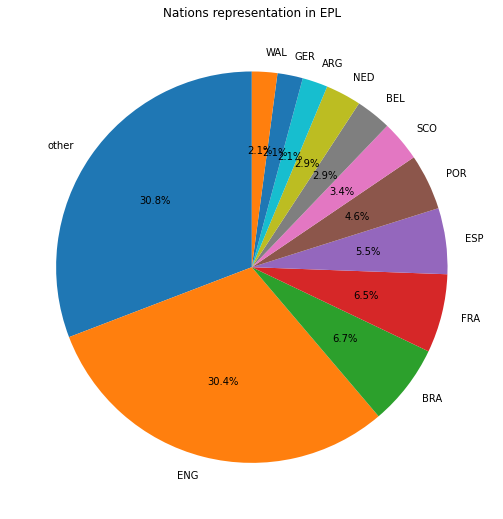

In [145]:
t = epl['nation'].value_counts(normalize=True).sort_values(ascending=False).reset_index()
t['grouped'] = ['other' if x < 0.02 else y for x,y in zip(t['nation'], t['index'])]

pie_plot(
    t.groupby('grouped')['nation'].sum().sort_values(ascending=False),
    t.groupby('grouped')['nation'].sum().sort_values(ascending=False).index,
    'Nations representation in EPL'
)

*English is most represented nation, French, Brazil and Spanish are amongs top-5.*

Let's find out the most and least English club.

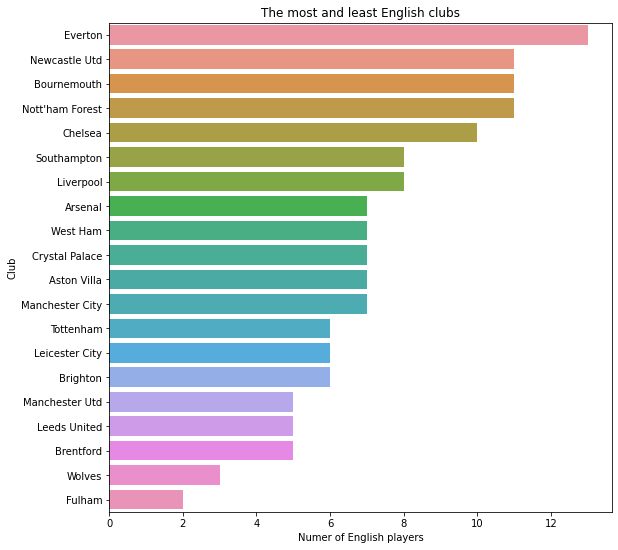

In [146]:
t = epl.groupby(['squad', 'nation'], as_index=False)['player'].nunique() \
    .query('nation == "ENG"').sort_values('player', ascending=False)
    
bar_plot(
    t['player'],
    t['squad'],
    'The most and least English clubs',
    'Numer of English players',
    'Club'
)

*Everton have 12 players with English passport. Let`s look closer at Fulham squad.*

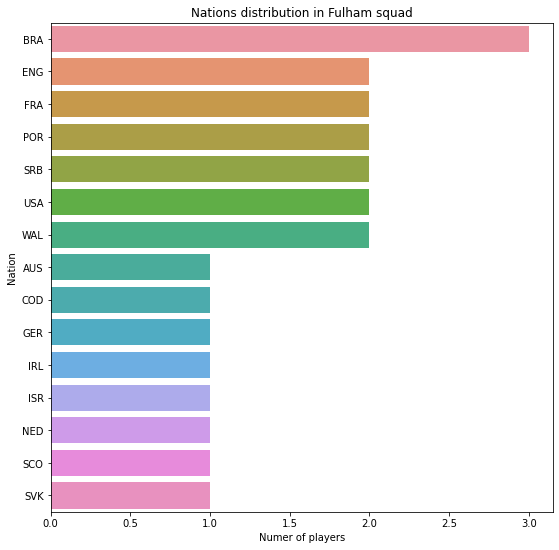

In [147]:
t = epl.groupby(['squad', 'nation'], as_index=False)['player'].nunique() \
    .query('squad == "Fulham"') \
    .sort_values('player', ascending=False)

bar_plot(
    t['player'],
    t['nation'],
    'Nations distribution in Fulham squad',
    'Numer of players',
    'Nation'
)

*Fulham are the most multinational team.*

Let's find out the oldest and youngest squad.

In [148]:
t = epl.groupby('squad')['age'].mean().sort_values(ascending=False)

In [149]:
print('Average squad age:', round(t.mean(),1))

Average squad age: 26.3


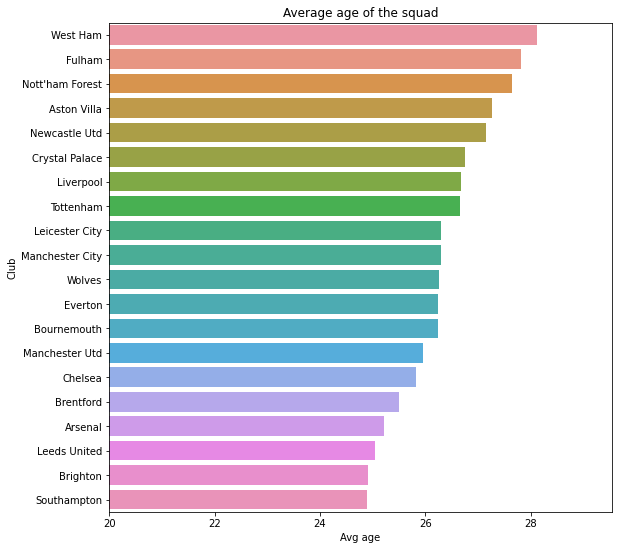

In [150]:
bar_plot(
    t.values,
    t.index,
    'Average age of the squad',
    'Avg age',
    'Club',
    xlim=20
)

*Fulham and West Ham have the oldest squad in league while Southhamptom and Brighton have the youngest.*

Let`s check which club has the most rotation rate (least mins per player).

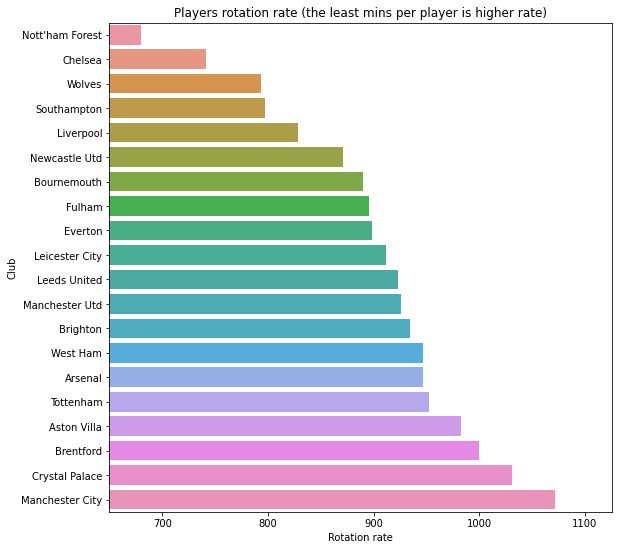

In [151]:
t = epl.groupby('squad')['playing time|min'].mean().sort_values()

bar_plot(
    t.values,
    t.index,
    'Players rotation rate (the least mins per player is higher rate)',
    'Rotation rate',
    'Club',
    xlim=650
)

*Forrest have the most even squad, i.e. the mins played the most evenly distributed.*    
*And as opposite ManCity have the most expessed "first team".*

Let`s check how players distributed over full matches in each team.

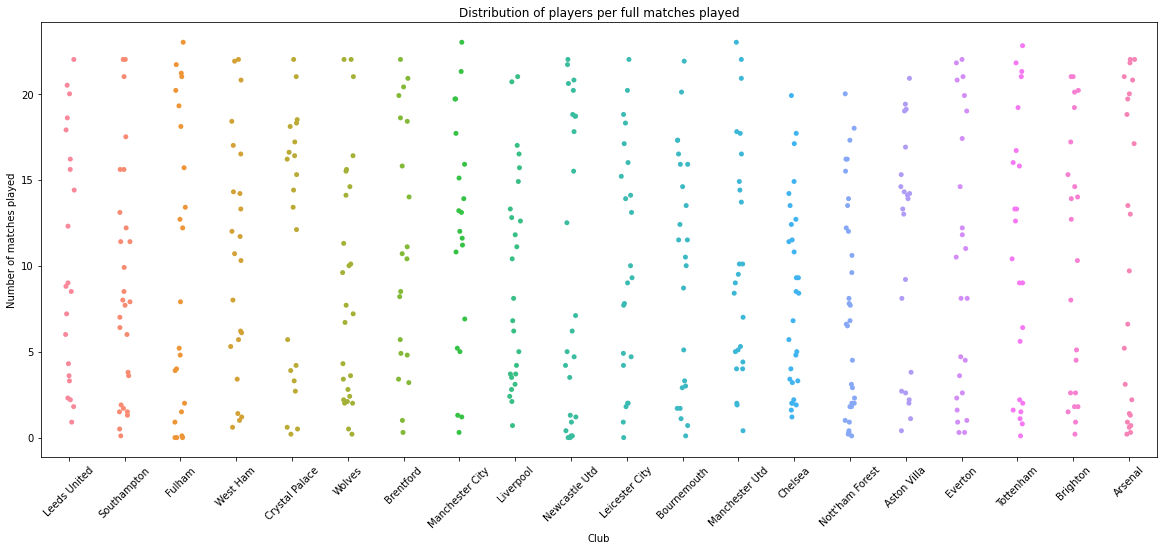

In [152]:
plt.figure(figsize=(20,8))
ax=sns.stripplot(data=epl, x='squad', y='playing time|90s')
ax.set(title='Distribution of players per full matches played', xlabel='Club',
       ylabel='Number of matches played')
plt.xticks(rotation=45)
plt.show()

*We can see that Forrest distribution looks like more even, thats to say there is no obvious group of players who play often and other play less.*

Let`s see which team gets the most and least penalties, which may say about their playing style (more aggressive in the opposite box).

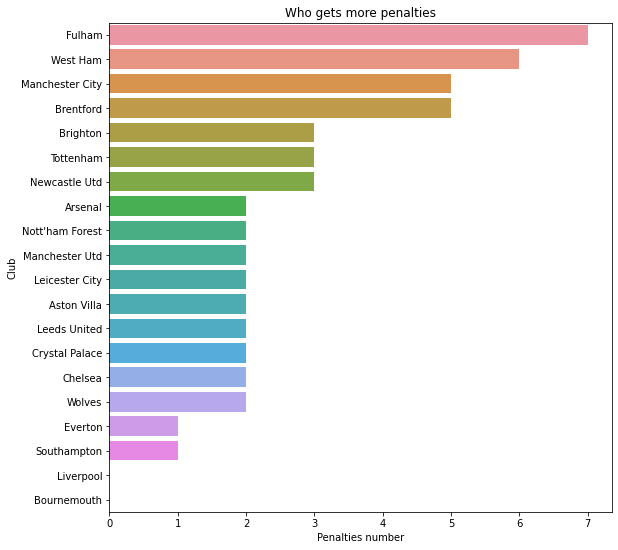

In [153]:
t = epl.groupby('squad')['performance|pkatt'].sum().sort_values(ascending=False)

bar_plot(
    t.values,
    t.index,
    'Who gets more penalties',
    'Penalties number',
    'Club'
)

*Fulham get more penalties.*

Let`s see which club gets the most and least number of yellow and red cards.

In [154]:
t = epl.groupby('squad', as_index=False)['performance|crdy'].sum().sort_values('performance|crdy', ascending=False)
tt = epl.groupby('squad', as_index=False)['performance|crdr'].sum().sort_values('performance|crdr', ascending=False)

cards_per_club = pd.concat([t, tt], ignore_index=True)

cards_per_club['card'] = [
    'red' if pd.isna(x) else 'yellow' for x in cards_per_club['performance|crdy']]

cards_per_club['number_of_cards'] = [
    x if pd.isna(y) else y for x, y in zip(cards_per_club['performance|crdy'], cards_per_club['performance|crdr'])]

cards_per_club = cards_per_club.drop(['performance|crdy', 'performance|crdr'], axis=1)

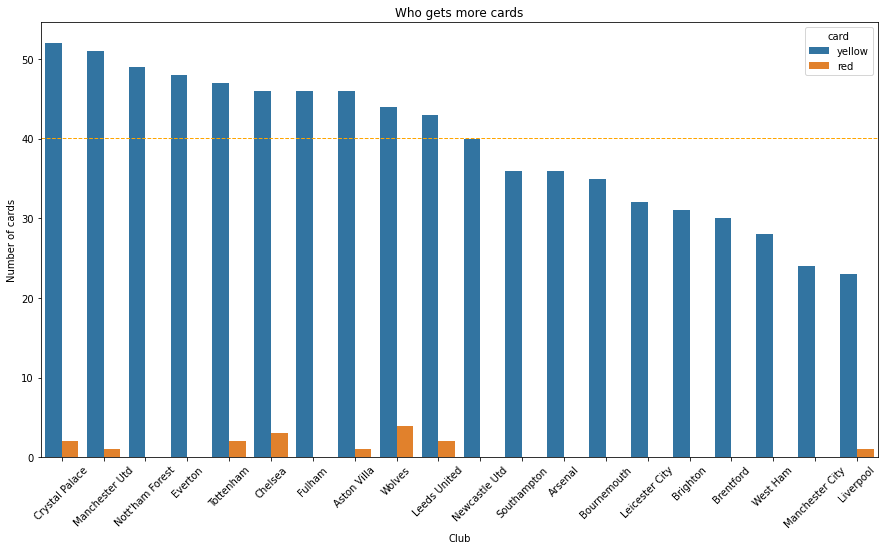

In [155]:
plt.figure(figsize=(15,8))
ax = sns.barplot(data=cards_per_club,
            x='squad', 
            y='number_of_cards', 
            hue='card')
ax.set(title = 'Who gets more cards', xlabel='Club', ylabel='Number of cards')
plt.xticks(rotation=45)
plt.axhline(cards_per_club.groupby('squad')['number_of_cards'].sum().mean(),
            c='orange',
            ls='--',
            lw=1)
plt.show()

*Palace is the most harsh squad at the moment and as opposite Manchester City and Liverpool are the most accurate. It may be either because of playing style as Liverpool and City normally have more control of the ball, so they don`t need to force the tackles that often or/and they are best sides in terms of positional playing, everybody knows their roles at best and make less position mistakes.*

Let`s see who is the best by xG.

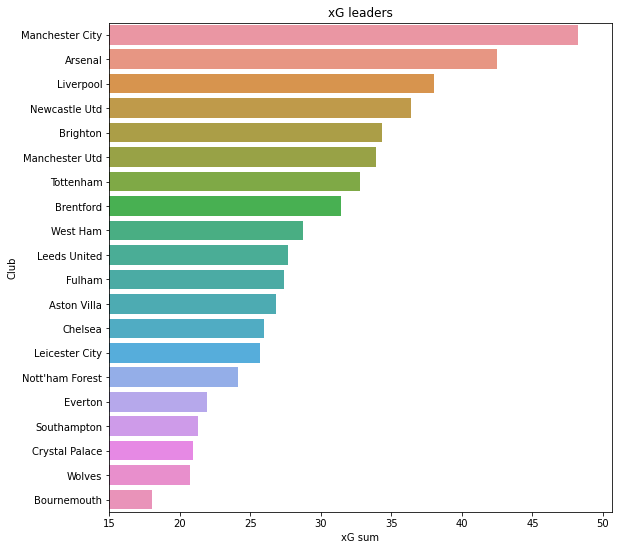

In [156]:
t = epl.groupby('squad')['expected|xg'].sum().sort_values(ascending=False)

bar_plot(
    t.values,
    t.index,
    'xG leaders',
    'xG sum',
    'Club',
    xlim=15
)

*B'mouth have at more than twice less xG that leader City.*   
*What is interesting is that Chelsea are amongs ousiders by xG, despite they are in top-10 in standings. L'pool is underperforming.*

Let`s see who is the best by xaG.

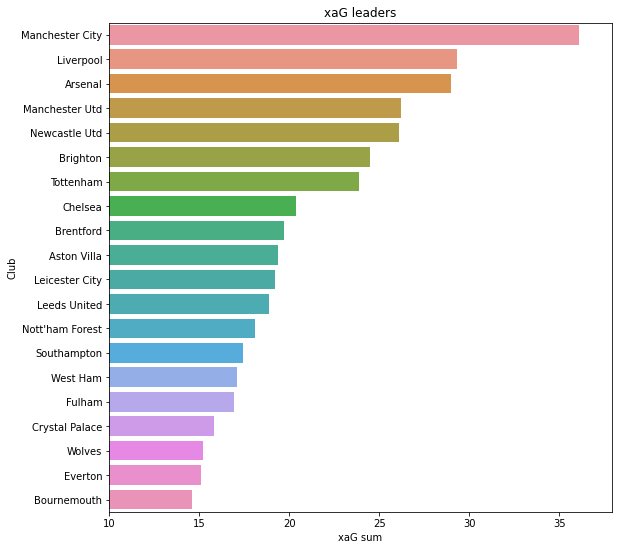

In [157]:
t = epl.groupby('squad')['expected|xag'].sum().sort_values(ascending=False)

bar_plot(
    t.values,
    t.index,
    'xaG leaders',
    'xaG sum',
    'Club',
    xlim=10
)

*xaG stands mostly for quality of passes like xA (but does not count passes that have not lead to shot) and measures a likelihood of goal that comes after the pass. As we can see it more or less correlates with xG, but we see that L'pool quite underperforming at the last stage (shot) as they are at 2 position by xaG and 3rd by xG.*

Let`s look at npxG+xaG.

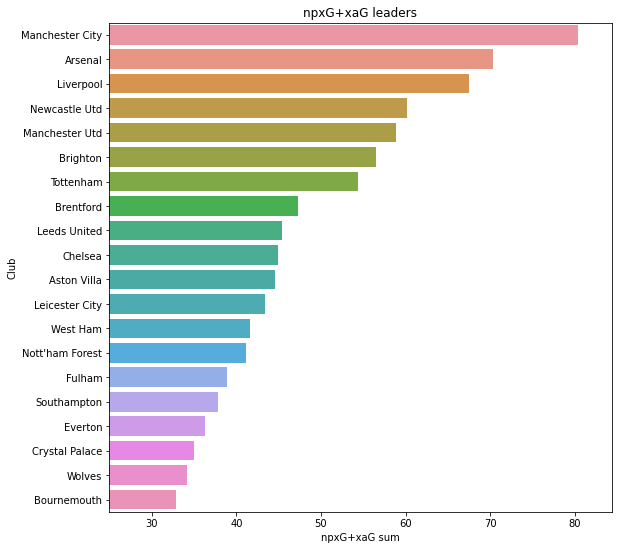

In [158]:
t = epl.groupby('squad')['expected|npxg+xag'].sum().sort_values(ascending=False)

bar_plot(
    t.values,
    t.index,
    'npxG+xaG leaders',
    'npxG+xaG sum',
    'Club',
    xlim=25
)

*It`s looks like L'pool is really underperforming as they perfom quite at the same level in terms of non pens xG + xaG with league leaders.*

Let's see distribution of transfer price by each player and club.

In [159]:
fig = px.strip(epl, x='transfer_value_mil_eur', y='squad', color='squad', hover_name='player')
fig.show()

**Conclusion:** we`ve got 462 players available. 30% are English and quite the same number of playes which are from countries that do not replesent more than 2% in league, there are also France, Brazil and Spain in top-5 by quantity of representatives. Fulham have the least English squade in the league. Avg squade age is 26,3. The oldest one is Fulham's and West Ham's and youngest S'hampton's and Brighton's. Forrest have the most players involved, i.e. more players have more less equal playing time. And ManCity as opposite have "first team" players who play significantly more than others. Fulham gets more penalties in the league and Palace are a leader by yellow cards, as opposite L'pool and City are the most accurate. Looking at the expected metrics the main discovery was that L'pool significantly underperform this season.

### DBL

In [160]:
print('Number of players:', dbl['player'].nunique())

Number of players: 428


Let`s check mean number of players per club and min/max range.

In [161]:
print('Mean number of players per club:',
      round(dbl.groupby('squad')['player'].nunique().mean()))

Mean number of players per club: 24


In [162]:
print('Min number of players per club:',
      dbl.groupby('squad')['player'].nunique().min())
print('Max number of players per club:',
      dbl.groupby('squad')['player'].nunique().max())

Min number of players per club: 21
Max number of players per club: 27


Let`s visiualize distribution of nations in league.

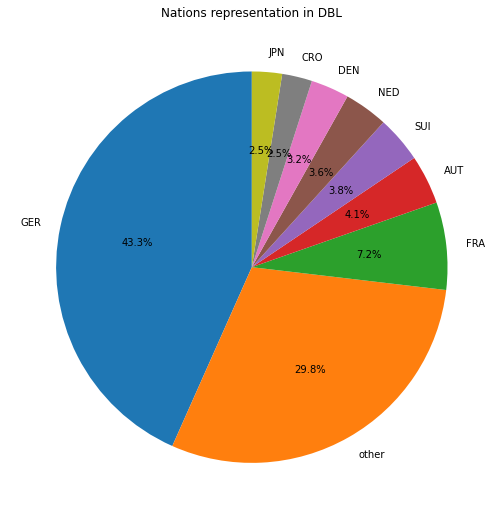

In [163]:
t = dbl['nation'].value_counts(normalize=True).sort_values(ascending=False).reset_index()
t['grouped'] = ['other' if x < 0.02 else y for x,y in zip(t['nation'], t['index'])]

pie_plot(
    t.groupby('grouped')['nation'].sum().sort_values(ascending=False),
    t.groupby('grouped')['nation'].sum().sort_values(ascending=False).index,
    'Nations representation in DBL'
)

*DBL have more homegrowned players in the league than EPL.*

Let's find out the most and least German club.

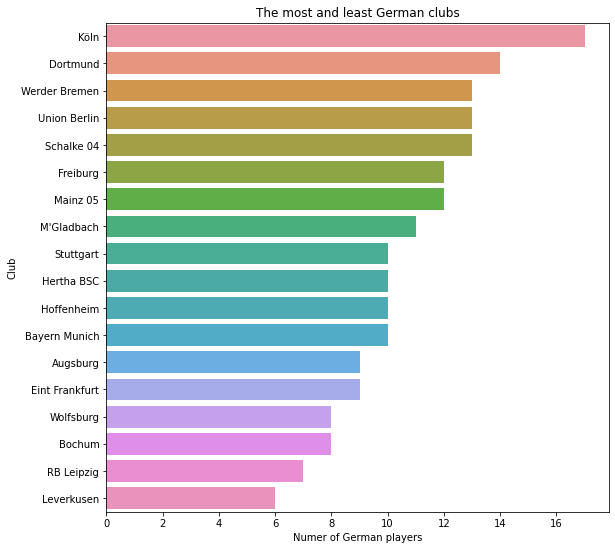

In [164]:
t = dbl.groupby(['squad', 'nation'], as_index=False)['player'].nunique() \
    .query('nation == "GER"').sort_values('player', ascending=False)
    
bar_plot(
    t['player'],
    t['squad'],
    'The most and least German clubs',
    'Numer of German players',
    'Club'
)

*Koln have about a half of homegrowned players in squad and Leverkusen have the least. Let`s see which nations represent them.*

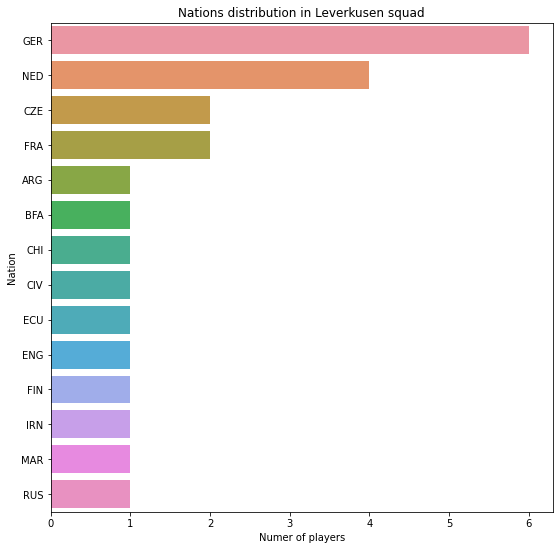

In [165]:
t = dbl.groupby(['squad', 'nation'], as_index=False)['player'].nunique() \
    .query('squad == "Leverkusen"') \
    .sort_values('player', ascending=False)
    
bar_plot(
    t['player'],
    t['nation'],
    'Nations distribution in Leverkusen squad',
    'Numer of players',
    'Nation'
)

*Leverkusen is probably the most multinational team in the league - 14 nations with at least 1 player!*

Let's find out the oldest and youngest squad.

In [166]:
t = dbl.groupby('squad')['age'].mean().sort_values(ascending=False)

In [167]:
print('Average squad age:', round(t.mean(),1))

Average squad age: 26.2


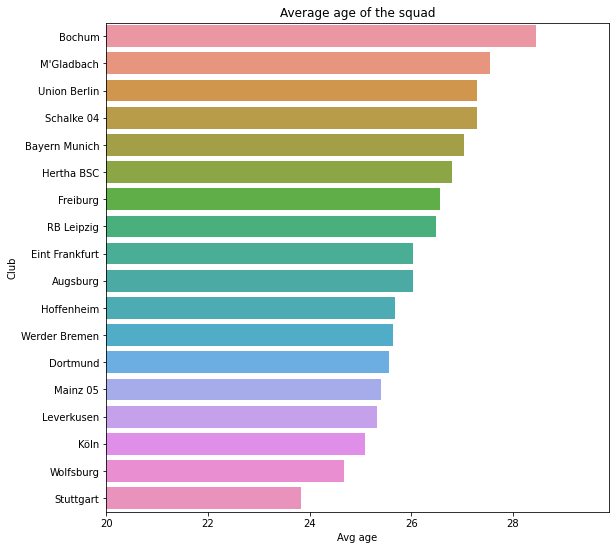

In [168]:
bar_plot(
    t.values,
    t.index,
    'Average age of the squad',
    'Avg age',
    'Club',
    xlim=20
)

*Bochum have the oldest squad in league by far while Stuttgart have the youngest. Even younger than the youngest squad in EPL - less than 24 years.*

Let`s check which club has the most rotation rate (least mins per player).

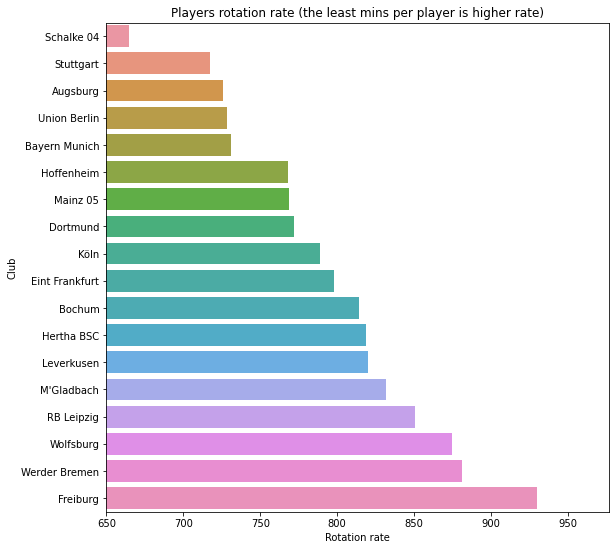

In [169]:
t = dbl.groupby('squad')['playing time|min'].mean().sort_values()

bar_plot(
    t.values,
    t.index,
    'Players rotation rate (the least mins per player is higher rate)',
    'Rotation rate',
    'Club',
    xlim=650
)

*Schalke have the most even squad, average minutes per player is below 600.*    
*And as opposite Freiburg have the most expessed "first" and "bench" team just like Tot'ham in EPL.*

Let`s check how players distributed over full matches in each team.

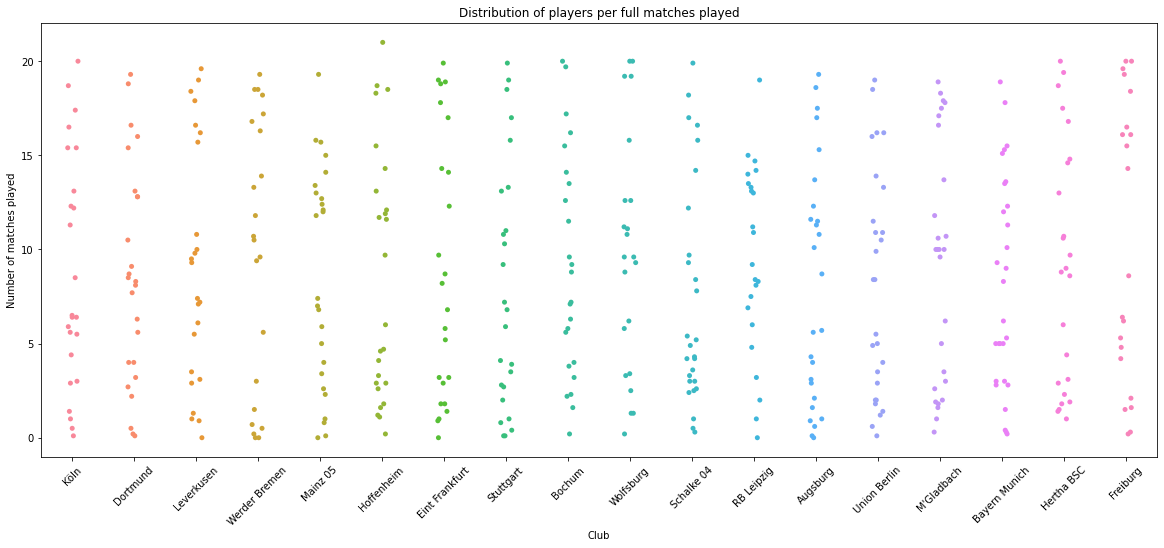

In [170]:
plt.figure(figsize=(20,8))
ax=sns.stripplot(data=dbl, x='squad', y='playing time|90s')
ax.set(title='Distribution of players per full matches played', xlabel='Club',
       ylabel='Number of matches played')
plt.xticks(rotation=45)
plt.show()

*We can see that group of Schalke dots are more evenly distributed as we saw on the previous chart.*

Let`s see which team gets the most and least penalties, which may say about their playing style (more aggressive in the opposite box).

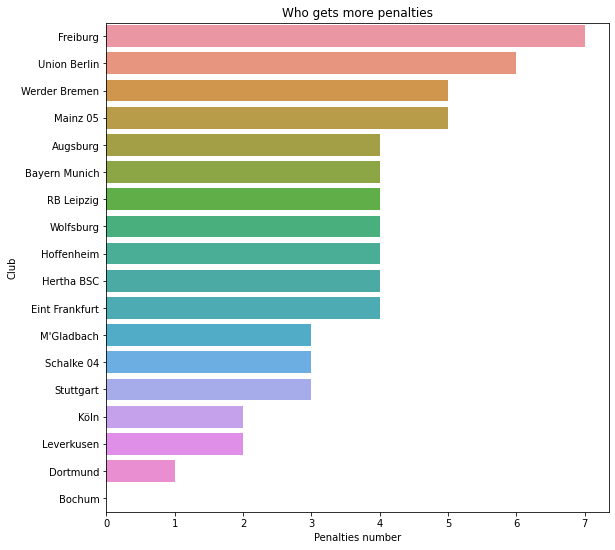

In [171]:
t = dbl.groupby('squad')['performance|pkatt'].sum().sort_values(ascending=False)

bar_plot(
    t.values,
    t.index,
    'Who gets more penalties',
    'Penalties number',
    'Club'
)

*Freiburg get more penalties.*

Let`s see which club gets the most and least number of yellow and red cards.

In [172]:
t = dbl.groupby('squad', as_index=False)['performance|crdy'].sum().sort_values('performance|crdy', ascending=False)
tt = dbl.groupby('squad', as_index=False)['performance|crdr'].sum().sort_values('performance|crdr', ascending=False)

cards_per_club = pd.concat([t, tt], ignore_index=True)

cards_per_club['card'] = [
    'red' if pd.isna(x) else 'yellow' for x in cards_per_club['performance|crdy']]

cards_per_club['number_of_cards'] = [
    x if pd.isna(y) else y for x, y in zip(cards_per_club['performance|crdy'], cards_per_club['performance|crdr'])]

cards_per_club = cards_per_club.drop(['performance|crdy', 'performance|crdr'], axis=1)

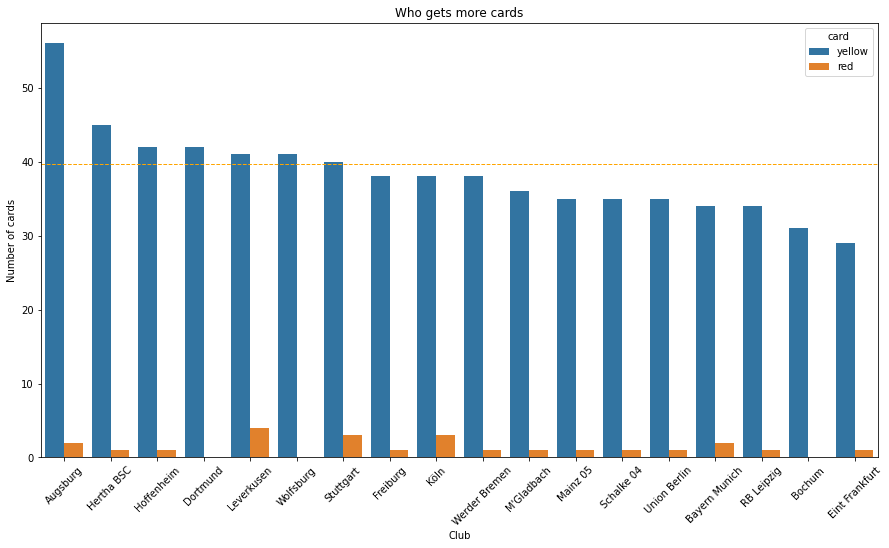

In [173]:
plt.figure(figsize=(15,8))
ax = sns.barplot(data=cards_per_club,
            x='squad', 
            y='number_of_cards', 
            hue='card')
ax.set(title = 'Who gets more cards', xlabel='Club', ylabel='Number of cards')
plt.xticks(rotation=45)
plt.axhline(cards_per_club.groupby('squad')['number_of_cards'].sum().mean(),
            c='orange',
            ls='--',
            lw=1)
plt.show()

*Looks like Augsburg is the most harsh side and Eintracht is the least.*

Let`s see who is the best by xG.

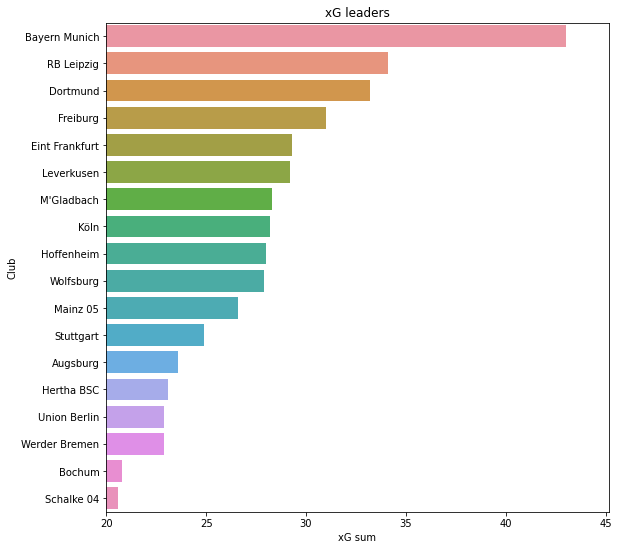

In [174]:
t = dbl.groupby('squad')['expected|xg'].sum().sort_values(ascending=False)

bar_plot(
    t.values,
    t.index,
    'xG leaders',
    'xG sum',
    'Club',
    xlim=20
)

*Bayern have the most threatful attack as expected. As opposite Schalke have the least.*

Let`s see who is the best by xaG.

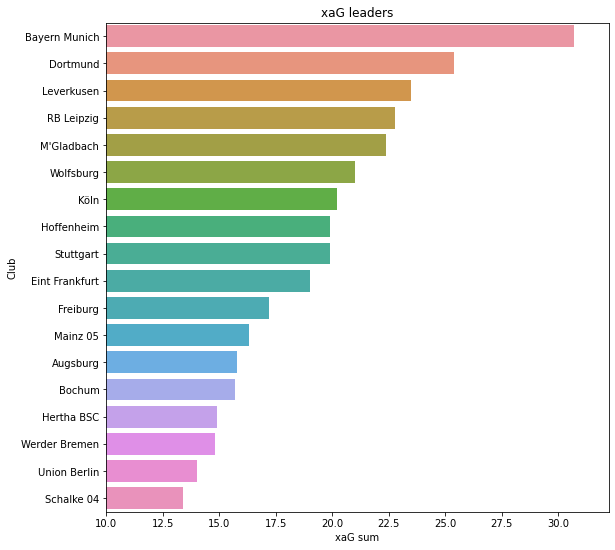

In [175]:
t = dbl.groupby('squad')['expected|xag'].sum().sort_values(ascending=False)

bar_plot(
    t.values,
    t.index,
    'xaG leaders',
    'xaG sum',
    'Club',
    xlim=10
)

*What`s interesting here is the fact that Union at the top part of league standings but have least xaG (even lower than last team of EPL) and 2nd lowest xG. That is what called overperforming!*

Let`s look at npxG+xaG.

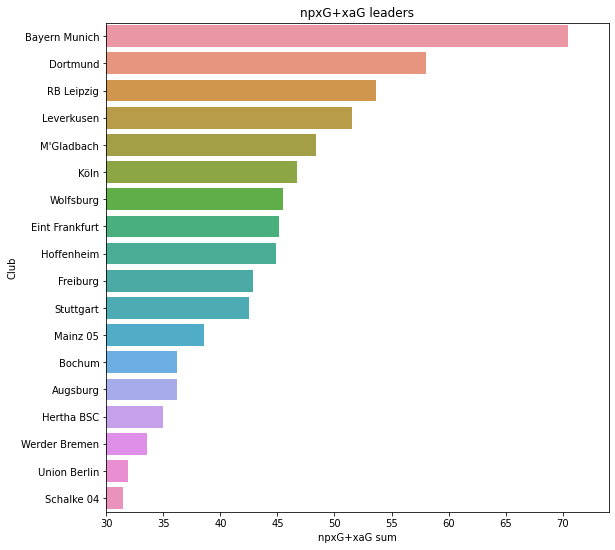

In [176]:
t = dbl.groupby('squad')['expected|npxg+xag'].sum().sort_values(ascending=False)

bar_plot(
    t.values,
    t.index,
    'npxG+xaG leaders',
    'npxG+xaG sum',
    'Club',
    xlim=30
)

*Bayern have outperformed the 2nd team by 15 points of the npxG+xaG, but that does not really reflect on the standings. Considering the metrics they must have been earned much more points. Union is a phenomenon of the season so far.*

Let's see distribution of transfer price by each player and club.

In [177]:
fig = px.strip(dbl, x='transfer_value_mil_eur', y='squad', color='squad', hover_name='player')
fig.show()

**Conclusion:** we`ve got 428 players available. 43% are German which makes Germany is more mononation league than EPL, France is represented by 7% which is the 2nd size. Leverkusen have the least German squade in the league. Avg squade age is a bit younger than in EPL - 26.1 years. The oldest one is Bochum's and youngest Stuttgart's. Schalke have the most players involved, i.e. more players have more less equal playing time. And Freiburg as opposite have more expressed "first" and "bench" players. Freiburg gets more penalties in the league and Augsburg is a leader by yellow cards. Looking at the expected metrics we discovered that Bayern outperformed the 2nd team by 15 points of the npxG+xaG. But this difference does not reflect on standings in same weight.








### Serie A

In [178]:
print('Number of players:', seriea['player'].nunique())

Number of players: 469


Let`s check mean number of players per club and min/max range.

In [179]:
print('Mean number of players per club:',
      round(seriea.groupby('squad')['player'].nunique().mean()))

Mean number of players per club: 24


In [180]:
print('Min number of players per club:',
      seriea.groupby('squad')['player'].nunique().min())
print('Max number of players per club:',
      seriea.groupby('squad')['player'].nunique().max())

Min number of players per club: 21
Max number of players per club: 31


Let`s visiualize distribution of nations in league.

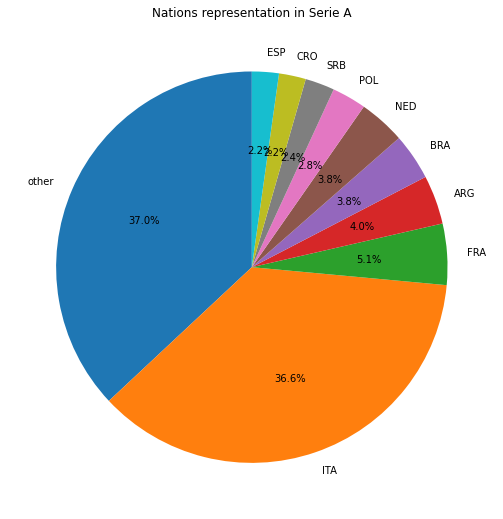

In [181]:
t = seriea['nation'].value_counts(normalize=True).sort_values(ascending=False).reset_index()
t['grouped'] = ['other' if x < 0.02 else y for x,y in zip(t['nation'], t['index'])]

pie_plot(
    t.groupby('grouped')['nation'].sum().sort_values(ascending=False),
    t.groupby('grouped')['nation'].sum().sort_values(ascending=False).index,
    'Nations representation in Serie A'
)

*35% of players are Italian. Looks like there are many nations with small number of representatives.*

Let's find out the most and least Italian club.

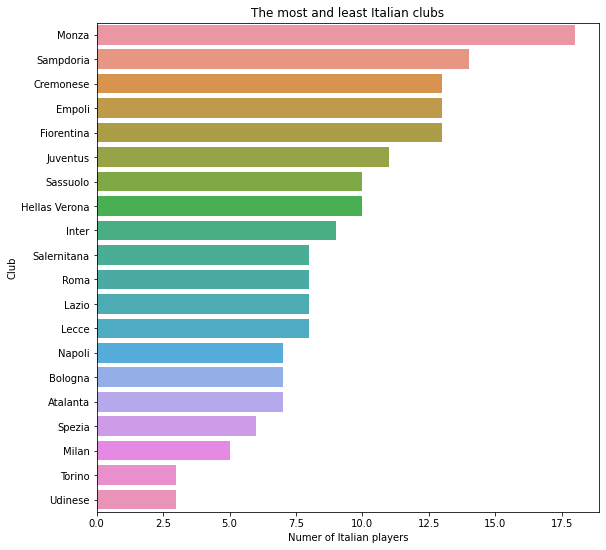

In [182]:
t = seriea.groupby(['squad', 'nation'], as_index=False)['player'].nunique() \
    .query('nation == "ITA"').sort_values('player', ascending=False)
    
bar_plot(
    t['player'],
    t['squad'],
    'The most and least Italian clubs',
    'Numer of Italian players',
    'Club'
)

*Monza have almost a full squad of homegrowned players and Udinese and Torino have the least. Let`s see which nations represent them.*

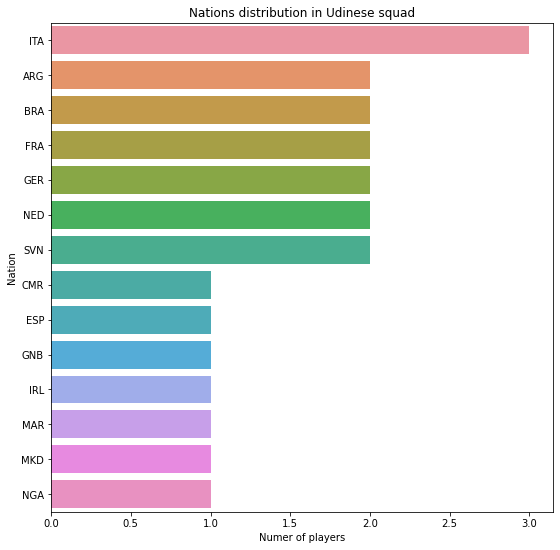

In [183]:
t = seriea.groupby(['squad', 'nation'], as_index=False)['player'].nunique() \
    .query('squad == "Udinese"') \
    .sort_values('player', ascending=False)
    
bar_plot(
    t['player'],
    t['nation'],
    'Nations distribution in Udinese squad',
    'Numer of players',
    'Nation'
)

*Udinese is probably the most multinational team in the league - 14 nations with at least 1 player!*

Let's find out the oldest and youngest squad.

In [184]:
t = seriea.groupby('squad')['age'].mean().sort_values(ascending=False)

In [185]:
print('Average squad age:', round(t.mean(),1))

Average squad age: 26.1


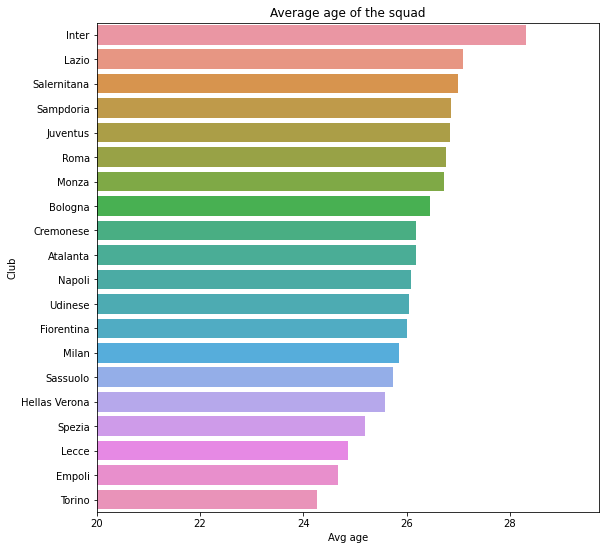

In [186]:
bar_plot(
    t.values,
    t.index,
    'Average age of the squad',
    'Avg age',
    'Club',
    xlim=20
)

*Inter have the oldest squad in league by far while Torino have the youngest.*

Let`s check which club has the most rotation rate (least mins per player).

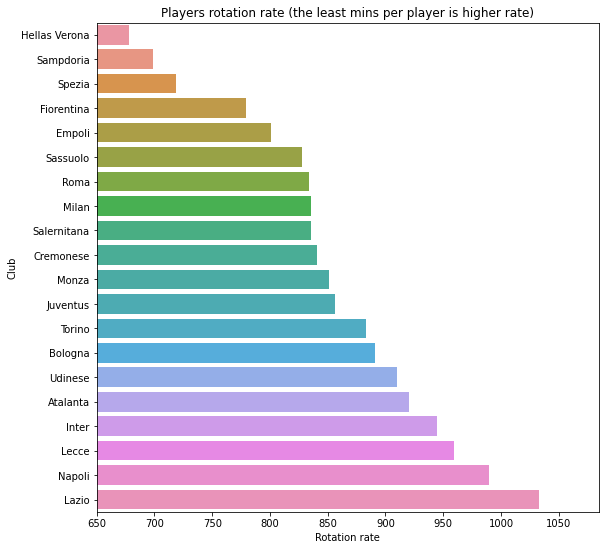

In [187]:
t = seriea.groupby('squad')['playing time|min'].mean().sort_values()

bar_plot(
    t.values,
    t.index,
    'Players rotation rate (the least mins per player is higher rate)',
    'Rotation rate',
    'Club',
    xlim=650
)

*Verona have the most even squad.*    
*And as opposite Lazio have the most expessed "first" and "bench" players.*

Let`s check how players distributed over full matches in each team.

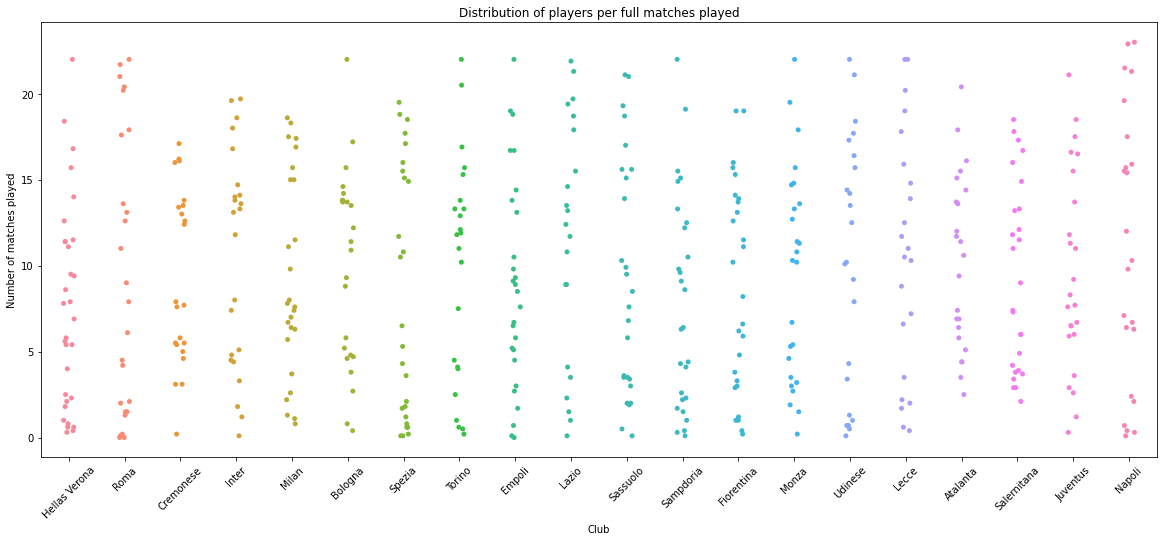

In [188]:
plt.figure(figsize=(20,8))
ax=sns.stripplot(data=seriea, x='squad', y='playing time|90s')
ax.set(title='Distribution of players per full matches played', xlabel='Club',
       ylabel='Number of matches played')
plt.xticks(rotation=45)
plt.show()

*This chart must more less correlate with previous and as we see that group of Verona dots are more evenly distributed then others.*

Let`s see which team gets the most and least penalties, which may say about their playing style (more aggressive in the opposite box).

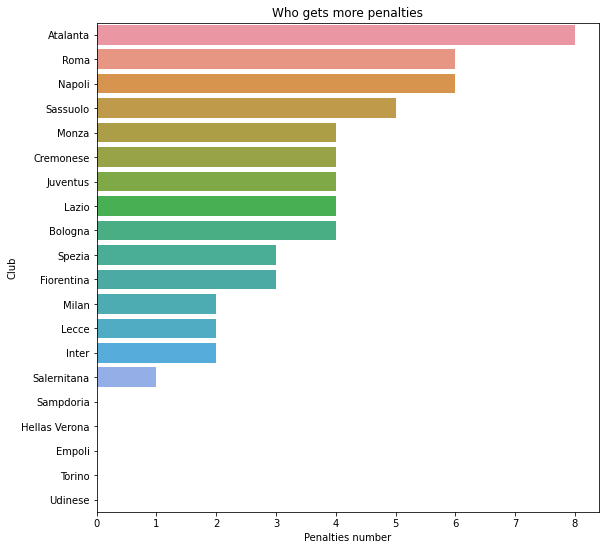

In [189]:
t = seriea.groupby('squad')['performance|pkatt'].sum().sort_values(ascending=False)

bar_plot(
    t.values,
    t.index,
    'Who gets more penalties',
    'Penalties number',
    'Club'
)

*Atalanta get more penalties.*

Let`s see which club gets the most and least number of yellow and red cards.

In [190]:
t = seriea.groupby('squad', as_index=False)['performance|crdy'].sum().sort_values('performance|crdy', ascending=False)
tt = seriea.groupby('squad', as_index=False)['performance|crdr'].sum().sort_values('performance|crdr', ascending=False)

cards_per_club = pd.concat([t, tt], ignore_index=True)

cards_per_club['card'] = [
    'red' if pd.isna(x) else 'yellow' for x in cards_per_club['performance|crdy']]

cards_per_club['number_of_cards'] = [
    x if pd.isna(y) else y for x, y in zip(cards_per_club['performance|crdy'], cards_per_club['performance|crdr'])]

cards_per_club = cards_per_club.drop(['performance|crdy', 'performance|crdr'], axis=1)

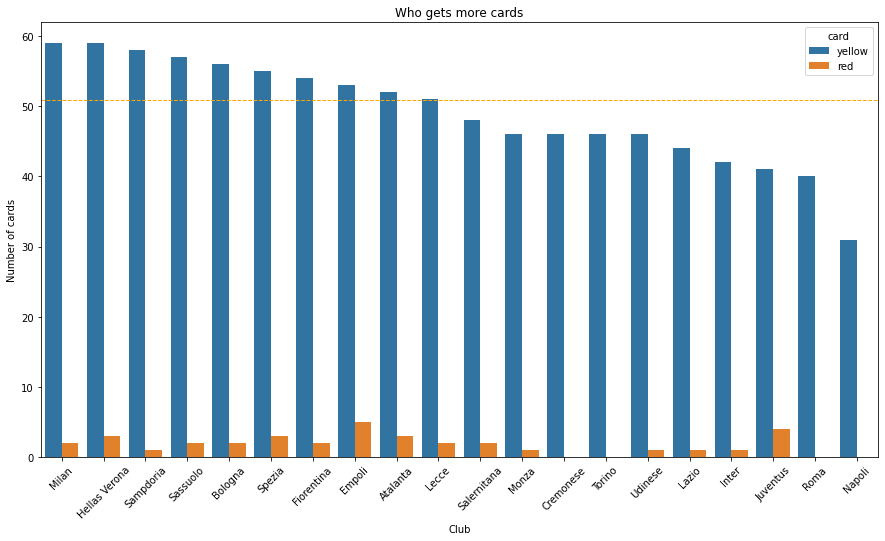

In [191]:
plt.figure(figsize=(15,8))
ax = sns.barplot(data=cards_per_club,
            x='squad', 
            y='number_of_cards', 
            hue='card')
ax.set(title = 'Who gets more cards', xlabel='Club', ylabel='Number of cards')
plt.xticks(rotation=45)
plt.axhline(cards_per_club.groupby('squad')['number_of_cards'].sum().mean(),
            c='orange',
            ls='--',
            lw=1)
plt.show()

*Milan is the most harsh side. It is also noticable that "top" tier clubs are amongs those who play cleaner in each league.*

Let`s see who is the best by xG.

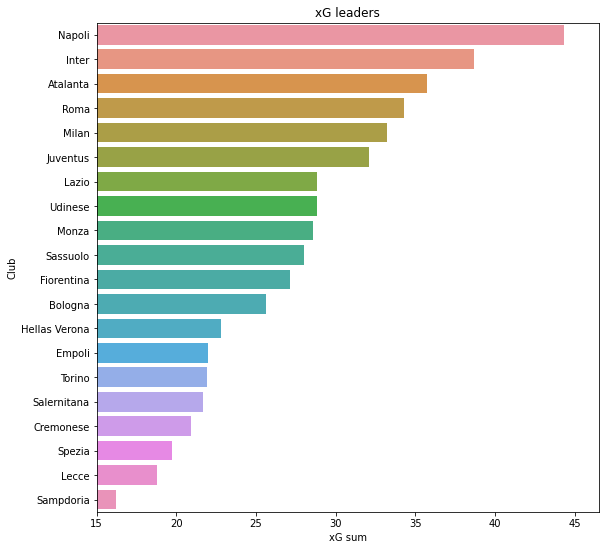

In [192]:
t = seriea.groupby('squad')['expected|xg'].sum().sort_values(ascending=False)

bar_plot(
    t.values,
    t.index,
    'xG leaders',
    'xG sum',
    'Club',
    xlim=15
)

*Napoli have the most threatful attack and they're leading in overall standings. As opposite Sampdoria and have the least.*

Let`s see who is the best by xaG.

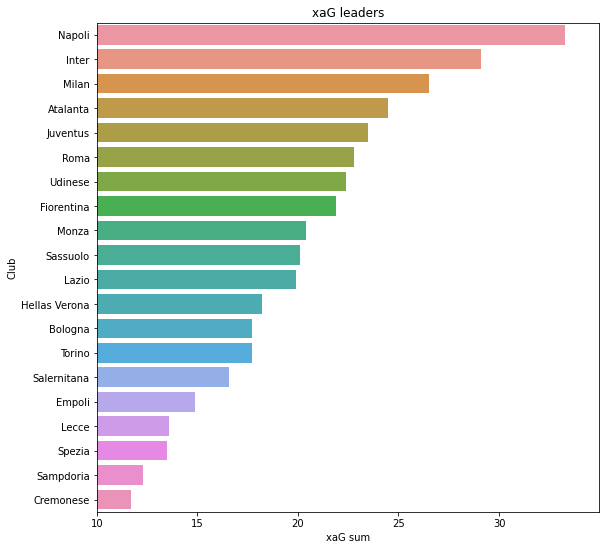

In [193]:
t = seriea.groupby('squad')['expected|xag'].sum().sort_values(ascending=False)

bar_plot(
    t.values,
    t.index,
    'xaG leaders',
    'xaG sum',
    'Club',
    xlim=10
)

*Napoli shows the best numbers as well. Cremonense have the lowest number.*

Let`s look at npxG+xaG.

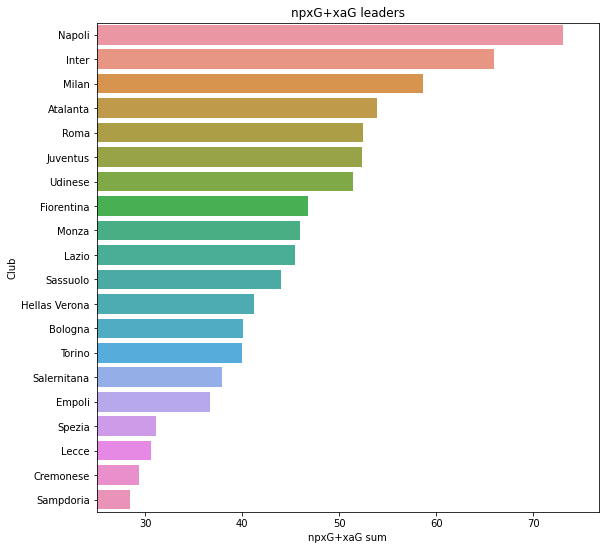

In [194]:
t = seriea.groupby('squad')['expected|npxg+xag'].sum().sort_values(ascending=False)

bar_plot(
    t.values,
    t.index,
    'npxG+xaG leaders',
    'npxG+xaG sum',
    'Club',
    xlim=25
)

*Napoli are leaders by advanced metrics and in overall standings. Lecce probably have one of the best defence stats since they have lowest attacking numbers and still not in the releagation zone.*

Let's see distribution of transfer price by each player and club.

In [195]:
fig = px.strip(seriea, x='transfer_value_mil_eur', y='squad', color='squad', hover_name='player')
fig.show()

**Conclusion:** we`ve got 469 players available. 35% are Italian. Udinese and Torino have the least Italian squade in the league represented almost equally by 14 nations. Avg squade age is 26,1 years old. The oldest one is Inter's and youngest Empoli's. Verona have the most players involved, i.e. more players have more less equal playing time. And Lazio as opposite have more expressed "first" and "bench" players. Atalanta gets more penalties in the league and Milan is a leader by yellow cards, overall the distribution looks like more equal. It's still noticable that advanced metrics (and standings also) leader is more accurate and gets booked less than others. Looking at the expected metrics we discovered that Napoli is leading in every one and it fully reflects on overall standings. Lecce probably have good defence metrics as they have lowest attacking numbers and still in the mid table.*

### La Liga

In [196]:
print('Number of players:', laliga['player'].nunique())

Number of players: 448


Let`s check mean number of players per club and min/max range.

In [197]:
print('Mean number of players per club:',
      round(laliga.groupby('squad')['player'].nunique().mean()))

Mean number of players per club: 23


In [198]:
print('Min number of players per club:',
      laliga.groupby('squad')['player'].nunique().min())
print('Max number of players per club:',
      laliga.groupby('squad')['player'].nunique().max())

Min number of players per club: 20
Max number of players per club: 26


Let`s visiualize distribution of nations in league.

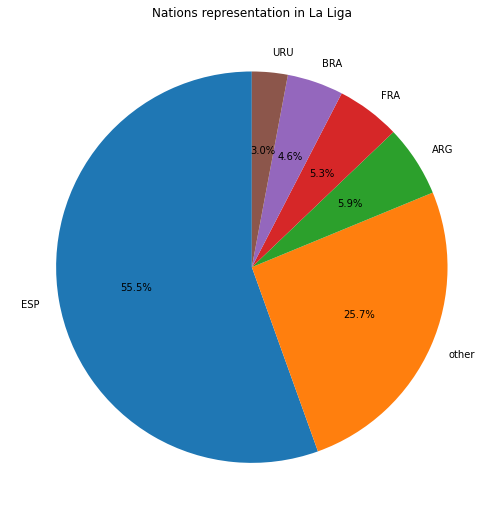

In [199]:
t = laliga['nation'].value_counts(normalize=True).sort_values(ascending=False).reset_index()
t['grouped'] = ['other' if x < 0.02 else y for x,y in zip(t['nation'], t['index'])]

pie_plot(
    t.groupby('grouped')['nation'].sum().sort_values(ascending=False),
    t.groupby('grouped')['nation'].sum().sort_values(ascending=False).index,
    'Nations representation in La Liga'
)

*More than 55% of players are homegrowned. Also we can see that most of the other nations are Spanish or Portugese speaking.*

Let's find out the most and least Spanish club.

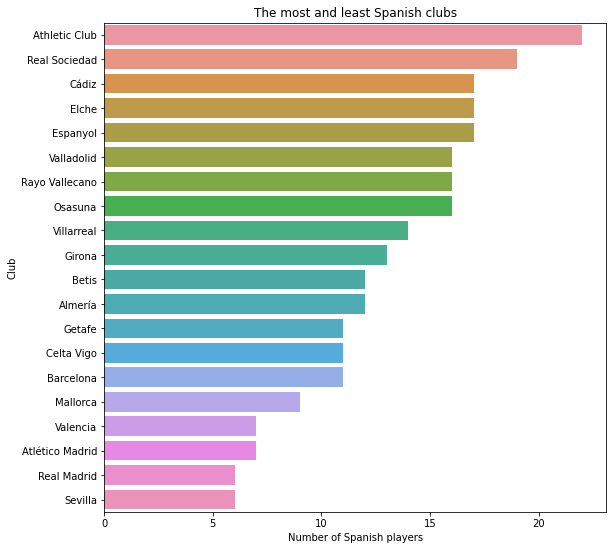

In [200]:
t = laliga.groupby(['squad', 'nation'], as_index=False)['player'].nunique() \
    .query('nation == "ESP"').sort_values('player', ascending=False)
    
bar_plot(
    t['player'],
    t['squad'],
    'The most and least Spanish clubs',
    'Number of Spanish players',
    'Club'
)

*Athletic Bilbao is the most Spanish club in the league and Sevilla is the least. Let's look closer at Sevilla squad.*

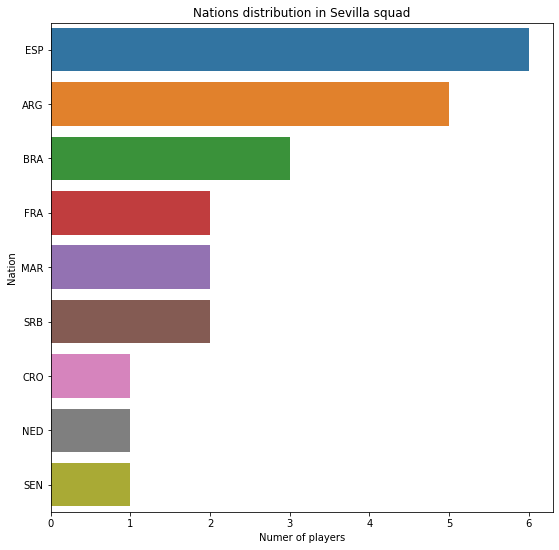

In [201]:
t = laliga.groupby(['squad', 'nation'], as_index=False)['player'].nunique() \
    .query('squad == "Sevilla"') \
    .sort_values('player', ascending=False)
    
bar_plot(
    t['player'],
    t['nation'],
    'Nations distribution in Sevilla squad',
    'Numer of players',
    'Nation'
)

*There is a huge diaspora of Argentinians and Brazil players.*

Let's find out the oldest and youngest squad.

In [202]:
t = laliga.groupby('squad')['age'].mean().sort_values(ascending=False)

In [203]:
print('Average squad age:', round(t.mean(),1))

Average squad age: 27.3


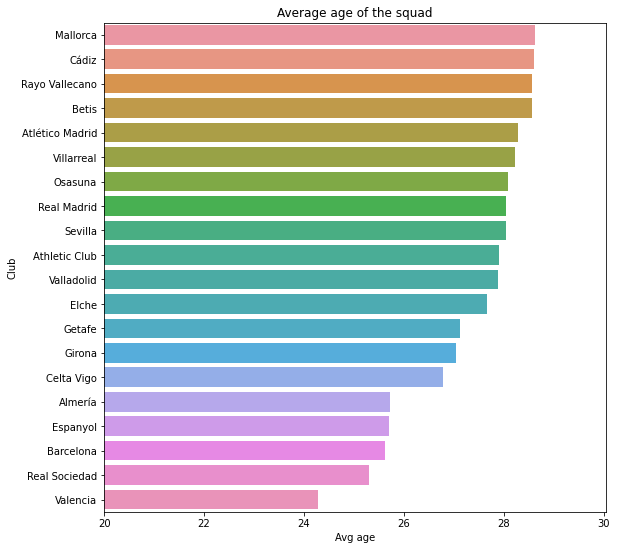

In [204]:
bar_plot(
    t.values,
    t.index,
    'Average age of the squad',
    'Avg age',
    'Club',
    xlim=20
)

*Mallorca have the oldest squad in league while Valencia have the youngest.*

Let`s check which club has the most rotation rate (least mins per player).

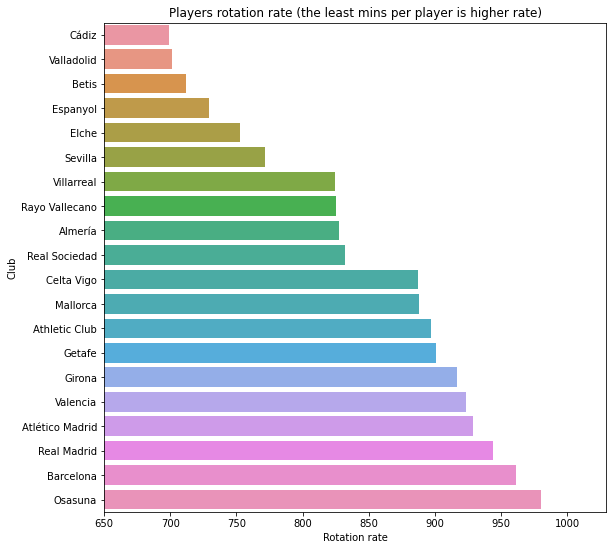

In [205]:
t = laliga.groupby('squad')['playing time|min'].mean().sort_values()

bar_plot(
    t.values,
    t.index,
    'Players rotation rate (the least mins per player is higher rate)',
    'Rotation rate',
    'Club',
    xlim=650
)

*Cadiz have the most even squad.*    
*And as opposite Osasuna have the most expessed "first" and "bench" players in the league.*

Let`s check how players distributed over full matches in each team.

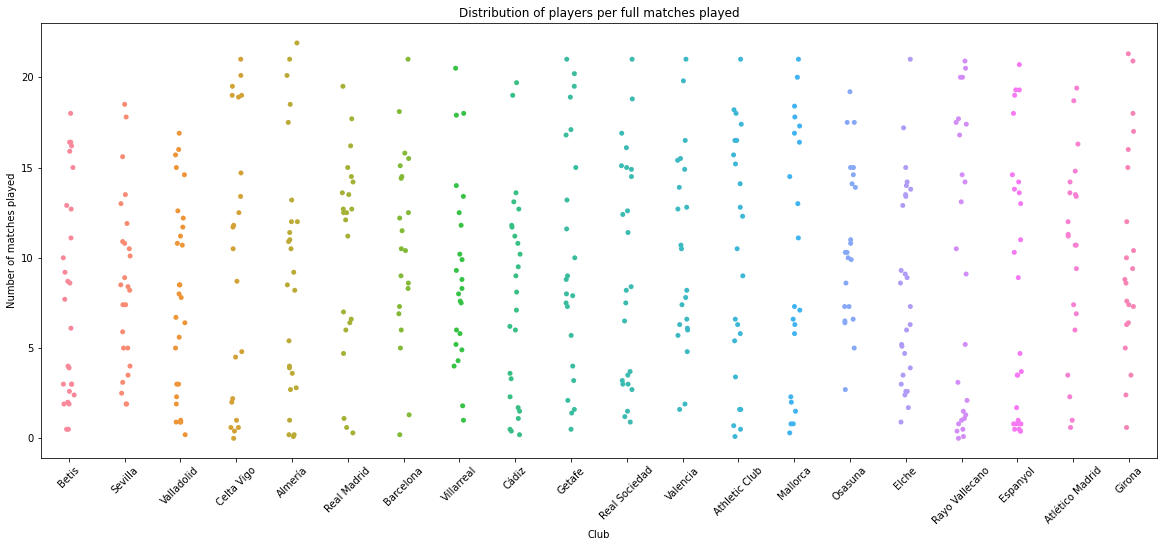

In [206]:
plt.figure(figsize=(20,8))
ax=sns.stripplot(data=laliga, x='squad', y='playing time|90s')
ax.set(title='Distribution of players per full matches played', xlabel='Club',
       ylabel='Number of matches played')
plt.xticks(rotation=45)
plt.show()

*This chart must more less correlate with previous and as we see that group of Valladolid and Cadiz dots have less varience.*

Let`s see which team gets the most and least penalties, which may say about their playing style (more aggressive in the opposite box).

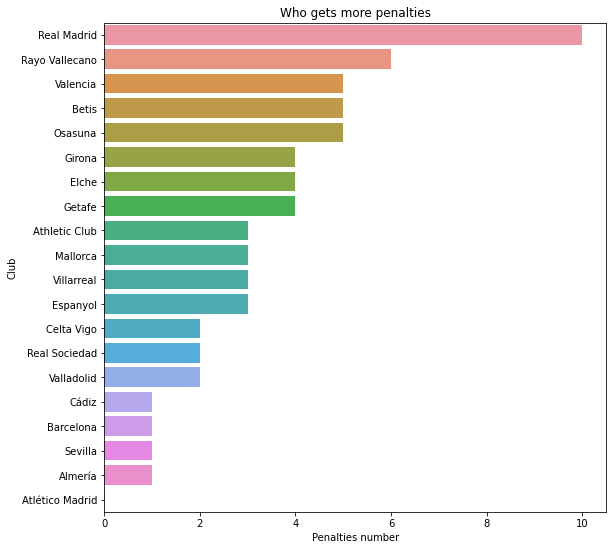

In [207]:
t = laliga.groupby('squad')['performance|pkatt'].sum().sort_values(ascending=False)

bar_plot(
    t.values,
    t.index,
    'Who gets more penalties',
    'Penalties number',
    'Club'
)

*Real Madrid were rewared by penalties more often than others.*

Let`s see which club gets the most and least number of yellow and red cards.

In [208]:
t = laliga.groupby('squad', as_index=False)['performance|crdy'].sum().sort_values('performance|crdy', ascending=False)
tt = laliga.groupby('squad', as_index=False)['performance|crdr'].sum().sort_values('performance|crdr', ascending=False)

cards_per_club = pd.concat([t, tt], ignore_index=True)

cards_per_club['card'] = [
    'red' if pd.isna(x) else 'yellow' for x in cards_per_club['performance|crdy']]

cards_per_club['number_of_cards'] = [
    x if pd.isna(y) else y for x, y in zip(cards_per_club['performance|crdy'], cards_per_club['performance|crdr'])]

cards_per_club = cards_per_club.drop(['performance|crdy', 'performance|crdr'], axis=1)

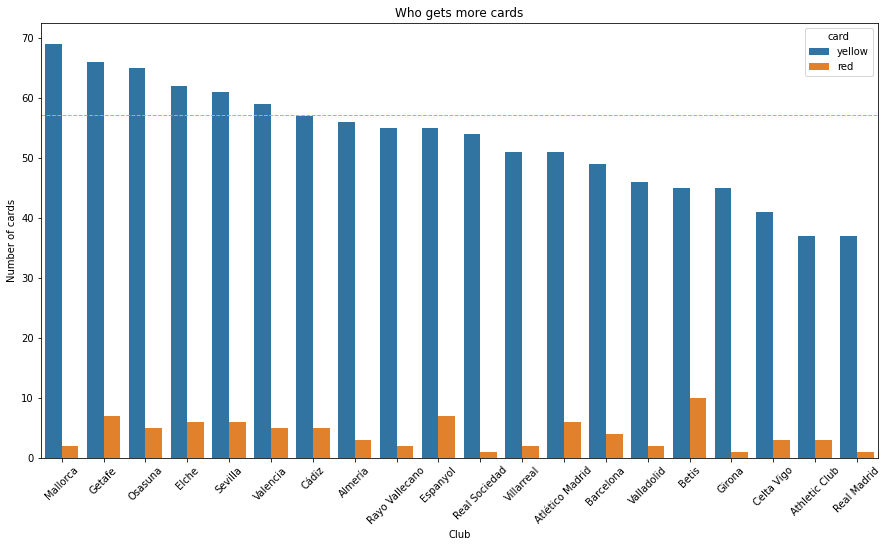

In [209]:
plt.figure(figsize=(15,8))
ax = sns.barplot(data=cards_per_club,
            x='squad', 
            y='number_of_cards', 
            hue='card')
ax.set(title = 'Who gets more cards', xlabel='Club', ylabel='Number of cards')
plt.xticks(rotation=45)
plt.axhline(cards_per_club.groupby('squad')['number_of_cards'].sum().mean(),
            c='orange',
            ls='--',
            lw=1)
plt.show()

*Mallorca get more cards in the league. Athletic Bilbao and Real Madrid get cards rarily.*

Let`s see who is the best by xG.

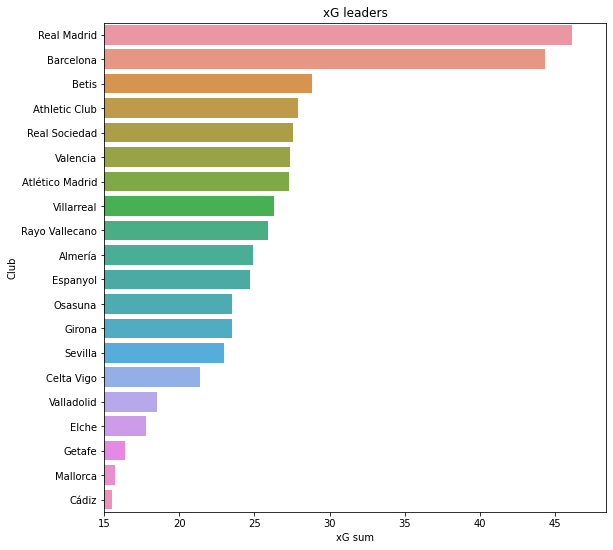

In [210]:
t = laliga.groupby('squad')['expected|xg'].sum().sort_values(ascending=False)

bar_plot(
    t.values,
    t.index,
    'xG leaders',
    'xG sum',
    'Club',
    xlim=15
)

*There are two teams which are significantly better than others in terms of xG. The same reflects on the table standings. Cadiz created x3 less threat than Barcelona.*

Let`s see who is the best by xaG.

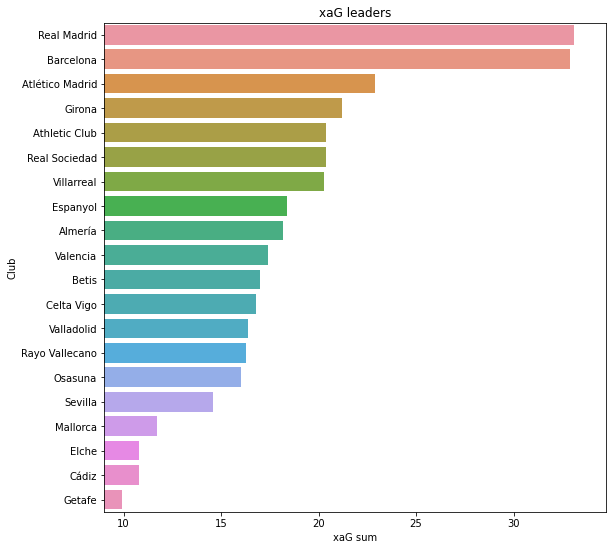

In [211]:
t = laliga.groupby('squad')['expected|xag'].sum().sort_values(ascending=False)

bar_plot(
    t.values,
    t.index,
    'xaG leaders',
    'xaG sum',
    'Club',
    xlim=9
)

*Quite the same distribution in xaG.*

Let`s look at npxG+xaG.

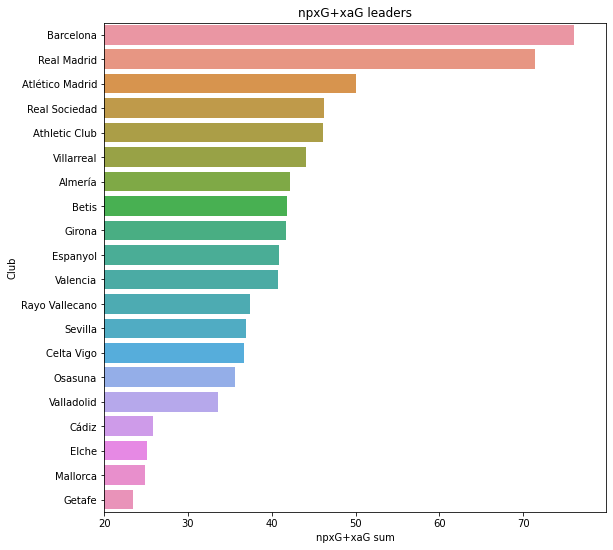

In [212]:
t = laliga.groupby('squad')['expected|npxg+xag'].sum().sort_values(ascending=False)

bar_plot(
    t.values,
    t.index,
    'npxG+xaG leaders',
    'npxG+xaG sum',
    'Club',
    xlim=20
)

*Barcelona is better side in every advanced metric not by far though. Getafe, Mallorca, Elche and Cadiz are outsiders in all. Mallorca though are still in mid table.*

Let's see distribution of transfer price by each player and club.

In [213]:
fig = px.strip(laliga, x='transfer_value_mil_eur', y='squad', color='squad', hover_name='player')
fig.show()

**Conclusion:** we`ve got 445 players available. 55% players are Spanish which is the highest rate of domestic players amongst all leagues. Sevilla have the least Spanish squade in the league and Athletic Bilbao are most Spanish. Avg squade age is 27,3 years old which makes the league the "oldest" amongs all. The oldest squad is Mallorca's and youngest Valencia's. Cadiz and Valladolid have the most players involved, i.e. more players have more less equal playing time. And Osasuna as opposite have more expressed "first" and "bench" players. Real Madrid were rewared by penalties more often than others and Mallorca is a leader by yellow cards. Looking at the advanced metrics we noted that Barcelona and Real Mardid create far more threat than others and there are four outsiders by expected threat: Getafe, Mallorca, Elche and Cadiz.*

### Ligue 1

In [214]:
print('Number of players:', ligue1['player'].nunique())

Number of players: 443


Let`s check mean number of players per club and min/max range.

In [215]:
print('Mean number of players per club:',
      round(ligue1.groupby('squad')['player'].nunique().mean()))

Mean number of players per club: 23


In [216]:
print('Min number of players per club:',
      ligue1.groupby('squad')['player'].nunique().min())
print('Max number of players per club:',
      ligue1.groupby('squad')['player'].nunique().max())

Min number of players per club: 19
Max number of players per club: 27


Let`s visiualize distribution of nations in league.

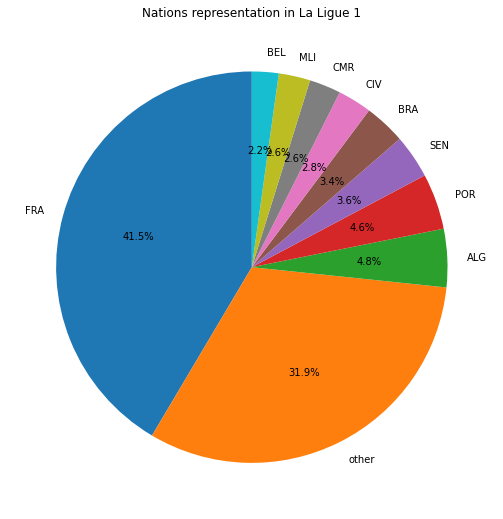

In [217]:
t = ligue1['nation'].value_counts(normalize=True).sort_values(ascending=False).reset_index()
t['grouped'] = ['other' if x < 0.02 else y for x,y in zip(t['nation'], t['index'])]

pie_plot(
    t.groupby('grouped')['nation'].sum().sort_values(ascending=False),
    t.groupby('grouped')['nation'].sum().sort_values(ascending=False).index,
    'Nations representation in La Ligue 1'
)

*More than 42% of players are homegrowned. There are many other nations which are less represented. And there is a significant rate of African players.*

Let's find out the most and least French club.

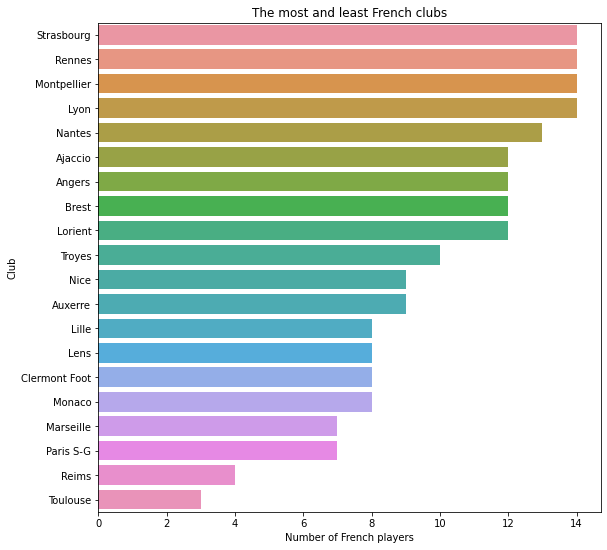

In [218]:
t = ligue1.groupby(['squad', 'nation'], as_index=False)['player'].nunique() \
    .query('nation == "FRA"').sort_values('player', ascending=False)
    
bar_plot(
    t['player'],
    t['squad'],
    'The most and least French clubs',
    'Number of French players',
    'Club'
)

*Strasbourg, Rennes, Monpellier, Lyon are the most French clubs in the league and Toulouse is the least. Let's look closer at Toulouse squad.*

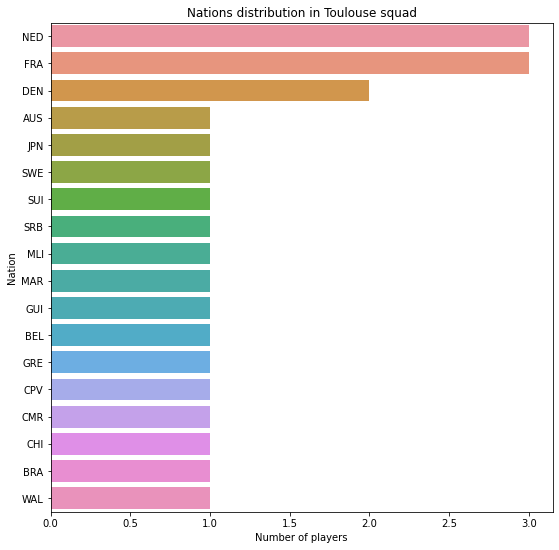

In [219]:
t = ligue1.groupby(['squad', 'nation'], as_index=False)['player'].nunique() \
    .query('squad == "Toulouse"') \
    .sort_values('player', ascending=False)
    
bar_plot(
    t['player'],
    t['nation'],
    'Nations distribution in Toulouse squad',
    'Number of players',
    'Nation'
)

*Toulouse have the most multination squad in the league with 18 nations.*

Let's find out the oldest and youngest squad.

In [220]:
t = ligue1.groupby('squad')['age'].mean().sort_values(ascending=False)

In [221]:
print('Average squad age:', round(t.mean(),1))

Average squad age: 25.5


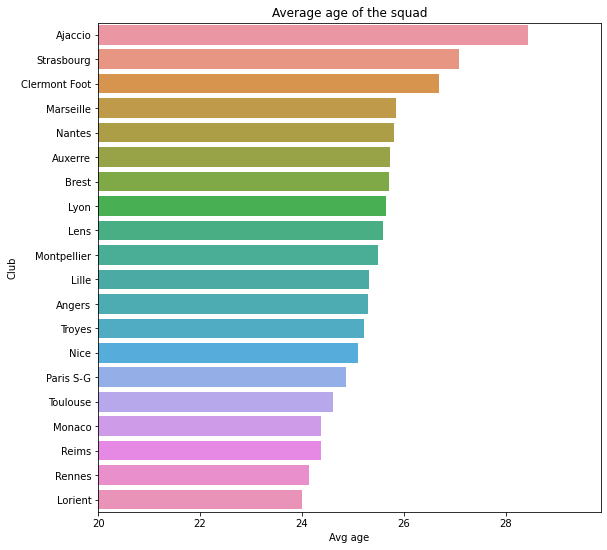

In [222]:
bar_plot(
    t.values,
    t.index,
    'Average age of the squad',
    'Avg age',
    'Club',
    xlim=20
)

*Ajaccio have the oldest squad in league while Lorient have the youngest. Average age is lower than in other leagues.*

Let`s check which club has the most rotation rate (least mins per player).

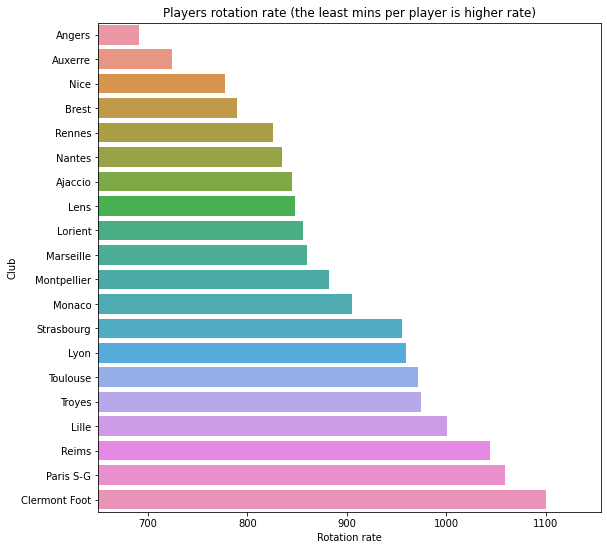

In [223]:
t = ligue1.groupby('squad')['playing time|min'].mean().sort_values()

bar_plot(
    t.values,
    t.index,
    'Players rotation rate (the least mins per player is higher rate)',
    'Rotation rate',
    'Club',
    xlim=650
)

*Auxerre and Angers have the most even squad.*    
*And as opposite Clermont Foot have the most expessed "first" and "bench" players in the league.*

Let`s check how players distributed over full matches in each team.

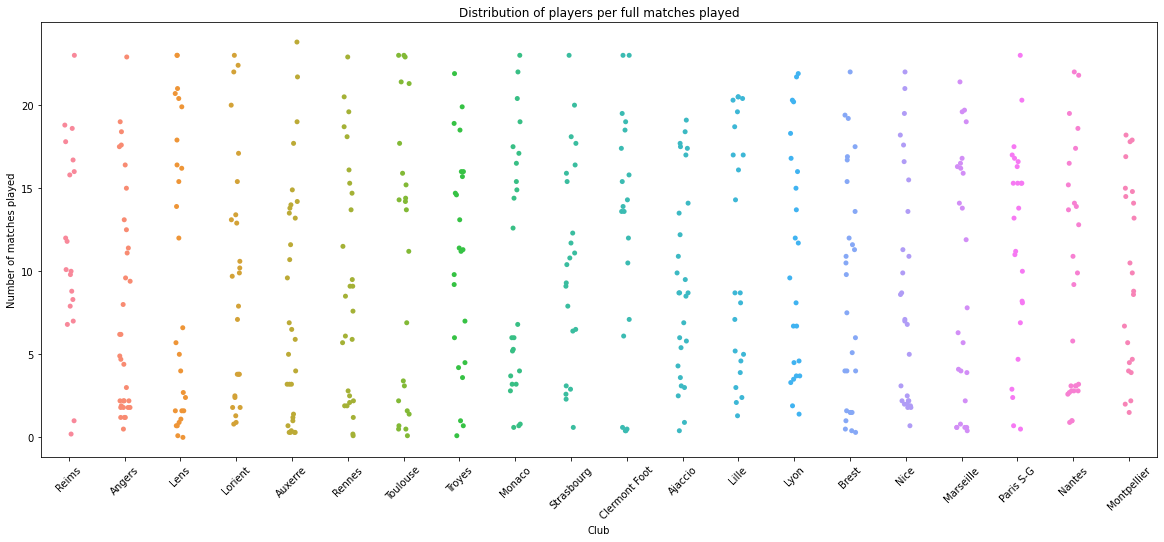

In [224]:
plt.figure(figsize=(20,8))
ax=sns.stripplot(data=ligue1, x='squad', y='playing time|90s')
ax.set(title='Distribution of players per full matches played', xlabel='Club',
       ylabel='Number of matches played')
plt.xticks(rotation=45)
plt.show()

*This chart must more less correlate with previous. Angers and Auxerre dots have less varience.*

Let`s see which team gets the most and least penalties, which may say about their playing style (more aggressive in the opposite box).

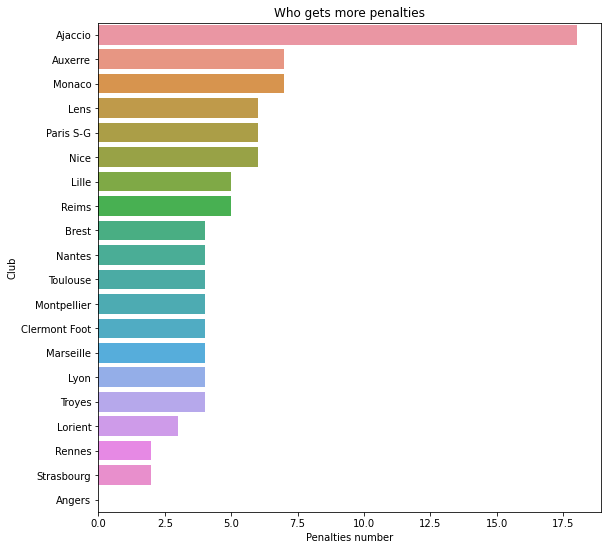

In [225]:
t = ligue1.groupby('squad')['performance|pkatt'].sum().sort_values(ascending=False)

bar_plot(
    t.values,
    t.index,
    'Who gets more penalties',
    'Penalties number',
    'Club'
)

*Ajaccio get more penalties than others.*

Let`s see which club gets the most and least number of yellow and red cards.

In [226]:
t = ligue1.groupby('squad', as_index=False)['performance|crdy'].sum().sort_values('performance|crdy', ascending=False)
tt = ligue1.groupby('squad', as_index=False)['performance|crdr'].sum().sort_values('performance|crdr', ascending=False)

cards_per_club = pd.concat([t, tt], ignore_index=True)

cards_per_club['card'] = [
    'red' if pd.isna(x) else 'yellow' for x in cards_per_club['performance|crdy']]

cards_per_club['number_of_cards'] = [
    x if pd.isna(y) else y for x, y in zip(cards_per_club['performance|crdy'], cards_per_club['performance|crdr'])]

cards_per_club = cards_per_club.drop(['performance|crdy', 'performance|crdr'], axis=1)

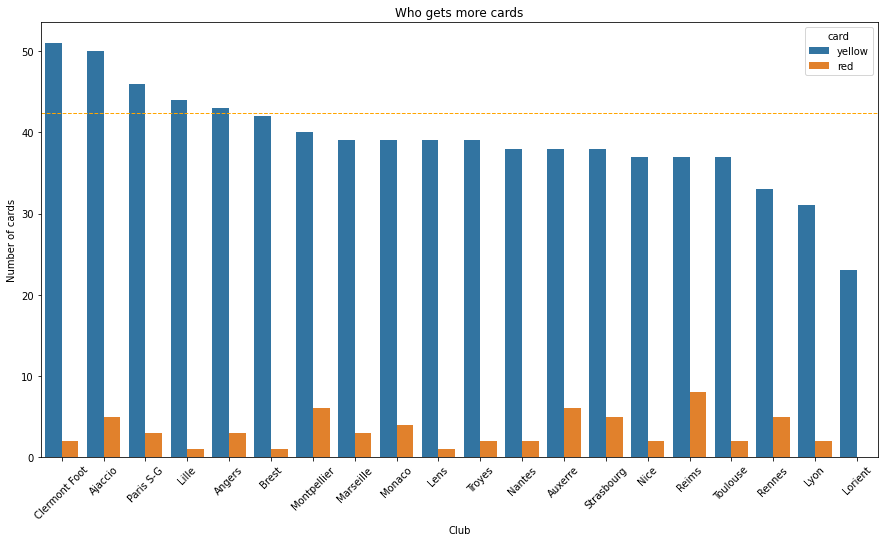

In [227]:
plt.figure(figsize=(15,8))
ax = sns.barplot(data=cards_per_club,
            x='squad', 
            y='number_of_cards', 
            hue='card')
ax.set(title = 'Who gets more cards', xlabel='Club', ylabel='Number of cards')
plt.xticks(rotation=45)
plt.axhline(cards_per_club.groupby('squad')['number_of_cards'].sum().mean(),
            c='orange',
            ls='--',
            lw=1)
plt.show()

*Clermont Foot get more cards than others. Lorient get cards rarily.*

Let`s see who is the best by xG.

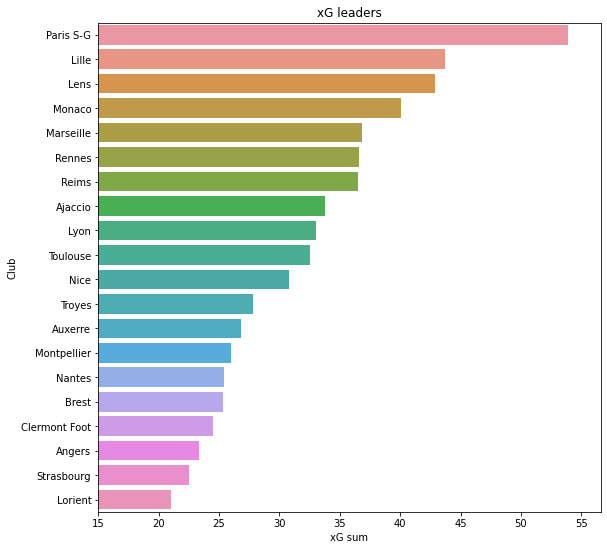

In [228]:
t = ligue1.groupby('squad')['expected|xg'].sum().sort_values(ascending=False)

bar_plot(
    t.values,
    t.index,
    'xG leaders',
    'xG sum',
    'Club',
    xlim=15
)

*PSG significantly outperforms everyone by xG. Looks like Lille underperforms as they are on 5th place of table and 3rd by xG. Lorient is the worst by xG and still are at the top half of the table.*

Let`s see who is the best by xaG.

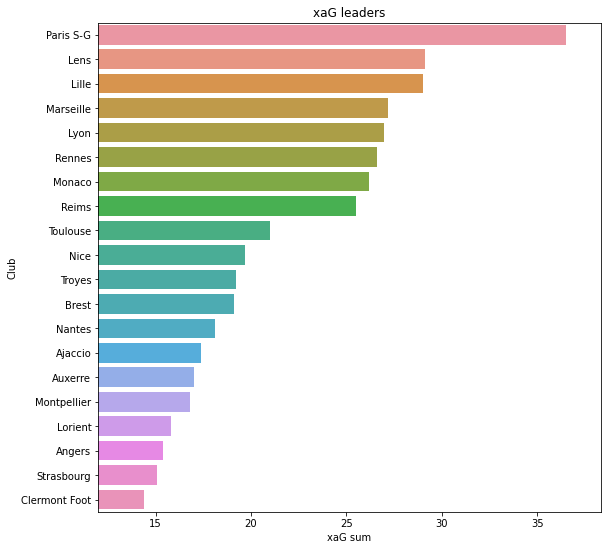

In [229]:
t = ligue1.groupby('squad')['expected|xag'].sum().sort_values(ascending=False)

bar_plot(
    t.values,
    t.index,
    'xaG leaders',
    'xaG sum',
    'Club',
    xlim=12
)

*Quite the same distribution in xaG.*

Let`s look at npxG+xaG.

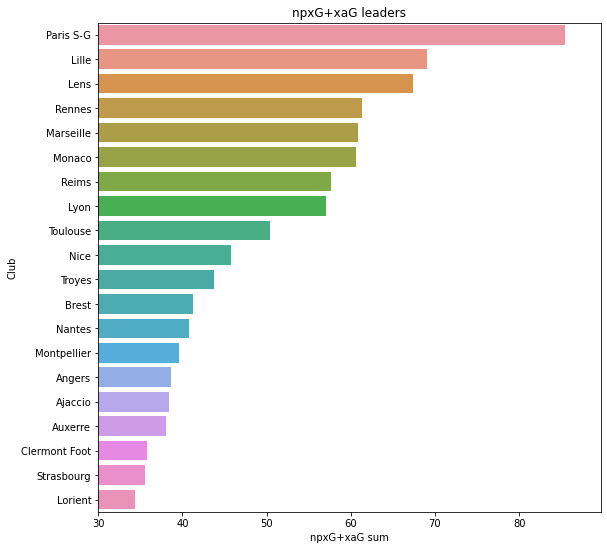

In [230]:
t = ligue1.groupby('squad')['expected|npxg+xag'].sum().sort_values(ascending=False)

bar_plot(
    t.values,
    t.index,
    'npxG+xaG leaders',
    'npxG+xaG sum',
    'Club',
    xlim=30
)

*PSG is beating everyone in all advances metrics.*

Let's see distribution of transfer price by each player and club.

In [231]:
fig = px.strip(ligue1, x='transfer_value_mil_eur', y='squad', color='squad', hover_name='player')
fig.show()

**Conclusion:** we`ve got 443 players available. 41,5% players are French. Strasbourg, Rennes, Monpellier, Lyon are the most French club in the league and Toulouse is the least. Avg squade age is 25.5 years old - the least amongst top 5 leagues. Ajaccio have the oldest squad in league while Lorient have the youngest. Average age is lower than in other leagues. Auxerre and Angers have the most players involved, i.e. more players have more less equal playing time. And Clermont as opposite have more expressed "first" and "bench" players. Ajaccio were rewared by penalties more often than others and Clermont is a leader by yellow cards. All advances metrics says that PSG outperforming everyone in the league. Also there is less varience in metrics between all other teams than it is in other leagues (probably except EPL). Therefore the league is more competitve.

## Leaders over individuals in each league

### EPL

#### Overall

Let`s see the oldest and youngest players (over players who at least played 45 mins) in the league and who has more minutes.

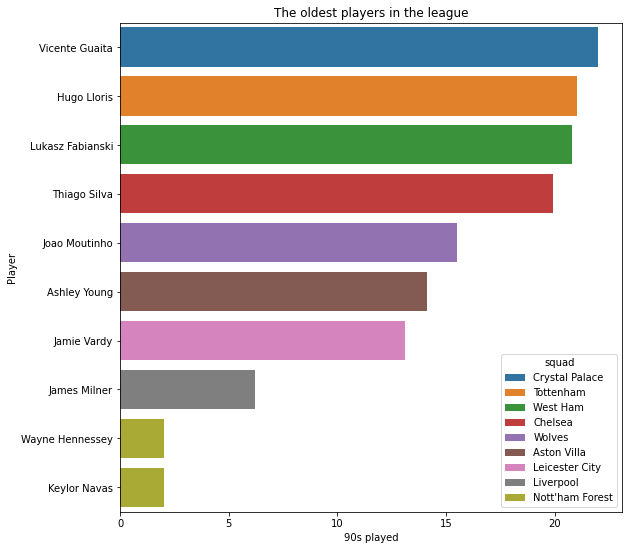

In [232]:
t = epl[epl['age'] > 35].sort_values('playing time|90s', ascending=False)

bar_plot(
    x=t['playing time|90s'], 
    y=t['player'], 
    title='The oldest players in the league', 
    xlabel='90s played', 
    ylabel='Player', 
    hue=t['squad']
)

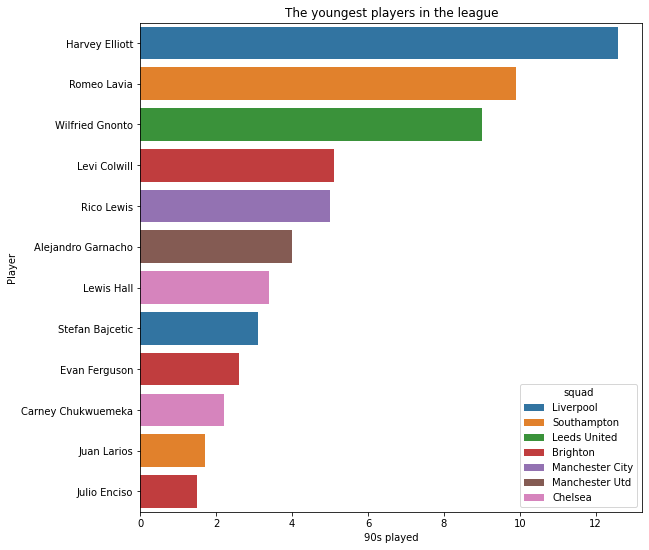

In [233]:
t = epl[(epl['age'] <= 19) & (epl['playing time|min'] >= 90)].sort_values('playing time|90s', ascending=False)

bar_plot(
    x=t['playing time|90s'], 
    y=t['player'], 
    title='The youngest players in the league', 
    xlabel='90s played', 
    ylabel='Player', 
    hue=t['squad']
)

*Seems Brighton trust in young players more than any other club. However Elliot is the most involved youngster in the league.*

Let`s look at top 10 goal scorers.

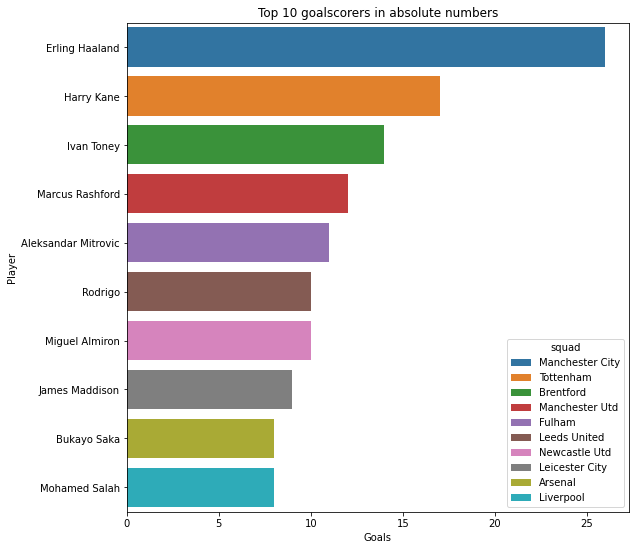

In [234]:
top_goalscorers_epl = epl.sort_values('performance|gls', ascending=False).head(10)

bar_plot(
    x=top_goalscorers_epl['performance|gls'], 
    y=top_goalscorers_epl['player'], 
    title='Top 10 goalscorers in absolute numbers', 
    xlabel='Goals', 
    ylabel='Player', 
    hue=top_goalscorers_epl['squad']
)

*Haaland scores more than 1 goal per game in average.* 

Let`s see top-10 who needs less minutes to score over players who played at least 10 matches in sum.

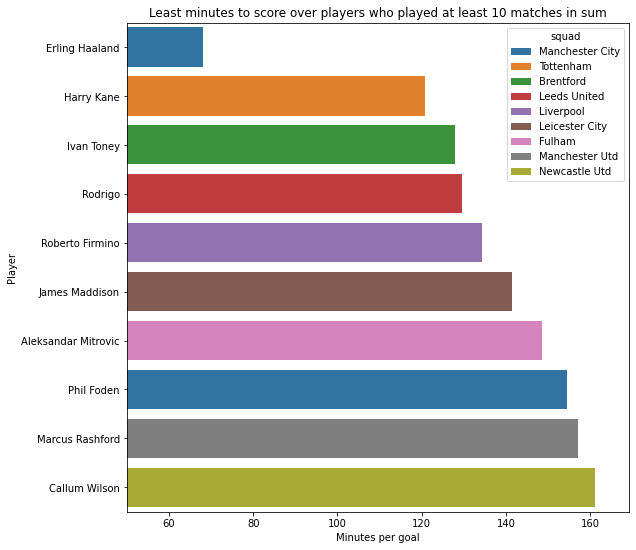

In [235]:
t = epl[epl['playing time|90s'] >= 10].copy()
t['min_per_goal'] = t['playing time|min'] / t['performance|gls']
t = t.sort_values('min_per_goal').head(10)

bar_plot(
    x=t['min_per_goal'], 
    y=t['player'], 
    title='Least minutes to score over players who played at least 10 matches in sum', 
    xlabel='Minutes per goal', 
    ylabel='Player', 
    hue=t['squad'],
    xlim=50
)

*Haaland scores in less than 1 full match, others score in 2 matches frame at least.*

Let's see who is best at converting expected goals to real goals (xG / goal <= 1) over players who played at least 10 matches and scored 5 times.

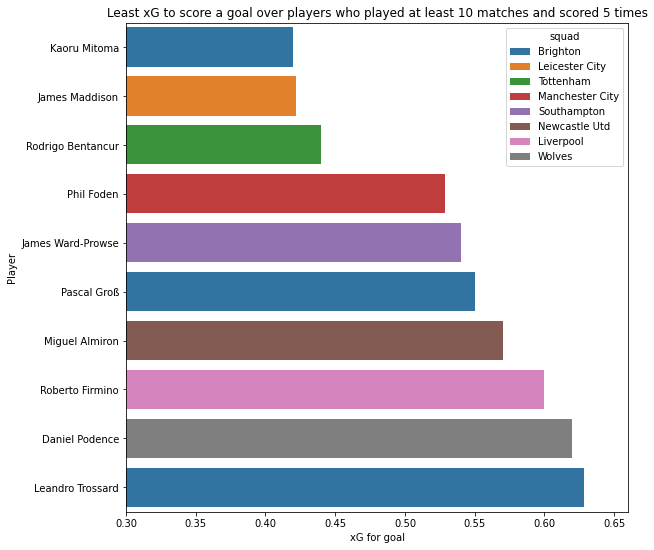

In [236]:
t = epl[(epl['playing time|90s'] >= 10) & (epl['performance|gls'] >= 5)].copy()
t['goal_performance'] = t['expected|xg'] / t['performance|gls']
t = t.sort_values('goal_performance').head(10)

bar_plot(
    x=t['goal_performance'], 
    y=t['player'], 
    title='Least xG to score a goal over players who played at least 10 matches and scored 5 times', 
    xlabel='xG for goal', 
    ylabel='Player', 
    hue=t['squad'],
    xlim=0.3
)

*Mitoma is more clinical in final phase.*

Let's see who is the best assistant.

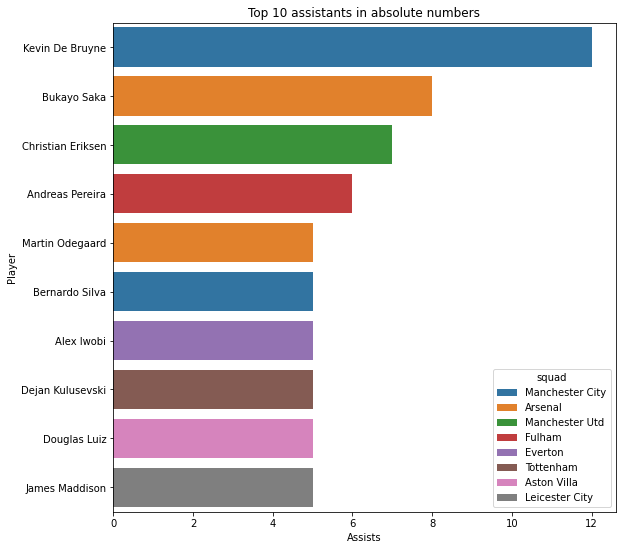

In [237]:
top_assistants_epl = epl.sort_values('performance|ast', ascending=False).head(10)

bar_plot(
    x=top_assistants_epl['performance|ast'], 
    y=top_assistants_epl['player'], 
    title='Top 10 assistants in absolute numbers', 
    xlabel='Assists', 
    ylabel='Player', 
    hue=top_assistants_epl['squad']
)

*De Bruyne is the best assistant overall. Top goal scorer and top assistant play for the same club.*

Let's look at best assists in terms of less minutes for assists.

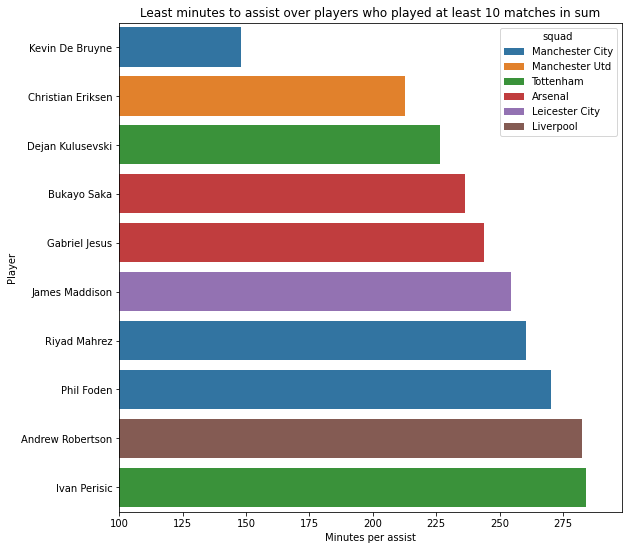

In [238]:
t = epl[epl['playing time|90s'] >= 10].copy()
t['min_per_assist'] = t['playing time|min'] / t['performance|ast']
t = t.sort_values('min_per_assist').head(10)

bar_plot(
    x=t['min_per_assist'], 
    y=t['player'], 
    title='Least minutes to assist over players who played at least 10 matches in sum', 
    xlabel='Minutes per assist', 
    ylabel='Player', 
    hue=t['squad'],
    xlim=100
)

*De Bruyne makes assists every 2 matches.*

Let's see who has better realisation (the best by npxG sorted by number of goals).

In [239]:
t = epl[epl['playing time|90s'] >= 10].sort_values('per 90 minutes|npxg', ascending=False)[
    ['player','per 90 minutes|gls',]].head(10)

tt = epl[epl['playing time|90s'] >= 10].sort_values('per 90 minutes|npxg', ascending=False)[
    ['player','per 90 minutes|npxg']].head(10)

best_realisation = pd.concat([t, tt], ignore_index=True)

best_realisation['metric'] = [
    'per 90 minutes|gls' if pd.isna(x) else 'per 90 minutes|npxg' for x in best_realisation['per 90 minutes|npxg']]

best_realisation['metric_number'] = [
    x if pd.isna(y) else y for x, y in zip(best_realisation['per 90 minutes|gls'], best_realisation['per 90 minutes|npxg'])]

best_realisation = best_realisation[['player','metric','metric_number']]. \
    sort_values(['metric', 'metric_number'],ascending=False)

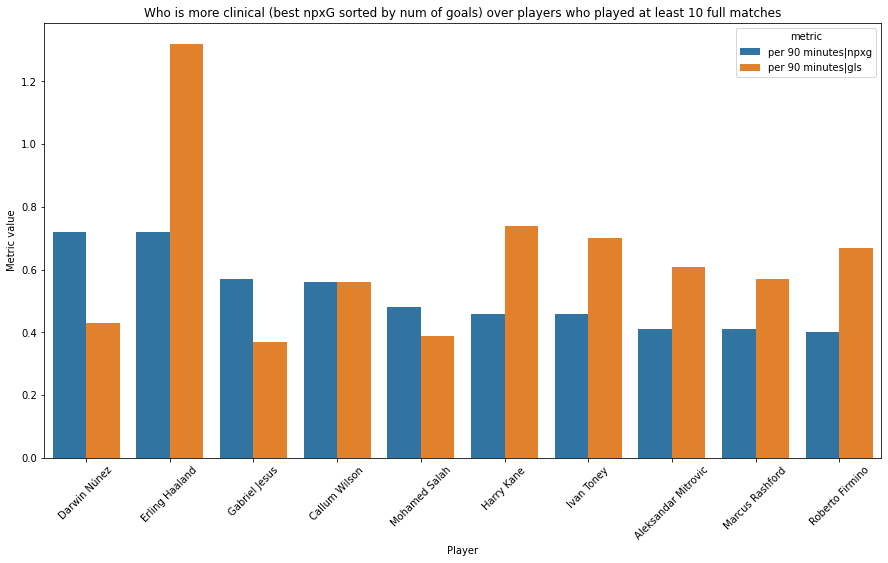

In [240]:
plt.figure(figsize=(15,8))

ax = sns.barplot(data=best_realisation,
            x='player', 
            y='metric_number', 
            hue='metric')

ax.set(title = 'Who is more clinical (best npxG sorted by num of goals) over players who played at least 10 full matches', 
       xlabel='Player', 
       ylabel='Metric value')

plt.xticks(rotation=45)
plt.show()

*Haaland is as twice more effective. He makes a goal out of half of npxG. Toney, Kane, Mitrovic, Rashford and Firmino are also significantly overperforming.*

Let's see who's getting more cards per match over players who played at least 10 matches.

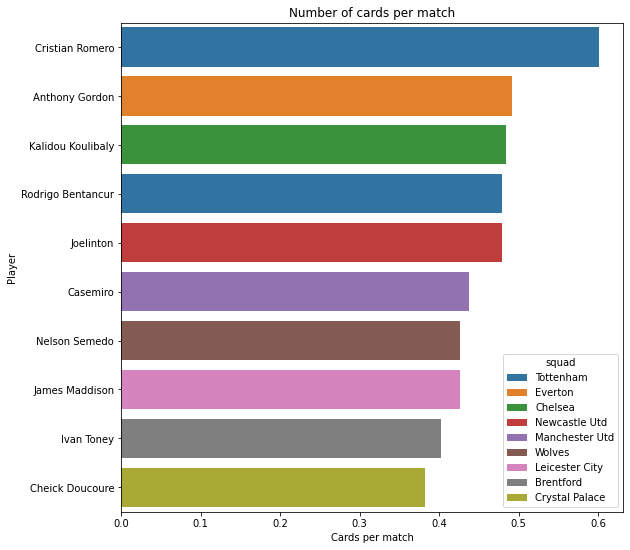

In [241]:
t = epl[epl['playing time|90s'] >= 10].copy()
epl['total_cards'] = epl['performance|crdr'] + epl['performance|crdy']
t['cards_90s'] = epl['total_cards'] / epl['playing time|90s']
t = t.sort_values('cards_90s', ascending=False).head(10)

bar_plot(
    x=t['cards_90s'], 
    y=t['player'], 
    title='Number of cards per match', 
    xlabel='Cards per match', 
    ylabel='Player', 
    hue=t['squad']
)

*Romero is getting 0.6 cards per match.*

Let's see top-10 players by transfer value.

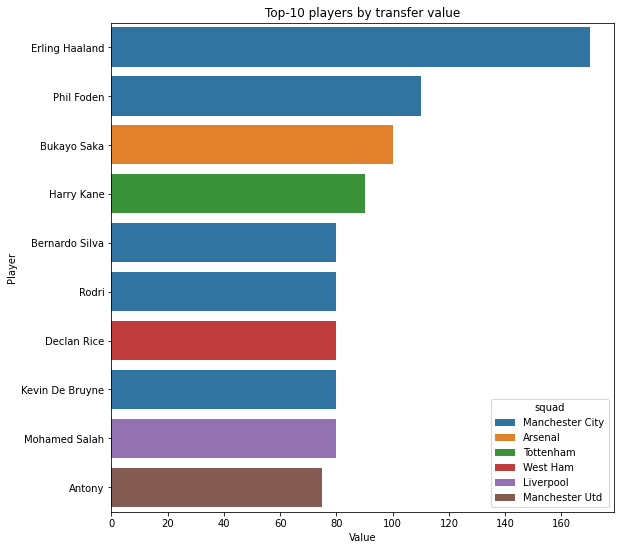

In [242]:
t = epl.sort_values('transfer_value_mil_eur', ascending=False).head(10)

bar_plot(
    x=t['transfer_value_mil_eur'], 
    y=t['player'], 
    title='Top-10 players by transfer value', 
    xlabel='Value', 
    ylabel='Player', 
    hue=t['squad']
)

*5/10 players represent Man City.*

Let's see who has the best numbers in goals and assists per 90min.

In [243]:
t = epl[epl['playing time|90s'] >= 10].copy()

fig = px.scatter(t, x='per 90 minutes|g-pk', y='per 90 minutes|ast', 
                 custom_data=[t['player'], t['squad']])

fig.update_layout(title='Distribution of players per goals and assists per 90 minutes among players who played at least 10 matches',
                  xaxis_title='Non penalty goals per 90 mins',
                  yaxis_title='Assists per 90 minutes')
fig.update_traces(hovertemplate=
                  'Player: %{customdata[0]}<br>Club: %{customdata[1]}')

fig.show()

*Maddison is the most versatile player in the league in terms of np goals / assists, he scores more than 0.6 goals / 90mins and assists more than 0.3 times / 90 mins.*

**Conclusion:** Brighton trust in young players more than any other club. They have 3 youngsters who played at least 1 full match. However, Elliot is the most involved youngster in the league.   
Haaland scores in less than 1 full match, others score in 2 matches frame at least.    
Mitoma and Maddison are the most clinical in final phase. They had less minutes per goal.   
De Bruyne is the best assistant overall. Top goal scorer and top assistant play for the same club. De Bruyne makes assists every 2 matches. 
Haaland is as twice more effective. He makes a goal out of half of npxG. Toney, Kane, Mitrovic, Rashford and Firmino are also significantly overperforming.   
Romero is getting 0.6 cards per match.     
Looking at top transfer values 5/10 players represent Man City.   
Maddison is the most versatile player in the league in terms of np goals / assists, he scores more than 0.6 goals / 90mins and assists more than 0.3 times / 90 mins.

#### GK

In [244]:
epl_gk = epl[['player',
    'nation',
    'pos',
    'squad',
    'age',
    'born',
    'playing time|mp',
    'playing time|starts',
    'playing time|min',
    'playing time|90s',
    'total|att',
    'total|cmp%',
    'total|totdist',
    'total|prgdist',
    'short|cmp',
    'short|att',
    'short|cmp%',
    'medium|cmp',
    'medium|att',
    'medium|cmp%',
    'long|cmp',
    'long|att',
    'long|cmp%',
    'prgp',
    'performance|saves',
    'performance|save%',
    'performance|cs',
    'performance|cs%',
    'penalty kicks|pkatt',
    'penalty kicks|save%',
    'expected|psxg',
    'expected|psxg/sot',
    'expected|psxg+/-',
    'expected|/90',
    'launched|cmp',
    'launched|att',
    'launched|cmp%',
    'crosses|opp',
    'crosses|stp',
    'crosses|stp%',
    'transfer_value_mil_eur']].query('pos == "GK"')

Let`s see who allow less goals than expected over GK who played 10 and more matches.

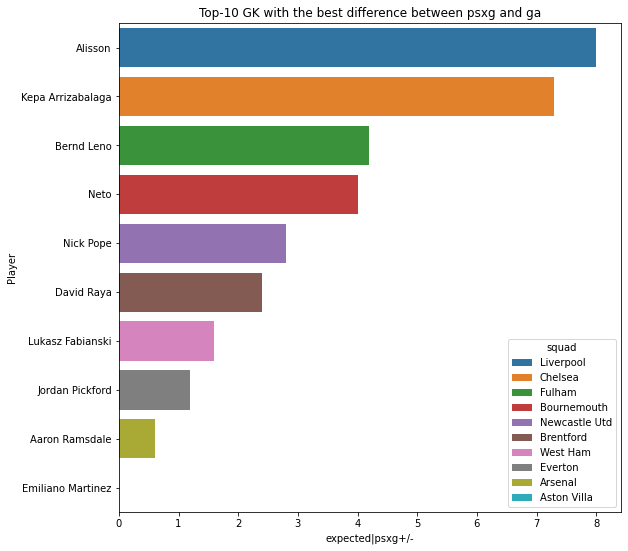

In [245]:
t = epl_gk[epl_gk['playing time|90s'] >= 10].sort_values(by='expected|psxg+/-', ascending=False).head(10)

bar_plot(
    x=t['expected|psxg+/-'], 
    y=t['player'], 
    title='Top-10 GK with the best difference between psxg and ga', 
    xlabel='expected|psxg+/-', 
    ylabel='Player', 
    hue=t['squad']
)

*Alisson and Kepa concede around 8 goals less than expected.*

Let`s see who has the best save rate.

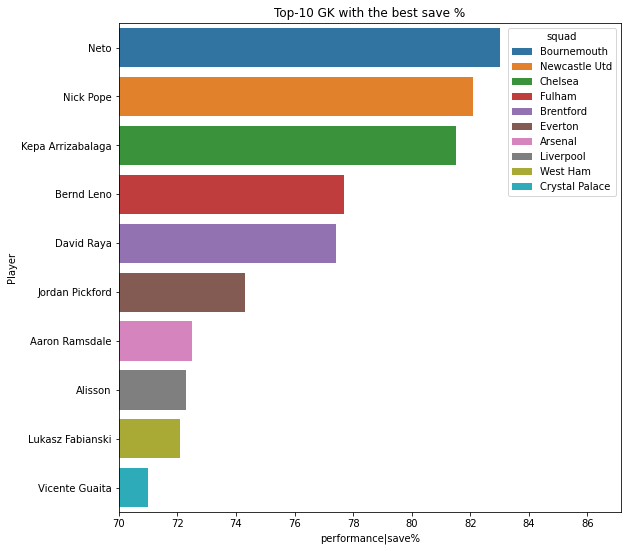

In [246]:
t = epl_gk[epl_gk['playing time|90s'] >= 10].sort_values(by='performance|save%', ascending=False).head(10)

bar_plot(
    x=t['performance|save%'], 
    y=t['player'], 
    title='Top-10 GK with the best save %', 
    xlabel='performance|save%', 
    ylabel='Player', 
    hue=t['squad'],
    xlim=70
)

*Neto has the best save %. It`s interesting to mention that Alisson save % is not that high as psxg and ga difference.*

Let`s compare GKs peformance in two dimentions - ga and psxg.

In [247]:
t = epl_gk[epl_gk['playing time|90s'] >= 10].copy()

fig = px.scatter(t, x='expected|psxg+/-', y='performance|save%', 
                 custom_data=[t['player'], t['squad'], t['expected|psxg+/-'], t['performance|save%']])

fig.update_layout(title='GK comparison in terms of psxg +- and save%',
                  xaxis_title='expected|psxg+/-',
                  yaxis_title='performance|save%')
fig.update_traces(hovertemplate=
                  'Player: %{customdata[0]}<br>Club: %{customdata[1]}<br>psxg+/-: %{customdata[2]}<br>save%: %{customdata[3]}')

fig.show()

*Kepa has the best vector sum of save% and psxg +-.*

Let`s find out who is the best cross stopper amongs GK who played at least 10 matches.

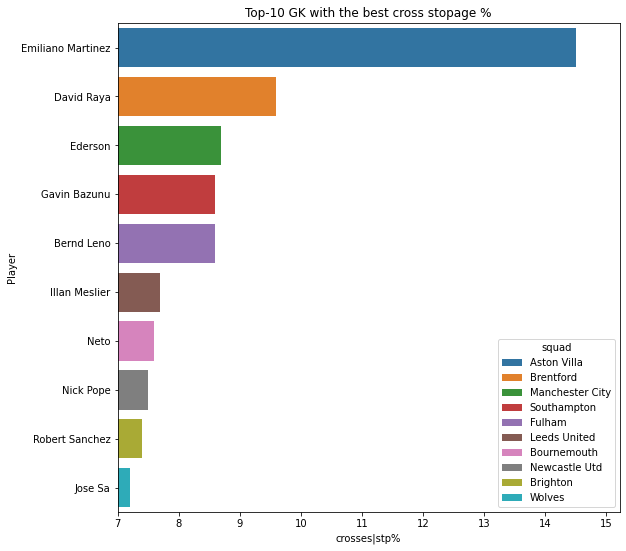

In [248]:
t = epl_gk[epl_gk['playing time|90s'] >= 10].sort_values(by='crosses|stp%', ascending=False).head(10)

bar_plot(
    x=t['crosses|stp%'], 
    y=t['player'], 
    title='Top-10 GK with the best cross stopage %', 
    xlabel='crosses|stp%', 
    ylabel='Player', 
    hue=t['squad'],
    xlim=7
)

*With significant difference the best cross stoppage GK is Martinez.*

Let`s find out who is the most accurate at long balls and launched long balls amongs GK who played at least 10 matches.

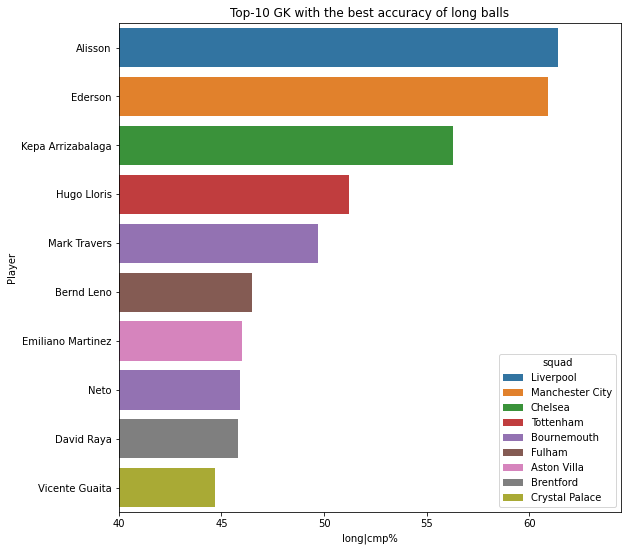

In [249]:
t = epl_gk[epl_gk['playing time|90s'] >= 10].sort_values(by='long|cmp%', ascending=False).head(10)

bar_plot(
    x=t['long|cmp%'], 
    y=t['player'], 
    title='Top-10 GK with the best accuracy of long balls', 
    xlabel='long|cmp%', 
    ylabel='Player', 
    hue=t['squad'],
    xlim=40
)

*Alisson and Ederson have the highest % of completed long ball passes.*

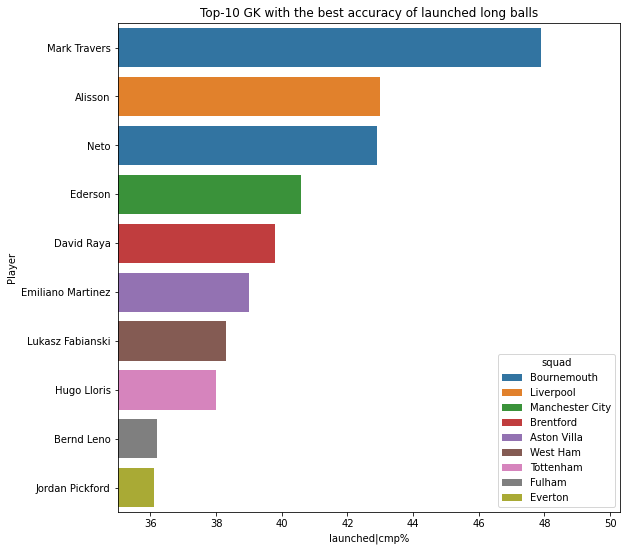

In [250]:
t = epl_gk[epl_gk['playing time|90s'] >= 10].sort_values(by='launched|cmp%', ascending=False).head(10)

bar_plot(
    x=t['launched|cmp%'], 
    y=t['player'], 
    title='Top-10 GK with the best accuracy of launched long balls', 
    xlabel='launched|cmp%', 
    ylabel='Player', 
    hue=t['squad'],
    xlim=35
)

*Travers has the most accurate lunched long balls.*

Let`s see who has the best pass % overall.

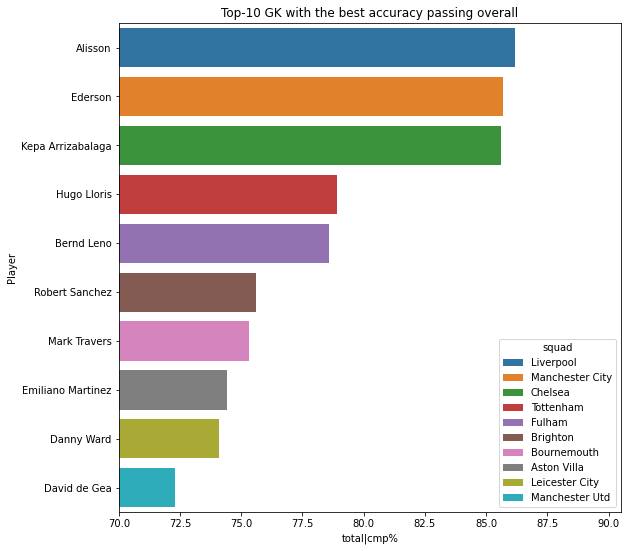

In [251]:
t = epl_gk[epl_gk['playing time|90s'] >= 10].sort_values(by='total|cmp%', ascending=False).head(10)

bar_plot(
    x=t['total|cmp%'], 
    y=t['player'], 
    title='Top-10 GK with the best accuracy passing overall', 
    xlabel='total|cmp%', 
    ylabel='Player', 
    hue=t['squad'],
    xlim=70
)

*Alisson, Ederson and Kepa are the best passers in overall.*

Let`s see top-10 high valued GKs.

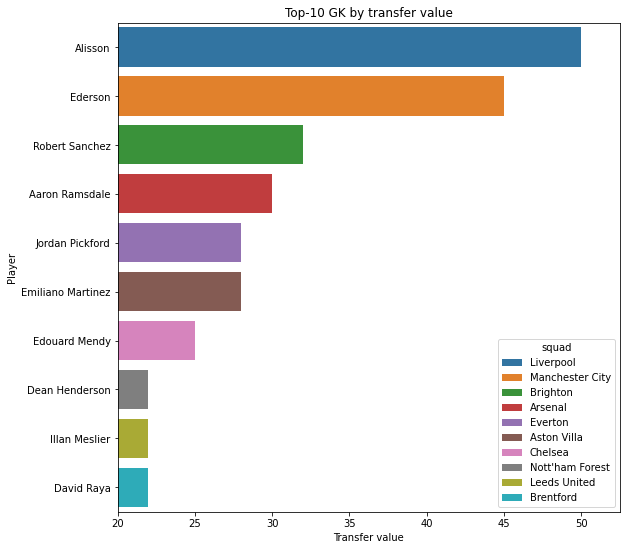

In [252]:
t = epl_gk.sort_values(by='transfer_value_mil_eur', ascending=False).head(10)

bar_plot(
    x=t['transfer_value_mil_eur'], 
    y=t['player'], 
    title='Top-10 GK by transfer value', 
    xlabel='Transfer value', 
    ylabel='Player', 
    hue=t['squad'],
    xlim=20
)

**Conclusion:** Alisson and Kepa concede around 8 goals less than expected. Neto has the best save %. It`s interesting to mention that Alisson save % is not that high as psxg and ga difference. Kepa has the best vector sum of save% and psxg +-. With significant difference the best cross stoppage GK is Martinez. Alisson and Ederson have the highest % of completed long ball passes. Travers has the most accurate lunched long balls. Alisson, Ederson and Kepa are the best passers in overall and Alisson has the highest transfer value.

#### DF

In [253]:
epl_df = epl[epl['pos'].str.contains("DF")].copy()

Let`s see who has better number in interceptions and clearance.

In [254]:
t = epl_df[epl_df['playing time|90s'] >= 10].copy()

fig = px.scatter(t, x='clr', y='int', 
                 custom_data=[t['player'], t['squad'], t['clr'], t['int']])

fig.update_layout(title='DFs distribution by clearances and interceptions',
                  xaxis_title='clearances',
                  yaxis_title='interceptions')
fig.update_traces(hovertemplate=
                  'Player: %{customdata[0]}<br>Club: %{customdata[1]}<br>clearances: %{customdata[2]}<br>interceptions: %{customdata[3]}')

fig.show()

*Schar has made more interceptions than any other def in the league and Pinnock has made the most of clearances.*

In [255]:
t = epl_df.sort_values('tackles|tkl', ascending=False).head(20) 

fig = px.bar(data_frame=t,
             x='player',
             y=(t['tackles|tklw'] / t['tackles|tkl']).sort_values(ascending=False),
             text_auto='.0%',
             custom_data=[t['player'], t['squad'], t['tackles|tklw'], t['tackles|tkl']]
)

fig.update_layout(
    xaxis={
        'type': 'category',
        'showgrid': False,
    },
    yaxis={
        'tickformat': '.0%'
    }
)

fig.update_layout(title='% of winning tackles over top-20 DF with highest total tackles',
                  xaxis_title='Player',
                  yaxis_title='% of tackles won')
fig.update_traces(hovertemplate=
                  'Player: %{customdata[0]}<br>Club: %{customdata[1]}<br>tackles_won: %{customdata[2]}<br>total_tackles: %{customdata[3]}')

fig.show()

*Strujk and Castagne have both won 70% of tackles.*

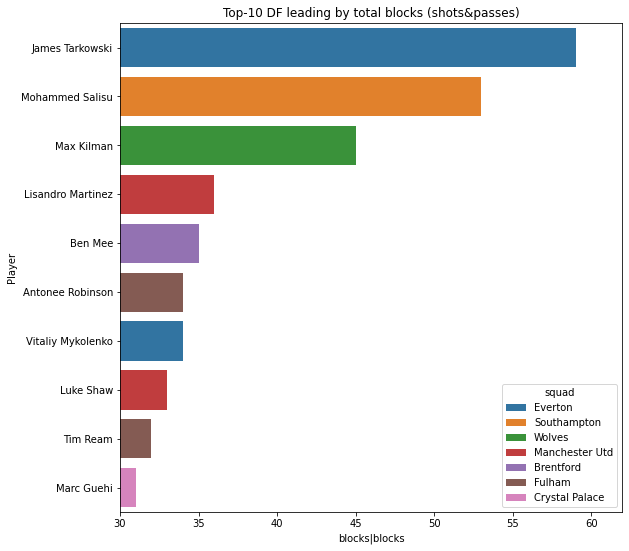

In [256]:
t = epl_df[epl_df['playing time|90s'] >= 10].sort_values(by='blocks|blocks', ascending=False).head(10)

bar_plot(
    x=t['blocks|blocks'], 
    y=t['player'], 
    title='Top-10 DF leading by total blocks (shots&passes)', 
    xlabel='blocks|blocks', 
    ylabel='Player', 
    hue=t['squad'],
    xlim=30
)

*James Tarkowski leads by total blocks.*

Let`s see who has the highest % of successfully tacled dribbles. We'll be looking at players who played at least 10 matches and have total quantity of dribbles tackles not less than 25% of league DFs.

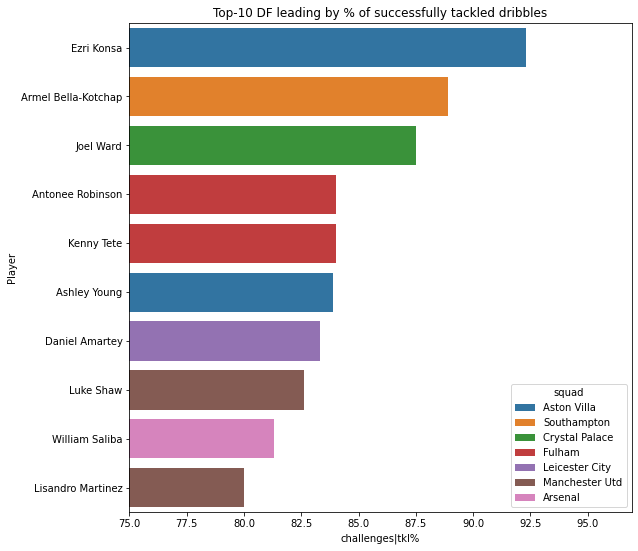

In [257]:
t = epl_df[(epl_df['playing time|90s'] >= 10) &
       (epl_df['challenges|tkl'] >=
        np.quantile(epl_df[epl_df['playing time|90s'] >= 10]['challenges|tkl'], .25))] \
        .sort_values(by='challenges|tkl%', ascending=False).head(10)

bar_plot(
    x=t['challenges|tkl%'], 
    y=t['player'], 
    title='Top-10 DF leading by % of successfully tackled dribbles', 
    xlabel='challenges|tkl%', 
    ylabel='Player', 
    hue=t['squad'],
    xlim=75
)

*Konsa leads with > 90% of successed tackled dribbles.*

Let`s find out who has the best numbers at recoveries.

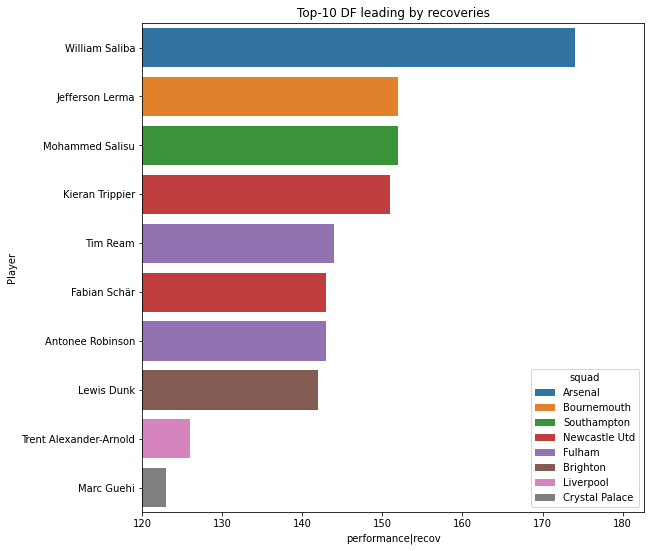

In [258]:
t = epl_df[epl_df['playing time|90s'] >= 10].sort_values('performance|recov', ascending=False).head(10)

bar_plot(
    x=t['performance|recov'], 
    y=t['player'], 
    title='Top-10 DF leading by recoveries', 
    xlabel='performance|recov', 
    ylabel='Player', 
    hue=t['squad'],
    xlim=120
)

*Saliba leads by total number of recoveries with > 170.*

Let`s see at the best DF in aerial duels. We'll filter out DFs with 10 matches played and number of duels not less than 25% of total records.

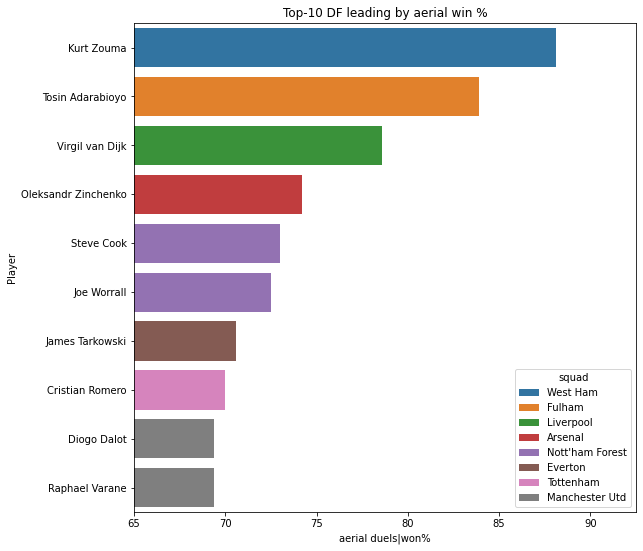

In [259]:
t = epl_df.copy()
t['aerial_duels'] = t['aerial duels|won'] + t['aerial duels|lost']
t = t[(t['playing time|90s'] >= 10) &
       (t['aerial_duels'] >=
        np.quantile(t[t['playing time|90s'] >= 10]['aerial_duels'], .25))] \
        .sort_values('aerial duels|won%', ascending=False).head(10)

bar_plot(
    x=t['aerial duels|won%'], 
    y=t['player'], 
    title='Top-10 DF leading by aerial win %', 
    xlabel='aerial duels|won%', 
    ylabel='Player', 
    hue=t['squad'],
    xlim=65
)

*Zouma leads by aerial win % with win rate > 85%.*

Let`s do some head-to-head comparison between the leaders of the metrics.

In [260]:
def radar_chart(player1,player2):

    t = epl_df[(epl_df['player'] == player1) | (epl_df['player'] == player2)] \
    [['player','clr', 'int', 'blocks|blocks', 'challenges|tkl%', 
      'performance|recov', 'aerial duels|won%']].copy()

    cats = ['clearances', 'interceptions', 'blocks', '% of successful dribbled tackles',
            'recoveries', '% of winning aerials']

    fig = go.Figure()

    fig.add_trace(go.Scatterpolar(
        r=t[t['player'] == player1].iloc[0,1:],
        theta=cats,
        fill='toself',
        name=player1
    ))

    fig.add_trace(go.Scatterpolar(
        r=t[t['player'] == player2].iloc[0,1:],
        theta=cats,
        fill='toself',
        name=player2  
    ))

    fig.update_layout(
    polar=dict(
        radialaxis=dict(
        visible=True
        ))
    )

    fig.update_layout(title=f'{player1} vs {player2} head-to-head comparison')
    fig.show()

In [261]:
radar_chart('Fabian Schär', 'James Tarkowski')